In [49]:
import osmnx as ox
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import sys; sys.path.insert(0, '/home/adriano/thunderstorm')
from thunderstorm.core import SBandRadarImage, VLFSensorImage
from thunderstorm.core.interfaces import Cell, ListPoint, Point as PointL
import geopandas as gpd

In [4]:
info = dict(year=2014, month=1, day=18, hour=15, minute=0)
sband = SBandRadarImage(**info)
vlfsensor = VLFSensorImage(**info)

In [ ]:
et_crs("EPSG:4326"})

In [21]:
xy = vlfsensor.df[['longitude', 'latitude']].values
x, y = list(zip(*xy))
gdf_nodes = gpd.GeoDataFrame(data={'x':x, 'y':y})
gdf_nodes.crs = {'init': 'epsg:4326'}
gdf_nodes.name = 'nodes'
gdf_nodes['geometry'] = gdf_nodes.apply(lambda row: Point((row['x'], row['y'])), axis=1)
west, south, east, north = gdf_nodes.unary_union.bounds

/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  after removing the cwd from sys.path.


In [29]:
sindex = gdf_nodes.sindex

In [36]:
x0, x1, y0, y1 = sband.bbox
pointList = ((x0, y0), (x1, y0), (x1, y1), (x0, y1))

poly = Polygon([[p[0], p[1]] for p in pointList])

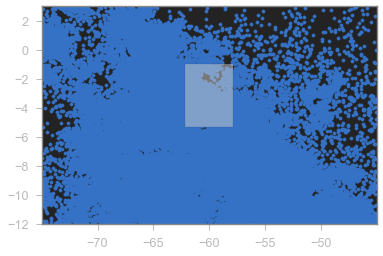

In [45]:
fig, ax = plt.subplots()
patch = PolygonPatch(poly, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
ax.add_patch(patch)
ax.scatter(gdf_nodes['x'].values, gdf_nodes['y'].values, marker='.')
ax.set_xlim(west, east)
ax.set_ylim(south, north)
# ax.axis('off')
plt.show()

In [97]:
grid.boundary.xy

(array('d', [-57.85427039835612, -57.818192065022785, -57.818192065022785, -57.85427039835612, -57.85427039835612]),
 array('d', [-1.0095968724751794, -1.0095968724751794, -0.973649930808512, -0.973649930808512, -1.0095968724751794]))

In [69]:
cell.

-5.320482778694662

In [133]:
data = list()
for i in range(241):
    for j in range(241):
        cell = Cell(sband.lon[i][j], sband.lat[i][j])
        p = Polygon([(cell.left, cell.bottom), (cell.right, cell.bottom),
                   (cell.right, cell.top), (cell.left, cell.top),
                   (cell.left, cell.bottom)])
        data.append(p)

In [76]:
grids = gpd.GeoDataFrame(data={'geometry': data})
grids.head()

geometry
0  POLYGON ((-62.17475 -5.32048, -62.13868 -5.320...
1  POLYGON ((-62.15671 -5.32053, -62.12064 -5.320...
2  POLYGON ((-62.13868 -5.32057, -62.10260 -5.320...
3  POLYGON ((-62.12064 -5.32062, -62.08456 -5.320...
4  POLYGON ((-62.10260 -5.32066, -62.06652 -5.320...

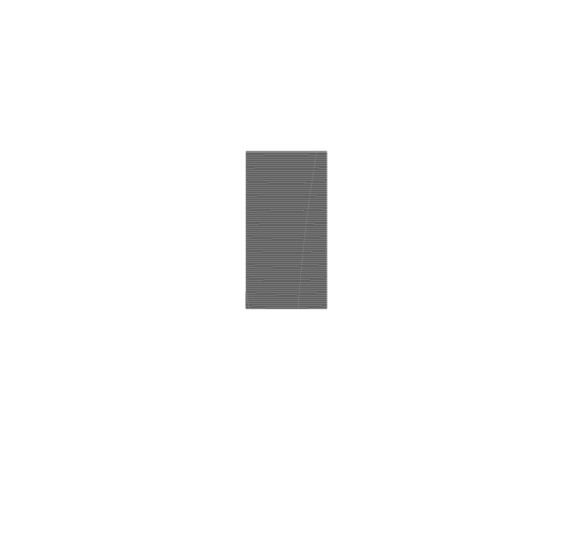

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
for i, grid in grids['geometry'].iteritems():
    patch = PolygonPatch(grid, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
    ax.add_patch(patch)
    
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

In [99]:
points_within_geometry = pd.DataFrame()
for i, poly in grids['geometry'].iteritems():
    poly = poly.buffer(1e-14).buffer(0)
    
    possible_matches_index = list(sindex.intersection(poly.bounds))
    possible_matches = gdf_nodes.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(poly)]
    points_within_geometry = points_within_geometry.append(precise_matches)

In [100]:
points_within_geometry = points_within_geometry.drop_duplicates(subset=['x', 'y'])
points_outside_geometry = gdf_nodes[~gdf_nodes.isin(points_within_geometry)]

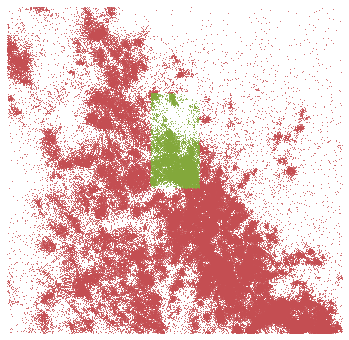

In [110]:
fig, ax = plt.subplots(figsize=(6,6))
# for polygon in geometry:
#     patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=3)
#     ax.add_patch(patch)

ax.scatter(x=points_outside_geometry['x'], y=points_outside_geometry['y'], s=1, c='r', linewidth=0, zorder=1)
ax.scatter(x=points_within_geometry['x'], y=points_within_geometry['y'], s=1, c='g', linewidth=0, zorder=2)
    
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

In [132]:
rtreeindex = points_within_geometry.sindex

for i, curr in grids['geometry'].iteritems():

    within = pd.DataFrame()

    possible_matches_index = list(rtreeindex.intersection(curr.bounds))
    possible_matches = points_within_geometry.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(curr)]
    within = within.append(precise_matches)
    print(i, ': ', within.count()[0])

0 :  x           0
y           0
geometry    0
dtype: int64
1 :  x           0
y           0
geometry    0
dtype: int64
2 :  x           0
y           0
geometry    0
dtype: int64
3 :  x           0
y           0
geometry    0
dtype: int64
4 :  x           0
y           0
geometry    0
dtype: int64
5 :  x           0
y           0
geometry    0
dtype: int64
6 :  x           1
y           1
geometry    1
dtype: int64
7 :  x           1
y           1
geometry    1
dtype: int64
8 :  x           0
y           0
geometry    0
dtype: int64
9 :  x           0
y           0
geometry    0
dtype: int64
10 :  x           0
y           0
geometry    0
dtype: int64
11 :  x           0
y           0
geometry    0
dtype: int64
12 :  x           0
y           0
geometry    0
dtype: int64
13 :  x           0
y           0
geometry    0
dtype: int64
14 :  x           0
y           0
geometry    0
dtype: int64
15 :  x           0
y           0
geometry    0
dtype: int64
16 :  x           0
y           0


149 :  x           0
y           0
geometry    0
dtype: int64
150 :  x           2
y           2
geometry    2
dtype: int64
151 :  x           2
y           2
geometry    2
dtype: int64
152 :  x           0
y           0
geometry    0
dtype: int64
153 :  x           1
y           1
geometry    1
dtype: int64
154 :  x           1
y           1
geometry    1
dtype: int64
155 :  x           0
y           0
geometry    0
dtype: int64
156 :  x           0
y           0
geometry    0
dtype: int64
157 :  x           0
y           0
geometry    0
dtype: int64
158 :  x           1
y           1
geometry    1
dtype: int64
159 :  x           1
y           1
geometry    1
dtype: int64
160 :  x           1
y           1
geometry    1
dtype: int64
161 :  x           2
y           2
geometry    2
dtype: int64
162 :  x           2
y           2
geometry    2
dtype: int64
163 :  x           2
y           2
geometry    2
dtype: int64
164 :  x           2
y           2
geometry    2
dtype: int64
165 :  x

308 :  x           0
y           0
geometry    0
dtype: int64
309 :  x           0
y           0
geometry    0
dtype: int64
310 :  x           0
y           0
geometry    0
dtype: int64
311 :  x           0
y           0
geometry    0
dtype: int64
312 :  x           0
y           0
geometry    0
dtype: int64
313 :  x           0
y           0
geometry    0
dtype: int64
314 :  x           0
y           0
geometry    0
dtype: int64
315 :  x           0
y           0
geometry    0
dtype: int64
316 :  x           0
y           0
geometry    0
dtype: int64
317 :  x           1
y           1
geometry    1
dtype: int64
318 :  x           1
y           1
geometry    1
dtype: int64
319 :  x           0
y           0
geometry    0
dtype: int64
320 :  x           0
y           0
geometry    0
dtype: int64
321 :  x           0
y           0
geometry    0
dtype: int64
322 :  x           0
y           0
geometry    0
dtype: int64
323 :  x           0
y           0
geometry    0
dtype: int64
324 :  x

481 :  x           5
y           5
geometry    5
dtype: int64
482 :  x           1
y           1
geometry    1
dtype: int64
483 :  x           1
y           1
geometry    1
dtype: int64
484 :  x           0
y           0
geometry    0
dtype: int64
485 :  x           0
y           0
geometry    0
dtype: int64
486 :  x           0
y           0
geometry    0
dtype: int64
487 :  x           0
y           0
geometry    0
dtype: int64
488 :  x           0
y           0
geometry    0
dtype: int64
489 :  x           0
y           0
geometry    0
dtype: int64
490 :  x           0
y           0
geometry    0
dtype: int64
491 :  x           0
y           0
geometry    0
dtype: int64
492 :  x           0
y           0
geometry    0
dtype: int64
493 :  x           0
y           0
geometry    0
dtype: int64
494 :  x           0
y           0
geometry    0
dtype: int64
495 :  x           0
y           0
geometry    0
dtype: int64
496 :  x           0
y           0
geometry    0
dtype: int64
497 :  x

644 :  x           2
y           2
geometry    2
dtype: int64
645 :  x           3
y           3
geometry    3
dtype: int64
646 :  x           2
y           2
geometry    2
dtype: int64
647 :  x           2
y           2
geometry    2
dtype: int64
648 :  x           4
y           4
geometry    4
dtype: int64
649 :  x           5
y           5
geometry    5
dtype: int64
650 :  x           6
y           6
geometry    6
dtype: int64
651 :  x           4
y           4
geometry    4
dtype: int64
652 :  x           1
y           1
geometry    1
dtype: int64
653 :  x           2
y           2
geometry    2
dtype: int64
654 :  x           4
y           4
geometry    4
dtype: int64
655 :  x           4
y           4
geometry    4
dtype: int64
656 :  x           1
y           1
geometry    1
dtype: int64
657 :  x           0
y           0
geometry    0
dtype: int64
658 :  x           1
y           1
geometry    1
dtype: int64
659 :  x           3
y           3
geometry    3
dtype: int64
660 :  x

801 :  x           0
y           0
geometry    0
dtype: int64
802 :  x           0
y           0
geometry    0
dtype: int64
803 :  x           0
y           0
geometry    0
dtype: int64
804 :  x           0
y           0
geometry    0
dtype: int64
805 :  x           1
y           1
geometry    1
dtype: int64
806 :  x           1
y           1
geometry    1
dtype: int64
807 :  x           0
y           0
geometry    0
dtype: int64
808 :  x           0
y           0
geometry    0
dtype: int64
809 :  x           0
y           0
geometry    0
dtype: int64
810 :  x           0
y           0
geometry    0
dtype: int64
811 :  x           0
y           0
geometry    0
dtype: int64
812 :  x           0
y           0
geometry    0
dtype: int64
813 :  x           0
y           0
geometry    0
dtype: int64
814 :  x           0
y           0
geometry    0
dtype: int64
815 :  x           0
y           0
geometry    0
dtype: int64
816 :  x           0
y           0
geometry    0
dtype: int64
817 :  x

942 :  x           12
y           12
geometry    12
dtype: int64
943 :  x           10
y           10
geometry    10
dtype: int64
944 :  x           8
y           8
geometry    8
dtype: int64
945 :  x           5
y           5
geometry    5
dtype: int64
946 :  x           1
y           1
geometry    1
dtype: int64
947 :  x           3
y           3
geometry    3
dtype: int64
948 :  x           4
y           4
geometry    4
dtype: int64
949 :  x           2
y           2
geometry    2
dtype: int64
950 :  x           0
y           0
geometry    0
dtype: int64
951 :  x           3
y           3
geometry    3
dtype: int64
952 :  x           5
y           5
geometry    5
dtype: int64
953 :  x           2
y           2
geometry    2
dtype: int64
954 :  x           0
y           0
geometry    0
dtype: int64
955 :  x           0
y           0
geometry    0
dtype: int64
956 :  x           2
y           2
geometry    2
dtype: int64
957 :  x           3
y           3
geometry    3
dtype: int64
95

1115 :  x           3
y           3
geometry    3
dtype: int64
1116 :  x           1
y           1
geometry    1
dtype: int64
1117 :  x           0
y           0
geometry    0
dtype: int64
1118 :  x           0
y           0
geometry    0
dtype: int64
1119 :  x           0
y           0
geometry    0
dtype: int64
1120 :  x           1
y           1
geometry    1
dtype: int64
1121 :  x           1
y           1
geometry    1
dtype: int64
1122 :  x           1
y           1
geometry    1
dtype: int64
1123 :  x           1
y           1
geometry    1
dtype: int64
1124 :  x           0
y           0
geometry    0
dtype: int64
1125 :  x           0
y           0
geometry    0
dtype: int64
1126 :  x           0
y           0
geometry    0
dtype: int64
1127 :  x           0
y           0
geometry    0
dtype: int64
1128 :  x           1
y           1
geometry    1
dtype: int64
1129 :  x           2
y           2
geometry    2
dtype: int64
1130 :  x           1
y           1
geometry    1
dtype

1274 :  x           0
y           0
geometry    0
dtype: int64
1275 :  x           0
y           0
geometry    0
dtype: int64
1276 :  x           0
y           0
geometry    0
dtype: int64
1277 :  x           0
y           0
geometry    0
dtype: int64
1278 :  x           0
y           0
geometry    0
dtype: int64
1279 :  x           1
y           1
geometry    1
dtype: int64
1280 :  x           1
y           1
geometry    1
dtype: int64
1281 :  x           0
y           0
geometry    0
dtype: int64
1282 :  x           0
y           0
geometry    0
dtype: int64
1283 :  x           0
y           0
geometry    0
dtype: int64
1284 :  x           0
y           0
geometry    0
dtype: int64
1285 :  x           0
y           0
geometry    0
dtype: int64
1286 :  x           0
y           0
geometry    0
dtype: int64
1287 :  x           0
y           0
geometry    0
dtype: int64
1288 :  x           1
y           1
geometry    1
dtype: int64
1289 :  x           2
y           2
geometry    2
dtype

1413 :  x           2
y           2
geometry    2
dtype: int64
1414 :  x           4
y           4
geometry    4
dtype: int64
1415 :  x           4
y           4
geometry    4
dtype: int64
1416 :  x           6
y           6
geometry    6
dtype: int64
1417 :  x           8
y           8
geometry    8
dtype: int64
1418 :  x           4
y           4
geometry    4
dtype: int64
1419 :  x           5
y           5
geometry    5
dtype: int64
1420 :  x           10
y           10
geometry    10
dtype: int64
1421 :  x           14
y           14
geometry    14
dtype: int64
1422 :  x           15
y           15
geometry    15
dtype: int64
1423 :  x           12
y           12
geometry    12
dtype: int64
1424 :  x           13
y           13
geometry    13
dtype: int64
1425 :  x           10
y           10
geometry    10
dtype: int64
1426 :  x           5
y           5
geometry    5
dtype: int64
1427 :  x           4
y           4
geometry    4
dtype: int64
1428 :  x           3
y           3
g

1559 :  x           0
y           0
geometry    0
dtype: int64
1560 :  x           0
y           0
geometry    0
dtype: int64
1561 :  x           0
y           0
geometry    0
dtype: int64
1562 :  x           0
y           0
geometry    0
dtype: int64
1563 :  x           0
y           0
geometry    0
dtype: int64
1564 :  x           0
y           0
geometry    0
dtype: int64
1565 :  x           0
y           0
geometry    0
dtype: int64
1566 :  x           0
y           0
geometry    0
dtype: int64
1567 :  x           0
y           0
geometry    0
dtype: int64
1568 :  x           0
y           0
geometry    0
dtype: int64
1569 :  x           0
y           0
geometry    0
dtype: int64
1570 :  x           0
y           0
geometry    0
dtype: int64
1571 :  x           0
y           0
geometry    0
dtype: int64
1572 :  x           1
y           1
geometry    1
dtype: int64
1573 :  x           1
y           1
geometry    1
dtype: int64
1574 :  x           0
y           0
geometry    0
dtype

1723 :  x           0
y           0
geometry    0
dtype: int64
1724 :  x           0
y           0
geometry    0
dtype: int64
1725 :  x           0
y           0
geometry    0
dtype: int64
1726 :  x           0
y           0
geometry    0
dtype: int64
1727 :  x           0
y           0
geometry    0
dtype: int64
1728 :  x           0
y           0
geometry    0
dtype: int64
1729 :  x           0
y           0
geometry    0
dtype: int64
1730 :  x           0
y           0
geometry    0
dtype: int64
1731 :  x           0
y           0
geometry    0
dtype: int64
1732 :  x           0
y           0
geometry    0
dtype: int64
1733 :  x           0
y           0
geometry    0
dtype: int64
1734 :  x           0
y           0
geometry    0
dtype: int64
1735 :  x           1
y           1
geometry    1
dtype: int64
1736 :  x           1
y           1
geometry    1
dtype: int64
1737 :  x           0
y           0
geometry    0
dtype: int64
1738 :  x           0
y           0
geometry    0
dtype

1880 :  x           1
y           1
geometry    1
dtype: int64
1881 :  x           2
y           2
geometry    2
dtype: int64
1882 :  x           3
y           3
geometry    3
dtype: int64
1883 :  x           1
y           1
geometry    1
dtype: int64
1884 :  x           0
y           0
geometry    0
dtype: int64
1885 :  x           1
y           1
geometry    1
dtype: int64
1886 :  x           1
y           1
geometry    1
dtype: int64
1887 :  x           2
y           2
geometry    2
dtype: int64
1888 :  x           3
y           3
geometry    3
dtype: int64
1889 :  x           2
y           2
geometry    2
dtype: int64
1890 :  x           3
y           3
geometry    3
dtype: int64
1891 :  x           2
y           2
geometry    2
dtype: int64
1892 :  x           0
y           0
geometry    0
dtype: int64
1893 :  x           0
y           0
geometry    0
dtype: int64
1894 :  x           0
y           0
geometry    0
dtype: int64
1895 :  x           0
y           0
geometry    0
dtype

2035 :  x           0
y           0
geometry    0
dtype: int64
2036 :  x           0
y           0
geometry    0
dtype: int64
2037 :  x           0
y           0
geometry    0
dtype: int64
2038 :  x           0
y           0
geometry    0
dtype: int64
2039 :  x           0
y           0
geometry    0
dtype: int64
2040 :  x           0
y           0
geometry    0
dtype: int64
2041 :  x           0
y           0
geometry    0
dtype: int64
2042 :  x           0
y           0
geometry    0
dtype: int64
2043 :  x           0
y           0
geometry    0
dtype: int64
2044 :  x           0
y           0
geometry    0
dtype: int64
2045 :  x           0
y           0
geometry    0
dtype: int64
2046 :  x           1
y           1
geometry    1
dtype: int64
2047 :  x           1
y           1
geometry    1
dtype: int64
2048 :  x           0
y           0
geometry    0
dtype: int64
2049 :  x           0
y           0
geometry    0
dtype: int64
2050 :  x           1
y           1
geometry    1
dtype

2167 :  x           5
y           5
geometry    5
dtype: int64
2168 :  x           4
y           4
geometry    4
dtype: int64
2169 :  x           0
y           0
geometry    0
dtype: int64
2170 :  x           0
y           0
geometry    0
dtype: int64
2171 :  x           1
y           1
geometry    1
dtype: int64
2172 :  x           2
y           2
geometry    2
dtype: int64
2173 :  x           1
y           1
geometry    1
dtype: int64
2174 :  x           1
y           1
geometry    1
dtype: int64
2175 :  x           3
y           3
geometry    3
dtype: int64
2176 :  x           2
y           2
geometry    2
dtype: int64
2177 :  x           1
y           1
geometry    1
dtype: int64
2178 :  x           1
y           1
geometry    1
dtype: int64
2179 :  x           1
y           1
geometry    1
dtype: int64
2180 :  x           2
y           2
geometry    2
dtype: int64
2181 :  x           2
y           2
geometry    2
dtype: int64
2182 :  x           2
y           2
geometry    2
dtype

2323 :  x           1
y           1
geometry    1
dtype: int64
2324 :  x           0
y           0
geometry    0
dtype: int64
2325 :  x           1
y           1
geometry    1
dtype: int64
2326 :  x           1
y           1
geometry    1
dtype: int64
2327 :  x           0
y           0
geometry    0
dtype: int64
2328 :  x           1
y           1
geometry    1
dtype: int64
2329 :  x           2
y           2
geometry    2
dtype: int64
2330 :  x           3
y           3
geometry    3
dtype: int64
2331 :  x           2
y           2
geometry    2
dtype: int64
2332 :  x           2
y           2
geometry    2
dtype: int64
2333 :  x           3
y           3
geometry    3
dtype: int64
2334 :  x           1
y           1
geometry    1
dtype: int64
2335 :  x           0
y           0
geometry    0
dtype: int64
2336 :  x           3
y           3
geometry    3
dtype: int64
2337 :  x           3
y           3
geometry    3
dtype: int64
2338 :  x           6
y           6
geometry    6
dtype

2477 :  x           0
y           0
geometry    0
dtype: int64
2478 :  x           0
y           0
geometry    0
dtype: int64
2479 :  x           0
y           0
geometry    0
dtype: int64
2480 :  x           0
y           0
geometry    0
dtype: int64
2481 :  x           1
y           1
geometry    1
dtype: int64
2482 :  x           1
y           1
geometry    1
dtype: int64
2483 :  x           0
y           0
geometry    0
dtype: int64
2484 :  x           0
y           0
geometry    0
dtype: int64
2485 :  x           0
y           0
geometry    0
dtype: int64
2486 :  x           0
y           0
geometry    0
dtype: int64
2487 :  x           1
y           1
geometry    1
dtype: int64
2488 :  x           1
y           1
geometry    1
dtype: int64
2489 :  x           0
y           0
geometry    0
dtype: int64
2490 :  x           0
y           0
geometry    0
dtype: int64
2491 :  x           0
y           0
geometry    0
dtype: int64
2492 :  x           0
y           0
geometry    0
dtype

2642 :  x           2
y           2
geometry    2
dtype: int64
2643 :  x           1
y           1
geometry    1
dtype: int64
2644 :  x           0
y           0
geometry    0
dtype: int64
2645 :  x           2
y           2
geometry    2
dtype: int64
2646 :  x           4
y           4
geometry    4
dtype: int64
2647 :  x           4
y           4
geometry    4
dtype: int64
2648 :  x           4
y           4
geometry    4
dtype: int64
2649 :  x           2
y           2
geometry    2
dtype: int64
2650 :  x           0
y           0
geometry    0
dtype: int64
2651 :  x           2
y           2
geometry    2
dtype: int64
2652 :  x           2
y           2
geometry    2
dtype: int64
2653 :  x           1
y           1
geometry    1
dtype: int64
2654 :  x           2
y           2
geometry    2
dtype: int64
2655 :  x           3
y           3
geometry    3
dtype: int64
2656 :  x           2
y           2
geometry    2
dtype: int64
2657 :  x           2
y           2
geometry    2
dtype

2773 :  x           0
y           0
geometry    0
dtype: int64
2774 :  x           0
y           0
geometry    0
dtype: int64
2775 :  x           0
y           0
geometry    0
dtype: int64
2776 :  x           0
y           0
geometry    0
dtype: int64
2777 :  x           0
y           0
geometry    0
dtype: int64
2778 :  x           0
y           0
geometry    0
dtype: int64
2779 :  x           1
y           1
geometry    1
dtype: int64
2780 :  x           2
y           2
geometry    2
dtype: int64
2781 :  x           4
y           4
geometry    4
dtype: int64
2782 :  x           3
y           3
geometry    3
dtype: int64
2783 :  x           0
y           0
geometry    0
dtype: int64
2784 :  x           1
y           1
geometry    1
dtype: int64
2785 :  x           2
y           2
geometry    2
dtype: int64
2786 :  x           1
y           1
geometry    1
dtype: int64
2787 :  x           0
y           0
geometry    0
dtype: int64
2788 :  x           1
y           1
geometry    1
dtype

2944 :  x           0
y           0
geometry    0
dtype: int64
2945 :  x           0
y           0
geometry    0
dtype: int64
2946 :  x           1
y           1
geometry    1
dtype: int64
2947 :  x           1
y           1
geometry    1
dtype: int64
2948 :  x           0
y           0
geometry    0
dtype: int64
2949 :  x           1
y           1
geometry    1
dtype: int64
2950 :  x           1
y           1
geometry    1
dtype: int64
2951 :  x           0
y           0
geometry    0
dtype: int64
2952 :  x           0
y           0
geometry    0
dtype: int64
2953 :  x           0
y           0
geometry    0
dtype: int64
2954 :  x           0
y           0
geometry    0
dtype: int64
2955 :  x           1
y           1
geometry    1
dtype: int64
2956 :  x           1
y           1
geometry    1
dtype: int64
2957 :  x           0
y           0
geometry    0
dtype: int64
2958 :  x           1
y           1
geometry    1
dtype: int64
2959 :  x           1
y           1
geometry    1
dtype

3082 :  x           5
y           5
geometry    5
dtype: int64
3083 :  x           6
y           6
geometry    6
dtype: int64
3084 :  x           4
y           4
geometry    4
dtype: int64
3085 :  x           1
y           1
geometry    1
dtype: int64
3086 :  x           2
y           2
geometry    2
dtype: int64
3087 :  x           3
y           3
geometry    3
dtype: int64
3088 :  x           1
y           1
geometry    1
dtype: int64
3089 :  x           1
y           1
geometry    1
dtype: int64
3090 :  x           2
y           2
geometry    2
dtype: int64
3091 :  x           2
y           2
geometry    2
dtype: int64
3092 :  x           3
y           3
geometry    3
dtype: int64
3093 :  x           4
y           4
geometry    4
dtype: int64
3094 :  x           5
y           5
geometry    5
dtype: int64
3095 :  x           4
y           4
geometry    4
dtype: int64
3096 :  x           2
y           2
geometry    2
dtype: int64
3097 :  x           1
y           1
geometry    1
dtype

3221 :  x           0
y           0
geometry    0
dtype: int64
3222 :  x           0
y           0
geometry    0
dtype: int64
3223 :  x           0
y           0
geometry    0
dtype: int64
3224 :  x           0
y           0
geometry    0
dtype: int64
3225 :  x           0
y           0
geometry    0
dtype: int64
3226 :  x           0
y           0
geometry    0
dtype: int64
3227 :  x           0
y           0
geometry    0
dtype: int64
3228 :  x           0
y           0
geometry    0
dtype: int64
3229 :  x           0
y           0
geometry    0
dtype: int64
3230 :  x           1
y           1
geometry    1
dtype: int64
3231 :  x           1
y           1
geometry    1
dtype: int64
3232 :  x           0
y           0
geometry    0
dtype: int64
3233 :  x           0
y           0
geometry    0
dtype: int64
3234 :  x           0
y           0
geometry    0
dtype: int64
3235 :  x           0
y           0
geometry    0
dtype: int64
3236 :  x           0
y           0
geometry    0
dtype

3386 :  x           2
y           2
geometry    2
dtype: int64
3387 :  x           1
y           1
geometry    1
dtype: int64
3388 :  x           1
y           1
geometry    1
dtype: int64
3389 :  x           1
y           1
geometry    1
dtype: int64
3390 :  x           1
y           1
geometry    1
dtype: int64
3391 :  x           1
y           1
geometry    1
dtype: int64
3392 :  x           1
y           1
geometry    1
dtype: int64
3393 :  x           2
y           2
geometry    2
dtype: int64
3394 :  x           2
y           2
geometry    2
dtype: int64
3395 :  x           2
y           2
geometry    2
dtype: int64
3396 :  x           3
y           3
geometry    3
dtype: int64
3397 :  x           3
y           3
geometry    3
dtype: int64
3398 :  x           3
y           3
geometry    3
dtype: int64
3399 :  x           3
y           3
geometry    3
dtype: int64
3400 :  x           2
y           2
geometry    2
dtype: int64
3401 :  x           1
y           1
geometry    1
dtype

3532 :  x           9
y           9
geometry    9
dtype: int64
3533 :  x           12
y           12
geometry    12
dtype: int64
3534 :  x           12
y           12
geometry    12
dtype: int64
3535 :  x           9
y           9
geometry    9
dtype: int64
3536 :  x           10
y           10
geometry    10
dtype: int64
3537 :  x           13
y           13
geometry    13
dtype: int64
3538 :  x           10
y           10
geometry    10
dtype: int64
3539 :  x           12
y           12
geometry    12
dtype: int64
3540 :  x           9
y           9
geometry    9
dtype: int64
3541 :  x           3
y           3
geometry    3
dtype: int64
3542 :  x           3
y           3
geometry    3
dtype: int64
3543 :  x           4
y           4
geometry    4
dtype: int64
3544 :  x           3
y           3
geometry    3
dtype: int64
3545 :  x           3
y           3
geometry    3
dtype: int64
3546 :  x           6
y           6
geometry    6
dtype: int64
3547 :  x           8
y           8
g

3688 :  x           0
y           0
geometry    0
dtype: int64
3689 :  x           0
y           0
geometry    0
dtype: int64
3690 :  x           0
y           0
geometry    0
dtype: int64
3691 :  x           0
y           0
geometry    0
dtype: int64
3692 :  x           0
y           0
geometry    0
dtype: int64
3693 :  x           0
y           0
geometry    0
dtype: int64
3694 :  x           0
y           0
geometry    0
dtype: int64
3695 :  x           1
y           1
geometry    1
dtype: int64
3696 :  x           1
y           1
geometry    1
dtype: int64
3697 :  x           0
y           0
geometry    0
dtype: int64
3698 :  x           0
y           0
geometry    0
dtype: int64
3699 :  x           0
y           0
geometry    0
dtype: int64
3700 :  x           0
y           0
geometry    0
dtype: int64
3701 :  x           0
y           0
geometry    0
dtype: int64
3702 :  x           0
y           0
geometry    0
dtype: int64
3703 :  x           1
y           1
geometry    1
dtype

3848 :  x           1
y           1
geometry    1
dtype: int64
3849 :  x           3
y           3
geometry    3
dtype: int64
3850 :  x           6
y           6
geometry    6
dtype: int64
3851 :  x           4
y           4
geometry    4
dtype: int64
3852 :  x           0
y           0
geometry    0
dtype: int64
3853 :  x           0
y           0
geometry    0
dtype: int64
3854 :  x           1
y           1
geometry    1
dtype: int64
3855 :  x           1
y           1
geometry    1
dtype: int64
3856 :  x           2
y           2
geometry    2
dtype: int64
3857 :  x           3
y           3
geometry    3
dtype: int64
3858 :  x           5
y           5
geometry    5
dtype: int64
3859 :  x           5
y           5
geometry    5
dtype: int64
3860 :  x           4
y           4
geometry    4
dtype: int64
3861 :  x           5
y           5
geometry    5
dtype: int64
3862 :  x           5
y           5
geometry    5
dtype: int64
3863 :  x           4
y           4
geometry    4
dtype

4008 :  x           9
y           9
geometry    9
dtype: int64
4009 :  x           13
y           13
geometry    13
dtype: int64
4010 :  x           13
y           13
geometry    13
dtype: int64
4011 :  x           7
y           7
geometry    7
dtype: int64
4012 :  x           10
y           10
geometry    10
dtype: int64
4013 :  x           16
y           16
geometry    16
dtype: int64
4014 :  x           12
y           12
geometry    12
dtype: int64
4015 :  x           16
y           16
geometry    16
dtype: int64
4016 :  x           17
y           17
geometry    17
dtype: int64
4017 :  x           12
y           12
geometry    12
dtype: int64
4018 :  x           12
y           12
geometry    12
dtype: int64
4019 :  x           10
y           10
geometry    10
dtype: int64
4020 :  x           14
y           14
geometry    14
dtype: int64
4021 :  x           13
y           13
geometry    13
dtype: int64
4022 :  x           9
y           9
geometry    9
dtype: int64
4023 :  x          

4155 :  x           0
y           0
geometry    0
dtype: int64
4156 :  x           0
y           0
geometry    0
dtype: int64
4157 :  x           1
y           1
geometry    1
dtype: int64
4158 :  x           1
y           1
geometry    1
dtype: int64
4159 :  x           0
y           0
geometry    0
dtype: int64
4160 :  x           1
y           1
geometry    1
dtype: int64
4161 :  x           1
y           1
geometry    1
dtype: int64
4162 :  x           0
y           0
geometry    0
dtype: int64
4163 :  x           2
y           2
geometry    2
dtype: int64
4164 :  x           2
y           2
geometry    2
dtype: int64
4165 :  x           0
y           0
geometry    0
dtype: int64
4166 :  x           0
y           0
geometry    0
dtype: int64
4167 :  x           0
y           0
geometry    0
dtype: int64
4168 :  x           0
y           0
geometry    0
dtype: int64
4169 :  x           0
y           0
geometry    0
dtype: int64
4170 :  x           0
y           0
geometry    0
dtype

4291 :  x           5
y           5
geometry    5
dtype: int64
4292 :  x           5
y           5
geometry    5
dtype: int64
4293 :  x           5
y           5
geometry    5
dtype: int64
4294 :  x           4
y           4
geometry    4
dtype: int64
4295 :  x           5
y           5
geometry    5
dtype: int64
4296 :  x           7
y           7
geometry    7
dtype: int64
4297 :  x           8
y           8
geometry    8
dtype: int64
4298 :  x           10
y           10
geometry    10
dtype: int64
4299 :  x           11
y           11
geometry    11
dtype: int64
4300 :  x           8
y           8
geometry    8
dtype: int64
4301 :  x           9
y           9
geometry    9
dtype: int64
4302 :  x           7
y           7
geometry    7
dtype: int64
4303 :  x           4
y           4
geometry    4
dtype: int64
4304 :  x           9
y           9
geometry    9
dtype: int64
4305 :  x           9
y           9
geometry    9
dtype: int64
4306 :  x           6
y           6
geometry    6

4448 :  x           2
y           2
geometry    2
dtype: int64
4449 :  x           2
y           2
geometry    2
dtype: int64
4450 :  x           6
y           6
geometry    6
dtype: int64
4451 :  x           8
y           8
geometry    8
dtype: int64
4452 :  x           6
y           6
geometry    6
dtype: int64
4453 :  x           3
y           3
geometry    3
dtype: int64
4454 :  x           5
y           5
geometry    5
dtype: int64
4455 :  x           7
y           7
geometry    7
dtype: int64
4456 :  x           3
y           3
geometry    3
dtype: int64
4457 :  x           4
y           4
geometry    4
dtype: int64
4458 :  x           6
y           6
geometry    6
dtype: int64
4459 :  x           4
y           4
geometry    4
dtype: int64
4460 :  x           4
y           4
geometry    4
dtype: int64
4461 :  x           5
y           5
geometry    5
dtype: int64
4462 :  x           5
y           5
geometry    5
dtype: int64
4463 :  x           6
y           6
geometry    6
dtype

4580 :  x           2
y           2
geometry    2
dtype: int64
4581 :  x           5
y           5
geometry    5
dtype: int64
4582 :  x           7
y           7
geometry    7
dtype: int64
4583 :  x           6
y           6
geometry    6
dtype: int64
4584 :  x           3
y           3
geometry    3
dtype: int64
4585 :  x           2
y           2
geometry    2
dtype: int64
4586 :  x           1
y           1
geometry    1
dtype: int64
4587 :  x           1
y           1
geometry    1
dtype: int64
4588 :  x           1
y           1
geometry    1
dtype: int64
4589 :  x           1
y           1
geometry    1
dtype: int64
4590 :  x           3
y           3
geometry    3
dtype: int64
4591 :  x           4
y           4
geometry    4
dtype: int64
4592 :  x           3
y           3
geometry    3
dtype: int64
4593 :  x           3
y           3
geometry    3
dtype: int64
4594 :  x           3
y           3
geometry    3
dtype: int64
4595 :  x           1
y           1
geometry    1
dtype

4739 :  x           23
y           23
geometry    23
dtype: int64
4740 :  x           16
y           16
geometry    16
dtype: int64
4741 :  x           9
y           9
geometry    9
dtype: int64
4742 :  x           10
y           10
geometry    10
dtype: int64
4743 :  x           13
y           13
geometry    13
dtype: int64
4744 :  x           14
y           14
geometry    14
dtype: int64
4745 :  x           11
y           11
geometry    11
dtype: int64
4746 :  x           10
y           10
geometry    10
dtype: int64
4747 :  x           14
y           14
geometry    14
dtype: int64
4748 :  x           10
y           10
geometry    10
dtype: int64
4749 :  x           6
y           6
geometry    6
dtype: int64
4750 :  x           7
y           7
geometry    7
dtype: int64
4751 :  x           9
y           9
geometry    9
dtype: int64
4752 :  x           7
y           7
geometry    7
dtype: int64
4753 :  x           7
y           7
geometry    7
dtype: int64
4754 :  x           8
y     

4876 :  x           4
y           4
geometry    4
dtype: int64
4877 :  x           5
y           5
geometry    5
dtype: int64
4878 :  x           2
y           2
geometry    2
dtype: int64
4879 :  x           2
y           2
geometry    2
dtype: int64
4880 :  x           3
y           3
geometry    3
dtype: int64
4881 :  x           1
y           1
geometry    1
dtype: int64
4882 :  x           1
y           1
geometry    1
dtype: int64
4883 :  x           1
y           1
geometry    1
dtype: int64
4884 :  x           0
y           0
geometry    0
dtype: int64
4885 :  x           0
y           0
geometry    0
dtype: int64
4886 :  x           1
y           1
geometry    1
dtype: int64
4887 :  x           0
y           0
geometry    0
dtype: int64
4888 :  x           1
y           1
geometry    1
dtype: int64
4889 :  x           1
y           1
geometry    1
dtype: int64
4890 :  x           0
y           0
geometry    0
dtype: int64
4891 :  x           0
y           0
geometry    0
dtype

5012 :  x           7
y           7
geometry    7
dtype: int64
5013 :  x           5
y           5
geometry    5
dtype: int64
5014 :  x           4
y           4
geometry    4
dtype: int64
5015 :  x           7
y           7
geometry    7
dtype: int64
5016 :  x           9
y           9
geometry    9
dtype: int64
5017 :  x           8
y           8
geometry    8
dtype: int64
5018 :  x           8
y           8
geometry    8
dtype: int64
5019 :  x           10
y           10
geometry    10
dtype: int64
5020 :  x           14
y           14
geometry    14
dtype: int64
5021 :  x           18
y           18
geometry    18
dtype: int64
5022 :  x           26
y           26
geometry    26
dtype: int64
5023 :  x           21
y           21
geometry    21
dtype: int64
5024 :  x           11
y           11
geometry    11
dtype: int64
5025 :  x           12
y           12
geometry    12
dtype: int64
5026 :  x           8
y           8
geometry    8
dtype: int64
5027 :  x           5
y           

5175 :  x           3
y           3
geometry    3
dtype: int64
5176 :  x           4
y           4
geometry    4
dtype: int64
5177 :  x           4
y           4
geometry    4
dtype: int64
5178 :  x           7
y           7
geometry    7
dtype: int64
5179 :  x           6
y           6
geometry    6
dtype: int64
5180 :  x           2
y           2
geometry    2
dtype: int64
5181 :  x           4
y           4
geometry    4
dtype: int64
5182 :  x           4
y           4
geometry    4
dtype: int64
5183 :  x           4
y           4
geometry    4
dtype: int64
5184 :  x           7
y           7
geometry    7
dtype: int64
5185 :  x           7
y           7
geometry    7
dtype: int64
5186 :  x           5
y           5
geometry    5
dtype: int64
5187 :  x           7
y           7
geometry    7
dtype: int64
5188 :  x           10
y           10
geometry    10
dtype: int64
5189 :  x           10
y           10
geometry    10
dtype: int64
5190 :  x           6
y           6
geometry    6

5303 :  x           8
y           8
geometry    8
dtype: int64
5304 :  x           7
y           7
geometry    7
dtype: int64
5305 :  x           8
y           8
geometry    8
dtype: int64
5306 :  x           5
y           5
geometry    5
dtype: int64
5307 :  x           5
y           5
geometry    5
dtype: int64
5308 :  x           5
y           5
geometry    5
dtype: int64
5309 :  x           2
y           2
geometry    2
dtype: int64
5310 :  x           0
y           0
geometry    0
dtype: int64
5311 :  x           0
y           0
geometry    0
dtype: int64
5312 :  x           0
y           0
geometry    0
dtype: int64
5313 :  x           1
y           1
geometry    1
dtype: int64
5314 :  x           1
y           1
geometry    1
dtype: int64
5315 :  x           0
y           0
geometry    0
dtype: int64
5316 :  x           2
y           2
geometry    2
dtype: int64
5317 :  x           3
y           3
geometry    3
dtype: int64
5318 :  x           2
y           2
geometry    2
dtype

5462 :  x           26
y           26
geometry    26
dtype: int64
5463 :  x           26
y           26
geometry    26
dtype: int64
5464 :  x           20
y           20
geometry    20
dtype: int64
5465 :  x           14
y           14
geometry    14
dtype: int64
5466 :  x           16
y           16
geometry    16
dtype: int64
5467 :  x           14
y           14
geometry    14
dtype: int64
5468 :  x           11
y           11
geometry    11
dtype: int64
5469 :  x           9
y           9
geometry    9
dtype: int64
5470 :  x           11
y           11
geometry    11
dtype: int64
5471 :  x           9
y           9
geometry    9
dtype: int64
5472 :  x           9
y           9
geometry    9
dtype: int64
5473 :  x           10
y           10
geometry    10
dtype: int64
5474 :  x           10
y           10
geometry    10
dtype: int64
5475 :  x           10
y           10
geometry    10
dtype: int64
5476 :  x           6
y           6
geometry    6
dtype: int64
5477 :  x           3


5623 :  x           1
y           1
geometry    1
dtype: int64
5624 :  x           1
y           1
geometry    1
dtype: int64
5625 :  x           0
y           0
geometry    0
dtype: int64
5626 :  x           0
y           0
geometry    0
dtype: int64
5627 :  x           1
y           1
geometry    1
dtype: int64
5628 :  x           1
y           1
geometry    1
dtype: int64
5629 :  x           2
y           2
geometry    2
dtype: int64
5630 :  x           2
y           2
geometry    2
dtype: int64
5631 :  x           1
y           1
geometry    1
dtype: int64
5632 :  x           2
y           2
geometry    2
dtype: int64
5633 :  x           1
y           1
geometry    1
dtype: int64
5634 :  x           0
y           0
geometry    0
dtype: int64
5635 :  x           2
y           2
geometry    2
dtype: int64
5636 :  x           4
y           4
geometry    4
dtype: int64
5637 :  x           4
y           4
geometry    4
dtype: int64
5638 :  x           7
y           7
geometry    7
dtype

5787 :  x           3
y           3
geometry    3
dtype: int64
5788 :  x           0
y           0
geometry    0
dtype: int64
5789 :  x           0
y           0
geometry    0
dtype: int64
5790 :  x           2
y           2
geometry    2
dtype: int64
5791 :  x           2
y           2
geometry    2
dtype: int64
5792 :  x           1
y           1
geometry    1
dtype: int64
5793 :  x           2
y           2
geometry    2
dtype: int64
5794 :  x           2
y           2
geometry    2
dtype: int64
5795 :  x           2
y           2
geometry    2
dtype: int64
5796 :  x           1
y           1
geometry    1
dtype: int64
5797 :  x           1
y           1
geometry    1
dtype: int64
5798 :  x           1
y           1
geometry    1
dtype: int64
5799 :  x           0
y           0
geometry    0
dtype: int64
5800 :  x           0
y           0
geometry    0
dtype: int64
5801 :  x           0
y           0
geometry    0
dtype: int64
5802 :  x           0
y           0
geometry    0
dtype

5932 :  x           4
y           4
geometry    4
dtype: int64
5933 :  x           8
y           8
geometry    8
dtype: int64
5934 :  x           12
y           12
geometry    12
dtype: int64
5935 :  x           20
y           20
geometry    20
dtype: int64
5936 :  x           23
y           23
geometry    23
dtype: int64
5937 :  x           22
y           22
geometry    22
dtype: int64
5938 :  x           21
y           21
geometry    21
dtype: int64
5939 :  x           22
y           22
geometry    22
dtype: int64
5940 :  x           40
y           40
geometry    40
dtype: int64
5941 :  x           50
y           50
geometry    50
dtype: int64
5942 :  x           36
y           36
geometry    36
dtype: int64
5943 :  x           25
y           25
geometry    25
dtype: int64
5944 :  x           20
y           20
geometry    20
dtype: int64
5945 :  x           13
y           13
geometry    13
dtype: int64
5946 :  x           10
y           10
geometry    10
dtype: int64
5947 :  x       

6068 :  x           1
y           1
geometry    1
dtype: int64
6069 :  x           2
y           2
geometry    2
dtype: int64
6070 :  x           3
y           3
geometry    3
dtype: int64
6071 :  x           2
y           2
geometry    2
dtype: int64
6072 :  x           1
y           1
geometry    1
dtype: int64
6073 :  x           2
y           2
geometry    2
dtype: int64
6074 :  x           1
y           1
geometry    1
dtype: int64
6075 :  x           1
y           1
geometry    1
dtype: int64
6076 :  x           2
y           2
geometry    2
dtype: int64
6077 :  x           2
y           2
geometry    2
dtype: int64
6078 :  x           1
y           1
geometry    1
dtype: int64
6079 :  x           0
y           0
geometry    0
dtype: int64
6080 :  x           0
y           0
geometry    0
dtype: int64
6081 :  x           0
y           0
geometry    0
dtype: int64
6082 :  x           0
y           0
geometry    0
dtype: int64
6083 :  x           0
y           0
geometry    0
dtype

6221 :  x           13
y           13
geometry    13
dtype: int64
6222 :  x           21
y           21
geometry    21
dtype: int64
6223 :  x           36
y           36
geometry    36
dtype: int64
6224 :  x           39
y           39
geometry    39
dtype: int64
6225 :  x           37
y           37
geometry    37
dtype: int64
6226 :  x           46
y           46
geometry    46
dtype: int64
6227 :  x           51
y           51
geometry    51
dtype: int64
6228 :  x           44
y           44
geometry    44
dtype: int64
6229 :  x           28
y           28
geometry    28
dtype: int64
6230 :  x           22
y           22
geometry    22
dtype: int64
6231 :  x           26
y           26
geometry    26
dtype: int64
6232 :  x           19
y           19
geometry    19
dtype: int64
6233 :  x           17
y           17
geometry    17
dtype: int64
6234 :  x           20
y           20
geometry    20
dtype: int64
6235 :  x           19
y           19
geometry    19
dtype: int64
6236 :  x 

6353 :  x           4
y           4
geometry    4
dtype: int64
6354 :  x           6
y           6
geometry    6
dtype: int64
6355 :  x           4
y           4
geometry    4
dtype: int64
6356 :  x           0
y           0
geometry    0
dtype: int64
6357 :  x           1
y           1
geometry    1
dtype: int64
6358 :  x           3
y           3
geometry    3
dtype: int64
6359 :  x           3
y           3
geometry    3
dtype: int64
6360 :  x           4
y           4
geometry    4
dtype: int64
6361 :  x           5
y           5
geometry    5
dtype: int64
6362 :  x           7
y           7
geometry    7
dtype: int64
6363 :  x           11
y           11
geometry    11
dtype: int64
6364 :  x           10
y           10
geometry    10
dtype: int64
6365 :  x           9
y           9
geometry    9
dtype: int64
6366 :  x           9
y           9
geometry    9
dtype: int64
6367 :  x           7
y           7
geometry    7
dtype: int64
6368 :  x           9
y           9
geometry    9

6511 :  x           2
y           2
geometry    2
dtype: int64
6512 :  x           2
y           2
geometry    2
dtype: int64
6513 :  x           2
y           2
geometry    2
dtype: int64
6514 :  x           0
y           0
geometry    0
dtype: int64
6515 :  x           0
y           0
geometry    0
dtype: int64
6516 :  x           0
y           0
geometry    0
dtype: int64
6517 :  x           0
y           0
geometry    0
dtype: int64
6518 :  x           1
y           1
geometry    1
dtype: int64
6519 :  x           1
y           1
geometry    1
dtype: int64
6520 :  x           0
y           0
geometry    0
dtype: int64
6521 :  x           2
y           2
geometry    2
dtype: int64
6522 :  x           2
y           2
geometry    2
dtype: int64
6523 :  x           0
y           0
geometry    0
dtype: int64
6524 :  x           0
y           0
geometry    0
dtype: int64
6525 :  x           0
y           0
geometry    0
dtype: int64
6526 :  x           0
y           0
geometry    0
dtype

6651 :  x           12
y           12
geometry    12
dtype: int64
6652 :  x           13
y           13
geometry    13
dtype: int64
6653 :  x           11
y           11
geometry    11
dtype: int64
6654 :  x           17
y           17
geometry    17
dtype: int64
6655 :  x           22
y           22
geometry    22
dtype: int64
6656 :  x           14
y           14
geometry    14
dtype: int64
6657 :  x           9
y           9
geometry    9
dtype: int64
6658 :  x           16
y           16
geometry    16
dtype: int64
6659 :  x           19
y           19
geometry    19
dtype: int64
6660 :  x           12
y           12
geometry    12
dtype: int64
6661 :  x           12
y           12
geometry    12
dtype: int64
6662 :  x           13
y           13
geometry    13
dtype: int64
6663 :  x           11
y           11
geometry    11
dtype: int64
6664 :  x           11
y           11
geometry    11
dtype: int64
6665 :  x           14
y           14
geometry    14
dtype: int64
6666 :  x    

6795 :  x           2
y           2
geometry    2
dtype: int64
6796 :  x           2
y           2
geometry    2
dtype: int64
6797 :  x           3
y           3
geometry    3
dtype: int64
6798 :  x           4
y           4
geometry    4
dtype: int64
6799 :  x           1
y           1
geometry    1
dtype: int64
6800 :  x           1
y           1
geometry    1
dtype: int64
6801 :  x           1
y           1
geometry    1
dtype: int64
6802 :  x           0
y           0
geometry    0
dtype: int64
6803 :  x           2
y           2
geometry    2
dtype: int64
6804 :  x           2
y           2
geometry    2
dtype: int64
6805 :  x           0
y           0
geometry    0
dtype: int64
6806 :  x           0
y           0
geometry    0
dtype: int64
6807 :  x           1
y           1
geometry    1
dtype: int64
6808 :  x           1
y           1
geometry    1
dtype: int64
6809 :  x           0
y           0
geometry    0
dtype: int64
6810 :  x           1
y           1
geometry    1
dtype

6943 :  x           19
y           19
geometry    19
dtype: int64
6944 :  x           23
y           23
geometry    23
dtype: int64
6945 :  x           30
y           30
geometry    30
dtype: int64
6946 :  x           33
y           33
geometry    33
dtype: int64
6947 :  x           37
y           37
geometry    37
dtype: int64
6948 :  x           32
y           32
geometry    32
dtype: int64
6949 :  x           28
y           28
geometry    28
dtype: int64
6950 :  x           33
y           33
geometry    33
dtype: int64
6951 :  x           32
y           32
geometry    32
dtype: int64
6952 :  x           25
y           25
geometry    25
dtype: int64
6953 :  x           23
y           23
geometry    23
dtype: int64
6954 :  x           27
y           27
geometry    27
dtype: int64
6955 :  x           23
y           23
geometry    23
dtype: int64
6956 :  x           19
y           19
geometry    19
dtype: int64
6957 :  x           17
y           17
geometry    17
dtype: int64
6958 :  x 

7083 :  x           6
y           6
geometry    6
dtype: int64
7084 :  x           4
y           4
geometry    4
dtype: int64
7085 :  x           3
y           3
geometry    3
dtype: int64
7086 :  x           2
y           2
geometry    2
dtype: int64
7087 :  x           3
y           3
geometry    3
dtype: int64
7088 :  x           4
y           4
geometry    4
dtype: int64
7089 :  x           4
y           4
geometry    4
dtype: int64
7090 :  x           3
y           3
geometry    3
dtype: int64
7091 :  x           3
y           3
geometry    3
dtype: int64
7092 :  x           5
y           5
geometry    5
dtype: int64
7093 :  x           6
y           6
geometry    6
dtype: int64
7094 :  x           3
y           3
geometry    3
dtype: int64
7095 :  x           2
y           2
geometry    2
dtype: int64
7096 :  x           2
y           2
geometry    2
dtype: int64
7097 :  x           1
y           1
geometry    1
dtype: int64
7098 :  x           3
y           3
geometry    3
dtype

7213 :  x           6
y           6
geometry    6
dtype: int64
7214 :  x           4
y           4
geometry    4
dtype: int64
7215 :  x           4
y           4
geometry    4
dtype: int64
7216 :  x           9
y           9
geometry    9
dtype: int64
7217 :  x           5
y           5
geometry    5
dtype: int64
7218 :  x           3
y           3
geometry    3
dtype: int64
7219 :  x           4
y           4
geometry    4
dtype: int64
7220 :  x           1
y           1
geometry    1
dtype: int64
7221 :  x           1
y           1
geometry    1
dtype: int64
7222 :  x           1
y           1
geometry    1
dtype: int64
7223 :  x           1
y           1
geometry    1
dtype: int64
7224 :  x           1
y           1
geometry    1
dtype: int64
7225 :  x           0
y           0
geometry    0
dtype: int64
7226 :  x           1
y           1
geometry    1
dtype: int64
7227 :  x           3
y           3
geometry    3
dtype: int64
7228 :  x           2
y           2
geometry    2
dtype

7352 :  x           4
y           4
geometry    4
dtype: int64
7353 :  x           5
y           5
geometry    5
dtype: int64
7354 :  x           2
y           2
geometry    2
dtype: int64
7355 :  x           4
y           4
geometry    4
dtype: int64
7356 :  x           4
y           4
geometry    4
dtype: int64
7357 :  x           0
y           0
geometry    0
dtype: int64
7358 :  x           0
y           0
geometry    0
dtype: int64
7359 :  x           1
y           1
geometry    1
dtype: int64
7360 :  x           2
y           2
geometry    2
dtype: int64
7361 :  x           6
y           6
geometry    6
dtype: int64
7362 :  x           7
y           7
geometry    7
dtype: int64
7363 :  x           4
y           4
geometry    4
dtype: int64
7364 :  x           4
y           4
geometry    4
dtype: int64
7365 :  x           4
y           4
geometry    4
dtype: int64
7366 :  x           3
y           3
geometry    3
dtype: int64
7367 :  x           2
y           2
geometry    2
dtype

7489 :  x           1
y           1
geometry    1
dtype: int64
7490 :  x           1
y           1
geometry    1
dtype: int64
7491 :  x           1
y           1
geometry    1
dtype: int64
7492 :  x           1
y           1
geometry    1
dtype: int64
7493 :  x           1
y           1
geometry    1
dtype: int64
7494 :  x           2
y           2
geometry    2
dtype: int64
7495 :  x           1
y           1
geometry    1
dtype: int64
7496 :  x           0
y           0
geometry    0
dtype: int64
7497 :  x           0
y           0
geometry    0
dtype: int64
7498 :  x           0
y           0
geometry    0
dtype: int64
7499 :  x           1
y           1
geometry    1
dtype: int64
7500 :  x           2
y           2
geometry    2
dtype: int64
7501 :  x           3
y           3
geometry    3
dtype: int64
7502 :  x           2
y           2
geometry    2
dtype: int64
7503 :  x           2
y           2
geometry    2
dtype: int64
7504 :  x           2
y           2
geometry    2
dtype

7647 :  x           4
y           4
geometry    4
dtype: int64
7648 :  x           5
y           5
geometry    5
dtype: int64
7649 :  x           6
y           6
geometry    6
dtype: int64
7650 :  x           8
y           8
geometry    8
dtype: int64
7651 :  x           9
y           9
geometry    9
dtype: int64
7652 :  x           8
y           8
geometry    8
dtype: int64
7653 :  x           6
y           6
geometry    6
dtype: int64
7654 :  x           11
y           11
geometry    11
dtype: int64
7655 :  x           16
y           16
geometry    16
dtype: int64
7656 :  x           17
y           17
geometry    17
dtype: int64
7657 :  x           18
y           18
geometry    18
dtype: int64
7658 :  x           14
y           14
geometry    14
dtype: int64
7659 :  x           11
y           11
geometry    11
dtype: int64
7660 :  x           10
y           10
geometry    10
dtype: int64
7661 :  x           18
y           18
geometry    18
dtype: int64
7662 :  x           19
y       

7798 :  x           1
y           1
geometry    1
dtype: int64
7799 :  x           2
y           2
geometry    2
dtype: int64
7800 :  x           3
y           3
geometry    3
dtype: int64
7801 :  x           4
y           4
geometry    4
dtype: int64
7802 :  x           5
y           5
geometry    5
dtype: int64
7803 :  x           6
y           6
geometry    6
dtype: int64
7804 :  x           9
y           9
geometry    9
dtype: int64
7805 :  x           5
y           5
geometry    5
dtype: int64
7806 :  x           5
y           5
geometry    5
dtype: int64
7807 :  x           6
y           6
geometry    6
dtype: int64
7808 :  x           4
y           4
geometry    4
dtype: int64
7809 :  x           7
y           7
geometry    7
dtype: int64
7810 :  x           5
y           5
geometry    5
dtype: int64
7811 :  x           3
y           3
geometry    3
dtype: int64
7812 :  x           2
y           2
geometry    2
dtype: int64
7813 :  x           1
y           1
geometry    1
dtype

7944 :  x           1
y           1
geometry    1
dtype: int64
7945 :  x           1
y           1
geometry    1
dtype: int64
7946 :  x           2
y           2
geometry    2
dtype: int64
7947 :  x           1
y           1
geometry    1
dtype: int64
7948 :  x           0
y           0
geometry    0
dtype: int64
7949 :  x           0
y           0
geometry    0
dtype: int64
7950 :  x           0
y           0
geometry    0
dtype: int64
7951 :  x           0
y           0
geometry    0
dtype: int64
7952 :  x           0
y           0
geometry    0
dtype: int64
7953 :  x           0
y           0
geometry    0
dtype: int64
7954 :  x           0
y           0
geometry    0
dtype: int64
7955 :  x           0
y           0
geometry    0
dtype: int64
7956 :  x           0
y           0
geometry    0
dtype: int64
7957 :  x           0
y           0
geometry    0
dtype: int64
7958 :  x           0
y           0
geometry    0
dtype: int64
7959 :  x           0
y           0
geometry    0
dtype

8103 :  x           9
y           9
geometry    9
dtype: int64
8104 :  x           5
y           5
geometry    5
dtype: int64
8105 :  x           2
y           2
geometry    2
dtype: int64
8106 :  x           4
y           4
geometry    4
dtype: int64
8107 :  x           8
y           8
geometry    8
dtype: int64
8108 :  x           14
y           14
geometry    14
dtype: int64
8109 :  x           12
y           12
geometry    12
dtype: int64
8110 :  x           6
y           6
geometry    6
dtype: int64
8111 :  x           3
y           3
geometry    3
dtype: int64
8112 :  x           4
y           4
geometry    4
dtype: int64
8113 :  x           4
y           4
geometry    4
dtype: int64
8114 :  x           2
y           2
geometry    2
dtype: int64
8115 :  x           4
y           4
geometry    4
dtype: int64
8116 :  x           5
y           5
geometry    5
dtype: int64
8117 :  x           6
y           6
geometry    6
dtype: int64
8118 :  x           8
y           8
geometry    8

8255 :  x           0
y           0
geometry    0
dtype: int64
8256 :  x           0
y           0
geometry    0
dtype: int64
8257 :  x           1
y           1
geometry    1
dtype: int64
8258 :  x           2
y           2
geometry    2
dtype: int64
8259 :  x           1
y           1
geometry    1
dtype: int64
8260 :  x           0
y           0
geometry    0
dtype: int64
8261 :  x           0
y           0
geometry    0
dtype: int64
8262 :  x           0
y           0
geometry    0
dtype: int64
8263 :  x           0
y           0
geometry    0
dtype: int64
8264 :  x           0
y           0
geometry    0
dtype: int64
8265 :  x           0
y           0
geometry    0
dtype: int64
8266 :  x           0
y           0
geometry    0
dtype: int64
8267 :  x           1
y           1
geometry    1
dtype: int64
8268 :  x           2
y           2
geometry    2
dtype: int64
8269 :  x           3
y           3
geometry    3
dtype: int64
8270 :  x           4
y           4
geometry    4
dtype

8406 :  x           13
y           13
geometry    13
dtype: int64
8407 :  x           16
y           16
geometry    16
dtype: int64
8408 :  x           15
y           15
geometry    15
dtype: int64
8409 :  x           7
y           7
geometry    7
dtype: int64
8410 :  x           5
y           5
geometry    5
dtype: int64
8411 :  x           8
y           8
geometry    8
dtype: int64
8412 :  x           9
y           9
geometry    9
dtype: int64
8413 :  x           10
y           10
geometry    10
dtype: int64
8414 :  x           13
y           13
geometry    13
dtype: int64
8415 :  x           9
y           9
geometry    9
dtype: int64
8416 :  x           5
y           5
geometry    5
dtype: int64
8417 :  x           5
y           5
geometry    5
dtype: int64
8418 :  x           5
y           5
geometry    5
dtype: int64
8419 :  x           4
y           4
geometry    4
dtype: int64
8420 :  x           1
y           1
geometry    1
dtype: int64
8421 :  x           3
y           3
geom

8570 :  x           0
y           0
geometry    0
dtype: int64
8571 :  x           2
y           2
geometry    2
dtype: int64
8572 :  x           4
y           4
geometry    4
dtype: int64
8573 :  x           6
y           6
geometry    6
dtype: int64
8574 :  x           7
y           7
geometry    7
dtype: int64
8575 :  x           9
y           9
geometry    9
dtype: int64
8576 :  x           9
y           9
geometry    9
dtype: int64
8577 :  x           6
y           6
geometry    6
dtype: int64
8578 :  x           9
y           9
geometry    9
dtype: int64
8579 :  x           11
y           11
geometry    11
dtype: int64
8580 :  x           8
y           8
geometry    8
dtype: int64
8581 :  x           9
y           9
geometry    9
dtype: int64
8582 :  x           8
y           8
geometry    8
dtype: int64
8583 :  x           4
y           4
geometry    4
dtype: int64
8584 :  x           5
y           5
geometry    5
dtype: int64
8585 :  x           6
y           6
geometry    6
dt

8699 :  x           1
y           1
geometry    1
dtype: int64
8700 :  x           1
y           1
geometry    1
dtype: int64
8701 :  x           2
y           2
geometry    2
dtype: int64
8702 :  x           5
y           5
geometry    5
dtype: int64
8703 :  x           5
y           5
geometry    5
dtype: int64
8704 :  x           3
y           3
geometry    3
dtype: int64
8705 :  x           4
y           4
geometry    4
dtype: int64
8706 :  x           6
y           6
geometry    6
dtype: int64
8707 :  x           3
y           3
geometry    3
dtype: int64
8708 :  x           2
y           2
geometry    2
dtype: int64
8709 :  x           3
y           3
geometry    3
dtype: int64
8710 :  x           2
y           2
geometry    2
dtype: int64
8711 :  x           3
y           3
geometry    3
dtype: int64
8712 :  x           4
y           4
geometry    4
dtype: int64
8713 :  x           3
y           3
geometry    3
dtype: int64
8714 :  x           1
y           1
geometry    1
dtype

8836 :  x           4
y           4
geometry    4
dtype: int64
8837 :  x           3
y           3
geometry    3
dtype: int64
8838 :  x           2
y           2
geometry    2
dtype: int64
8839 :  x           2
y           2
geometry    2
dtype: int64
8840 :  x           1
y           1
geometry    1
dtype: int64
8841 :  x           2
y           2
geometry    2
dtype: int64
8842 :  x           1
y           1
geometry    1
dtype: int64
8843 :  x           1
y           1
geometry    1
dtype: int64
8844 :  x           1
y           1
geometry    1
dtype: int64
8845 :  x           0
y           0
geometry    0
dtype: int64
8846 :  x           1
y           1
geometry    1
dtype: int64
8847 :  x           3
y           3
geometry    3
dtype: int64
8848 :  x           4
y           4
geometry    4
dtype: int64
8849 :  x           5
y           5
geometry    5
dtype: int64
8850 :  x           5
y           5
geometry    5
dtype: int64
8851 :  x           4
y           4
geometry    4
dtype

8987 :  x           2
y           2
geometry    2
dtype: int64
8988 :  x           2
y           2
geometry    2
dtype: int64
8989 :  x           1
y           1
geometry    1
dtype: int64
8990 :  x           1
y           1
geometry    1
dtype: int64
8991 :  x           0
y           0
geometry    0
dtype: int64
8992 :  x           0
y           0
geometry    0
dtype: int64
8993 :  x           0
y           0
geometry    0
dtype: int64
8994 :  x           1
y           1
geometry    1
dtype: int64
8995 :  x           2
y           2
geometry    2
dtype: int64
8996 :  x           1
y           1
geometry    1
dtype: int64
8997 :  x           1
y           1
geometry    1
dtype: int64
8998 :  x           2
y           2
geometry    2
dtype: int64
8999 :  x           2
y           2
geometry    2
dtype: int64
9000 :  x           2
y           2
geometry    2
dtype: int64
9001 :  x           2
y           2
geometry    2
dtype: int64
9002 :  x           4
y           4
geometry    4
dtype

9123 :  x           9
y           9
geometry    9
dtype: int64
9124 :  x           18
y           18
geometry    18
dtype: int64
9125 :  x           22
y           22
geometry    22
dtype: int64
9126 :  x           19
y           19
geometry    19
dtype: int64
9127 :  x           12
y           12
geometry    12
dtype: int64
9128 :  x           12
y           12
geometry    12
dtype: int64
9129 :  x           20
y           20
geometry    20
dtype: int64
9130 :  x           31
y           31
geometry    31
dtype: int64
9131 :  x           31
y           31
geometry    31
dtype: int64
9132 :  x           19
y           19
geometry    19
dtype: int64
9133 :  x           12
y           12
geometry    12
dtype: int64
9134 :  x           8
y           8
geometry    8
dtype: int64
9135 :  x           3
y           3
geometry    3
dtype: int64
9136 :  x           0
y           0
geometry    0
dtype: int64
9137 :  x           4
y           4
geometry    4
dtype: int64
9138 :  x           6
y  

9278 :  x           1
y           1
geometry    1
dtype: int64
9279 :  x           3
y           3
geometry    3
dtype: int64
9280 :  x           2
y           2
geometry    2
dtype: int64
9281 :  x           3
y           3
geometry    3
dtype: int64
9282 :  x           5
y           5
geometry    5
dtype: int64
9283 :  x           2
y           2
geometry    2
dtype: int64
9284 :  x           1
y           1
geometry    1
dtype: int64
9285 :  x           1
y           1
geometry    1
dtype: int64
9286 :  x           1
y           1
geometry    1
dtype: int64
9287 :  x           4
y           4
geometry    4
dtype: int64
9288 :  x           3
y           3
geometry    3
dtype: int64
9289 :  x           1
y           1
geometry    1
dtype: int64
9290 :  x           2
y           2
geometry    2
dtype: int64
9291 :  x           1
y           1
geometry    1
dtype: int64
9292 :  x           2
y           2
geometry    2
dtype: int64
9293 :  x           3
y           3
geometry    3
dtype

9410 :  x           3
y           3
geometry    3
dtype: int64
9411 :  x           2
y           2
geometry    2
dtype: int64
9412 :  x           1
y           1
geometry    1
dtype: int64
9413 :  x           3
y           3
geometry    3
dtype: int64
9414 :  x           3
y           3
geometry    3
dtype: int64
9415 :  x           3
y           3
geometry    3
dtype: int64
9416 :  x           3
y           3
geometry    3
dtype: int64
9417 :  x           1
y           1
geometry    1
dtype: int64
9418 :  x           1
y           1
geometry    1
dtype: int64
9419 :  x           2
y           2
geometry    2
dtype: int64
9420 :  x           2
y           2
geometry    2
dtype: int64
9421 :  x           3
y           3
geometry    3
dtype: int64
9422 :  x           4
y           4
geometry    4
dtype: int64
9423 :  x           6
y           6
geometry    6
dtype: int64
9424 :  x           8
y           8
geometry    8
dtype: int64
9425 :  x           4
y           4
geometry    4
dtype

9567 :  x           1
y           1
geometry    1
dtype: int64
9568 :  x           0
y           0
geometry    0
dtype: int64
9569 :  x           1
y           1
geometry    1
dtype: int64
9570 :  x           1
y           1
geometry    1
dtype: int64
9571 :  x           0
y           0
geometry    0
dtype: int64
9572 :  x           2
y           2
geometry    2
dtype: int64
9573 :  x           2
y           2
geometry    2
dtype: int64
9574 :  x           2
y           2
geometry    2
dtype: int64
9575 :  x           3
y           3
geometry    3
dtype: int64
9576 :  x           2
y           2
geometry    2
dtype: int64
9577 :  x           3
y           3
geometry    3
dtype: int64
9578 :  x           8
y           8
geometry    8
dtype: int64
9579 :  x           8
y           8
geometry    8
dtype: int64
9580 :  x           4
y           4
geometry    4
dtype: int64
9581 :  x           4
y           4
geometry    4
dtype: int64
9582 :  x           4
y           4
geometry    4
dtype

9697 :  x           1
y           1
geometry    1
dtype: int64
9698 :  x           0
y           0
geometry    0
dtype: int64
9699 :  x           3
y           3
geometry    3
dtype: int64
9700 :  x           3
y           3
geometry    3
dtype: int64
9701 :  x           0
y           0
geometry    0
dtype: int64
9702 :  x           1
y           1
geometry    1
dtype: int64
9703 :  x           1
y           1
geometry    1
dtype: int64
9704 :  x           1
y           1
geometry    1
dtype: int64
9705 :  x           1
y           1
geometry    1
dtype: int64
9706 :  x           1
y           1
geometry    1
dtype: int64
9707 :  x           1
y           1
geometry    1
dtype: int64
9708 :  x           1
y           1
geometry    1
dtype: int64
9709 :  x           1
y           1
geometry    1
dtype: int64
9710 :  x           0
y           0
geometry    0
dtype: int64
9711 :  x           0
y           0
geometry    0
dtype: int64
9712 :  x           0
y           0
geometry    0
dtype

9835 :  x           6
y           6
geometry    6
dtype: int64
9836 :  x           12
y           12
geometry    12
dtype: int64
9837 :  x           23
y           23
geometry    23
dtype: int64
9838 :  x           18
y           18
geometry    18
dtype: int64
9839 :  x           17
y           17
geometry    17
dtype: int64
9840 :  x           22
y           22
geometry    22
dtype: int64
9841 :  x           13
y           13
geometry    13
dtype: int64
9842 :  x           13
y           13
geometry    13
dtype: int64
9843 :  x           13
y           13
geometry    13
dtype: int64
9844 :  x           11
y           11
geometry    11
dtype: int64
9845 :  x           12
y           12
geometry    12
dtype: int64
9846 :  x           17
y           17
geometry    17
dtype: int64
9847 :  x           15
y           15
geometry    15
dtype: int64
9848 :  x           10
y           10
geometry    10
dtype: int64
9849 :  x           12
y           12
geometry    12
dtype: int64
9850 :  x    

9973 :  x           2
y           2
geometry    2
dtype: int64
9974 :  x           2
y           2
geometry    2
dtype: int64
9975 :  x           3
y           3
geometry    3
dtype: int64
9976 :  x           4
y           4
geometry    4
dtype: int64
9977 :  x           5
y           5
geometry    5
dtype: int64
9978 :  x           5
y           5
geometry    5
dtype: int64
9979 :  x           2
y           2
geometry    2
dtype: int64
9980 :  x           1
y           1
geometry    1
dtype: int64
9981 :  x           1
y           1
geometry    1
dtype: int64
9982 :  x           2
y           2
geometry    2
dtype: int64
9983 :  x           6
y           6
geometry    6
dtype: int64
9984 :  x           4
y           4
geometry    4
dtype: int64
9985 :  x           1
y           1
geometry    1
dtype: int64
9986 :  x           2
y           2
geometry    2
dtype: int64
9987 :  x           1
y           1
geometry    1
dtype: int64
9988 :  x           0
y           0
geometry    0
dtype

10128 :  x           1
y           1
geometry    1
dtype: int64
10129 :  x           0
y           0
geometry    0
dtype: int64
10130 :  x           1
y           1
geometry    1
dtype: int64
10131 :  x           1
y           1
geometry    1
dtype: int64
10132 :  x           0
y           0
geometry    0
dtype: int64
10133 :  x           0
y           0
geometry    0
dtype: int64
10134 :  x           0
y           0
geometry    0
dtype: int64
10135 :  x           0
y           0
geometry    0
dtype: int64
10136 :  x           3
y           3
geometry    3
dtype: int64
10137 :  x           3
y           3
geometry    3
dtype: int64
10138 :  x           1
y           1
geometry    1
dtype: int64
10139 :  x           1
y           1
geometry    1
dtype: int64
10140 :  x           1
y           1
geometry    1
dtype: int64
10141 :  x           1
y           1
geometry    1
dtype: int64
10142 :  x           0
y           0
geometry    0
dtype: int64
10143 :  x           1
y           1
geo

10274 :  x           2
y           2
geometry    2
dtype: int64
10275 :  x           1
y           1
geometry    1
dtype: int64
10276 :  x           1
y           1
geometry    1
dtype: int64
10277 :  x           2
y           2
geometry    2
dtype: int64
10278 :  x           3
y           3
geometry    3
dtype: int64
10279 :  x           3
y           3
geometry    3
dtype: int64
10280 :  x           3
y           3
geometry    3
dtype: int64
10281 :  x           1
y           1
geometry    1
dtype: int64
10282 :  x           0
y           0
geometry    0
dtype: int64
10283 :  x           0
y           0
geometry    0
dtype: int64
10284 :  x           2
y           2
geometry    2
dtype: int64
10285 :  x           2
y           2
geometry    2
dtype: int64
10286 :  x           0
y           0
geometry    0
dtype: int64
10287 :  x           1
y           1
geometry    1
dtype: int64
10288 :  x           5
y           5
geometry    5
dtype: int64
10289 :  x           6
y           6
geo

10410 :  x           0
y           0
geometry    0
dtype: int64
10411 :  x           0
y           0
geometry    0
dtype: int64
10412 :  x           0
y           0
geometry    0
dtype: int64
10413 :  x           1
y           1
geometry    1
dtype: int64
10414 :  x           1
y           1
geometry    1
dtype: int64
10415 :  x           0
y           0
geometry    0
dtype: int64
10416 :  x           0
y           0
geometry    0
dtype: int64
10417 :  x           0
y           0
geometry    0
dtype: int64
10418 :  x           0
y           0
geometry    0
dtype: int64
10419 :  x           0
y           0
geometry    0
dtype: int64
10420 :  x           0
y           0
geometry    0
dtype: int64
10421 :  x           0
y           0
geometry    0
dtype: int64
10422 :  x           0
y           0
geometry    0
dtype: int64
10423 :  x           2
y           2
geometry    2
dtype: int64
10424 :  x           2
y           2
geometry    2
dtype: int64
10425 :  x           1
y           1
geo

10569 :  x           9
y           9
geometry    9
dtype: int64
10570 :  x           11
y           11
geometry    11
dtype: int64
10571 :  x           11
y           11
geometry    11
dtype: int64
10572 :  x           14
y           14
geometry    14
dtype: int64
10573 :  x           14
y           14
geometry    14
dtype: int64
10574 :  x           8
y           8
geometry    8
dtype: int64
10575 :  x           6
y           6
geometry    6
dtype: int64
10576 :  x           11
y           11
geometry    11
dtype: int64
10577 :  x           9
y           9
geometry    9
dtype: int64
10578 :  x           5
y           5
geometry    5
dtype: int64
10579 :  x           5
y           5
geometry    5
dtype: int64
10580 :  x           4
y           4
geometry    4
dtype: int64
10581 :  x           7
y           7
geometry    7
dtype: int64
10582 :  x           6
y           6
geometry    6
dtype: int64
10583 :  x           2
y           2
geometry    2
dtype: int64
10584 :  x           0
y 

10720 :  x           4
y           4
geometry    4
dtype: int64
10721 :  x           3
y           3
geometry    3
dtype: int64
10722 :  x           2
y           2
geometry    2
dtype: int64
10723 :  x           4
y           4
geometry    4
dtype: int64
10724 :  x           3
y           3
geometry    3
dtype: int64
10725 :  x           5
y           5
geometry    5
dtype: int64
10726 :  x           7
y           7
geometry    7
dtype: int64
10727 :  x           4
y           4
geometry    4
dtype: int64
10728 :  x           3
y           3
geometry    3
dtype: int64
10729 :  x           2
y           2
geometry    2
dtype: int64
10730 :  x           4
y           4
geometry    4
dtype: int64
10731 :  x           6
y           6
geometry    6
dtype: int64
10732 :  x           8
y           8
geometry    8
dtype: int64
10733 :  x           7
y           7
geometry    7
dtype: int64
10734 :  x           3
y           3
geometry    3
dtype: int64
10735 :  x           2
y           2
geo

10851 :  x           2
y           2
geometry    2
dtype: int64
10852 :  x           2
y           2
geometry    2
dtype: int64
10853 :  x           4
y           4
geometry    4
dtype: int64
10854 :  x           2
y           2
geometry    2
dtype: int64
10855 :  x           4
y           4
geometry    4
dtype: int64
10856 :  x           4
y           4
geometry    4
dtype: int64
10857 :  x           4
y           4
geometry    4
dtype: int64
10858 :  x           6
y           6
geometry    6
dtype: int64
10859 :  x           2
y           2
geometry    2
dtype: int64
10860 :  x           0
y           0
geometry    0
dtype: int64
10861 :  x           0
y           0
geometry    0
dtype: int64
10862 :  x           0
y           0
geometry    0
dtype: int64
10863 :  x           2
y           2
geometry    2
dtype: int64
10864 :  x           3
y           3
geometry    3
dtype: int64
10865 :  x           1
y           1
geometry    1
dtype: int64
10866 :  x           1
y           1
geo

10981 :  x           3
y           3
geometry    3
dtype: int64
10982 :  x           5
y           5
geometry    5
dtype: int64
10983 :  x           4
y           4
geometry    4
dtype: int64
10984 :  x           2
y           2
geometry    2
dtype: int64
10985 :  x           1
y           1
geometry    1
dtype: int64
10986 :  x           0
y           0
geometry    0
dtype: int64
10987 :  x           1
y           1
geometry    1
dtype: int64
10988 :  x           2
y           2
geometry    2
dtype: int64
10989 :  x           2
y           2
geometry    2
dtype: int64
10990 :  x           3
y           3
geometry    3
dtype: int64
10991 :  x           3
y           3
geometry    3
dtype: int64
10992 :  x           2
y           2
geometry    2
dtype: int64
10993 :  x           2
y           2
geometry    2
dtype: int64
10994 :  x           1
y           1
geometry    1
dtype: int64
10995 :  x           1
y           1
geometry    1
dtype: int64
10996 :  x           1
y           1
geo

11121 :  x           0
y           0
geometry    0
dtype: int64
11122 :  x           0
y           0
geometry    0
dtype: int64
11123 :  x           0
y           0
geometry    0
dtype: int64
11124 :  x           0
y           0
geometry    0
dtype: int64
11125 :  x           1
y           1
geometry    1
dtype: int64
11126 :  x           1
y           1
geometry    1
dtype: int64
11127 :  x           1
y           1
geometry    1
dtype: int64
11128 :  x           3
y           3
geometry    3
dtype: int64
11129 :  x           2
y           2
geometry    2
dtype: int64
11130 :  x           0
y           0
geometry    0
dtype: int64
11131 :  x           2
y           2
geometry    2
dtype: int64
11132 :  x           2
y           2
geometry    2
dtype: int64
11133 :  x           1
y           1
geometry    1
dtype: int64
11134 :  x           2
y           2
geometry    2
dtype: int64
11135 :  x           1
y           1
geometry    1
dtype: int64
11136 :  x           0
y           0
geo

11250 :  x           3
y           3
geometry    3
dtype: int64
11251 :  x           4
y           4
geometry    4
dtype: int64
11252 :  x           3
y           3
geometry    3
dtype: int64
11253 :  x           1
y           1
geometry    1
dtype: int64
11254 :  x           0
y           0
geometry    0
dtype: int64
11255 :  x           2
y           2
geometry    2
dtype: int64
11256 :  x           4
y           4
geometry    4
dtype: int64
11257 :  x           2
y           2
geometry    2
dtype: int64
11258 :  x           1
y           1
geometry    1
dtype: int64
11259 :  x           1
y           1
geometry    1
dtype: int64
11260 :  x           2
y           2
geometry    2
dtype: int64
11261 :  x           5
y           5
geometry    5
dtype: int64
11262 :  x           5
y           5
geometry    5
dtype: int64
11263 :  x           3
y           3
geometry    3
dtype: int64
11264 :  x           3
y           3
geometry    3
dtype: int64
11265 :  x           4
y           4
geo

11411 :  x           0
y           0
geometry    0
dtype: int64
11412 :  x           2
y           2
geometry    2
dtype: int64
11413 :  x           3
y           3
geometry    3
dtype: int64
11414 :  x           2
y           2
geometry    2
dtype: int64
11415 :  x           1
y           1
geometry    1
dtype: int64
11416 :  x           1
y           1
geometry    1
dtype: int64
11417 :  x           3
y           3
geometry    3
dtype: int64
11418 :  x           2
y           2
geometry    2
dtype: int64
11419 :  x           1
y           1
geometry    1
dtype: int64
11420 :  x           3
y           3
geometry    3
dtype: int64
11421 :  x           3
y           3
geometry    3
dtype: int64
11422 :  x           1
y           1
geometry    1
dtype: int64
11423 :  x           1
y           1
geometry    1
dtype: int64
11424 :  x           2
y           2
geometry    2
dtype: int64
11425 :  x           2
y           2
geometry    2
dtype: int64
11426 :  x           1
y           1
geo

11540 :  x           14
y           14
geometry    14
dtype: int64
11541 :  x           13
y           13
geometry    13
dtype: int64
11542 :  x           13
y           13
geometry    13
dtype: int64
11543 :  x           11
y           11
geometry    11
dtype: int64
11544 :  x           8
y           8
geometry    8
dtype: int64
11545 :  x           8
y           8
geometry    8
dtype: int64
11546 :  x           9
y           9
geometry    9
dtype: int64
11547 :  x           5
y           5
geometry    5
dtype: int64
11548 :  x           4
y           4
geometry    4
dtype: int64
11549 :  x           4
y           4
geometry    4
dtype: int64
11550 :  x           1
y           1
geometry    1
dtype: int64
11551 :  x           0
y           0
geometry    0
dtype: int64
11552 :  x           0
y           0
geometry    0
dtype: int64
11553 :  x           0
y           0
geometry    0
dtype: int64
11554 :  x           1
y           1
geometry    1
dtype: int64
11555 :  x           1
y    

11701 :  x           3
y           3
geometry    3
dtype: int64
11702 :  x           3
y           3
geometry    3
dtype: int64
11703 :  x           2
y           2
geometry    2
dtype: int64
11704 :  x           3
y           3
geometry    3
dtype: int64
11705 :  x           3
y           3
geometry    3
dtype: int64
11706 :  x           2
y           2
geometry    2
dtype: int64
11707 :  x           2
y           2
geometry    2
dtype: int64
11708 :  x           1
y           1
geometry    1
dtype: int64
11709 :  x           1
y           1
geometry    1
dtype: int64
11710 :  x           2
y           2
geometry    2
dtype: int64
11711 :  x           1
y           1
geometry    1
dtype: int64
11712 :  x           1
y           1
geometry    1
dtype: int64
11713 :  x           1
y           1
geometry    1
dtype: int64
11714 :  x           0
y           0
geometry    0
dtype: int64
11715 :  x           0
y           0
geometry    0
dtype: int64
11716 :  x           2
y           2
geo

11829 :  x           2
y           2
geometry    2
dtype: int64
11830 :  x           0
y           0
geometry    0
dtype: int64
11831 :  x           4
y           4
geometry    4
dtype: int64
11832 :  x           5
y           5
geometry    5
dtype: int64
11833 :  x           1
y           1
geometry    1
dtype: int64
11834 :  x           0
y           0
geometry    0
dtype: int64
11835 :  x           1
y           1
geometry    1
dtype: int64
11836 :  x           1
y           1
geometry    1
dtype: int64
11837 :  x           0
y           0
geometry    0
dtype: int64
11838 :  x           0
y           0
geometry    0
dtype: int64
11839 :  x           0
y           0
geometry    0
dtype: int64
11840 :  x           0
y           0
geometry    0
dtype: int64
11841 :  x           1
y           1
geometry    1
dtype: int64
11842 :  x           1
y           1
geometry    1
dtype: int64
11843 :  x           0
y           0
geometry    0
dtype: int64
11844 :  x           0
y           0
geo

11968 :  x           1
y           1
geometry    1
dtype: int64
11969 :  x           2
y           2
geometry    2
dtype: int64
11970 :  x           3
y           3
geometry    3
dtype: int64
11971 :  x           3
y           3
geometry    3
dtype: int64
11972 :  x           5
y           5
geometry    5
dtype: int64
11973 :  x           5
y           5
geometry    5
dtype: int64
11974 :  x           2
y           2
geometry    2
dtype: int64
11975 :  x           1
y           1
geometry    1
dtype: int64
11976 :  x           3
y           3
geometry    3
dtype: int64
11977 :  x           4
y           4
geometry    4
dtype: int64
11978 :  x           3
y           3
geometry    3
dtype: int64
11979 :  x           1
y           1
geometry    1
dtype: int64
11980 :  x           0
y           0
geometry    0
dtype: int64
11981 :  x           3
y           3
geometry    3
dtype: int64
11982 :  x           4
y           4
geometry    4
dtype: int64
11983 :  x           2
y           2
geo

12122 :  x           0
y           0
geometry    0
dtype: int64
12123 :  x           0
y           0
geometry    0
dtype: int64
12124 :  x           0
y           0
geometry    0
dtype: int64
12125 :  x           0
y           0
geometry    0
dtype: int64
12126 :  x           0
y           0
geometry    0
dtype: int64
12127 :  x           0
y           0
geometry    0
dtype: int64
12128 :  x           1
y           1
geometry    1
dtype: int64
12129 :  x           1
y           1
geometry    1
dtype: int64
12130 :  x           0
y           0
geometry    0
dtype: int64
12131 :  x           0
y           0
geometry    0
dtype: int64
12132 :  x           0
y           0
geometry    0
dtype: int64
12133 :  x           2
y           2
geometry    2
dtype: int64
12134 :  x           3
y           3
geometry    3
dtype: int64
12135 :  x           2
y           2
geometry    2
dtype: int64
12136 :  x           2
y           2
geometry    2
dtype: int64
12137 :  x           2
y           2
geo

12274 :  x           3
y           3
geometry    3
dtype: int64
12275 :  x           3
y           3
geometry    3
dtype: int64
12276 :  x           3
y           3
geometry    3
dtype: int64
12277 :  x           1
y           1
geometry    1
dtype: int64
12278 :  x           0
y           0
geometry    0
dtype: int64
12279 :  x           0
y           0
geometry    0
dtype: int64
12280 :  x           0
y           0
geometry    0
dtype: int64
12281 :  x           0
y           0
geometry    0
dtype: int64
12282 :  x           0
y           0
geometry    0
dtype: int64
12283 :  x           0
y           0
geometry    0
dtype: int64
12284 :  x           0
y           0
geometry    0
dtype: int64
12285 :  x           0
y           0
geometry    0
dtype: int64
12286 :  x           1
y           1
geometry    1
dtype: int64
12287 :  x           1
y           1
geometry    1
dtype: int64
12288 :  x           0
y           0
geometry    0
dtype: int64
12289 :  x           0
y           0
geo

12426 :  x           6
y           6
geometry    6
dtype: int64
12427 :  x           6
y           6
geometry    6
dtype: int64
12428 :  x           4
y           4
geometry    4
dtype: int64
12429 :  x           1
y           1
geometry    1
dtype: int64
12430 :  x           1
y           1
geometry    1
dtype: int64
12431 :  x           3
y           3
geometry    3
dtype: int64
12432 :  x           3
y           3
geometry    3
dtype: int64
12433 :  x           1
y           1
geometry    1
dtype: int64
12434 :  x           0
y           0
geometry    0
dtype: int64
12435 :  x           0
y           0
geometry    0
dtype: int64
12436 :  x           2
y           2
geometry    2
dtype: int64
12437 :  x           3
y           3
geometry    3
dtype: int64
12438 :  x           1
y           1
geometry    1
dtype: int64
12439 :  x           2
y           2
geometry    2
dtype: int64
12440 :  x           2
y           2
geometry    2
dtype: int64
12441 :  x           0
y           0
geo

12578 :  x           0
y           0
geometry    0
dtype: int64
12579 :  x           2
y           2
geometry    2
dtype: int64
12580 :  x           3
y           3
geometry    3
dtype: int64
12581 :  x           3
y           3
geometry    3
dtype: int64
12582 :  x           2
y           2
geometry    2
dtype: int64
12583 :  x           0
y           0
geometry    0
dtype: int64
12584 :  x           0
y           0
geometry    0
dtype: int64
12585 :  x           1
y           1
geometry    1
dtype: int64
12586 :  x           1
y           1
geometry    1
dtype: int64
12587 :  x           0
y           0
geometry    0
dtype: int64
12588 :  x           0
y           0
geometry    0
dtype: int64
12589 :  x           0
y           0
geometry    0
dtype: int64
12590 :  x           0
y           0
geometry    0
dtype: int64
12591 :  x           0
y           0
geometry    0
dtype: int64
12592 :  x           0
y           0
geometry    0
dtype: int64
12593 :  x           0
y           0
geo

12716 :  x           16
y           16
geometry    16
dtype: int64
12717 :  x           18
y           18
geometry    18
dtype: int64
12718 :  x           19
y           19
geometry    19
dtype: int64
12719 :  x           17
y           17
geometry    17
dtype: int64
12720 :  x           13
y           13
geometry    13
dtype: int64
12721 :  x           8
y           8
geometry    8
dtype: int64
12722 :  x           7
y           7
geometry    7
dtype: int64
12723 :  x           11
y           11
geometry    11
dtype: int64
12724 :  x           8
y           8
geometry    8
dtype: int64
12725 :  x           6
y           6
geometry    6
dtype: int64
12726 :  x           11
y           11
geometry    11
dtype: int64
12727 :  x           12
y           12
geometry    12
dtype: int64
12728 :  x           11
y           11
geometry    11
dtype: int64
12729 :  x           14
y           14
geometry    14
dtype: int64
12730 :  x           14
y           14
geometry    14
dtype: int64
12731 :

12871 :  x           2
y           2
geometry    2
dtype: int64
12872 :  x           2
y           2
geometry    2
dtype: int64
12873 :  x           2
y           2
geometry    2
dtype: int64
12874 :  x           3
y           3
geometry    3
dtype: int64
12875 :  x           4
y           4
geometry    4
dtype: int64
12876 :  x           3
y           3
geometry    3
dtype: int64
12877 :  x           2
y           2
geometry    2
dtype: int64
12878 :  x           4
y           4
geometry    4
dtype: int64
12879 :  x           6
y           6
geometry    6
dtype: int64
12880 :  x           3
y           3
geometry    3
dtype: int64
12881 :  x           0
y           0
geometry    0
dtype: int64
12882 :  x           0
y           0
geometry    0
dtype: int64
12883 :  x           0
y           0
geometry    0
dtype: int64
12884 :  x           2
y           2
geometry    2
dtype: int64
12885 :  x           2
y           2
geometry    2
dtype: int64
12886 :  x           4
y           4
geo

12999 :  x           1
y           1
geometry    1
dtype: int64
13000 :  x           1
y           1
geometry    1
dtype: int64
13001 :  x           1
y           1
geometry    1
dtype: int64
13002 :  x           0
y           0
geometry    0
dtype: int64
13003 :  x           0
y           0
geometry    0
dtype: int64
13004 :  x           0
y           0
geometry    0
dtype: int64
13005 :  x           0
y           0
geometry    0
dtype: int64
13006 :  x           0
y           0
geometry    0
dtype: int64
13007 :  x           0
y           0
geometry    0
dtype: int64
13008 :  x           0
y           0
geometry    0
dtype: int64
13009 :  x           0
y           0
geometry    0
dtype: int64
13010 :  x           0
y           0
geometry    0
dtype: int64
13011 :  x           1
y           1
geometry    1
dtype: int64
13012 :  x           1
y           1
geometry    1
dtype: int64
13013 :  x           0
y           0
geometry    0
dtype: int64
13014 :  x           0
y           0
geo

13153 :  x           9
y           9
geometry    9
dtype: int64
13154 :  x           5
y           5
geometry    5
dtype: int64
13155 :  x           4
y           4
geometry    4
dtype: int64
13156 :  x           5
y           5
geometry    5
dtype: int64
13157 :  x           3
y           3
geometry    3
dtype: int64
13158 :  x           1
y           1
geometry    1
dtype: int64
13159 :  x           1
y           1
geometry    1
dtype: int64
13160 :  x           1
y           1
geometry    1
dtype: int64
13161 :  x           0
y           0
geometry    0
dtype: int64
13162 :  x           2
y           2
geometry    2
dtype: int64
13163 :  x           2
y           2
geometry    2
dtype: int64
13164 :  x           1
y           1
geometry    1
dtype: int64
13165 :  x           1
y           1
geometry    1
dtype: int64
13166 :  x           0
y           0
geometry    0
dtype: int64
13167 :  x           1
y           1
geometry    1
dtype: int64
13168 :  x           2
y           2
geo

13305 :  x           1
y           1
geometry    1
dtype: int64
13306 :  x           1
y           1
geometry    1
dtype: int64
13307 :  x           1
y           1
geometry    1
dtype: int64
13308 :  x           0
y           0
geometry    0
dtype: int64
13309 :  x           0
y           0
geometry    0
dtype: int64
13310 :  x           0
y           0
geometry    0
dtype: int64
13311 :  x           1
y           1
geometry    1
dtype: int64
13312 :  x           1
y           1
geometry    1
dtype: int64
13313 :  x           1
y           1
geometry    1
dtype: int64
13314 :  x           2
y           2
geometry    2
dtype: int64
13315 :  x           1
y           1
geometry    1
dtype: int64
13316 :  x           0
y           0
geometry    0
dtype: int64
13317 :  x           0
y           0
geometry    0
dtype: int64
13318 :  x           1
y           1
geometry    1
dtype: int64
13319 :  x           1
y           1
geometry    1
dtype: int64
13320 :  x           0
y           0
geo

13434 :  x           24
y           24
geometry    24
dtype: int64
13435 :  x           14
y           14
geometry    14
dtype: int64
13436 :  x           18
y           18
geometry    18
dtype: int64
13437 :  x           31
y           31
geometry    31
dtype: int64
13438 :  x           28
y           28
geometry    28
dtype: int64
13439 :  x           17
y           17
geometry    17
dtype: int64
13440 :  x           19
y           19
geometry    19
dtype: int64
13441 :  x           21
y           21
geometry    21
dtype: int64
13442 :  x           16
y           16
geometry    16
dtype: int64
13443 :  x           18
y           18
geometry    18
dtype: int64
13444 :  x           24
y           24
geometry    24
dtype: int64
13445 :  x           21
y           21
geometry    21
dtype: int64
13446 :  x           16
y           16
geometry    16
dtype: int64
13447 :  x           13
y           13
geometry    13
dtype: int64
13448 :  x           11
y           11
geometry    11
dtype: i

13573 :  x           1
y           1
geometry    1
dtype: int64
13574 :  x           1
y           1
geometry    1
dtype: int64
13575 :  x           0
y           0
geometry    0
dtype: int64
13576 :  x           2
y           2
geometry    2
dtype: int64
13577 :  x           2
y           2
geometry    2
dtype: int64
13578 :  x           1
y           1
geometry    1
dtype: int64
13579 :  x           3
y           3
geometry    3
dtype: int64
13580 :  x           2
y           2
geometry    2
dtype: int64
13581 :  x           3
y           3
geometry    3
dtype: int64
13582 :  x           6
y           6
geometry    6
dtype: int64
13583 :  x           5
y           5
geometry    5
dtype: int64
13584 :  x           4
y           4
geometry    4
dtype: int64
13585 :  x           3
y           3
geometry    3
dtype: int64
13586 :  x           2
y           2
geometry    2
dtype: int64
13587 :  x           3
y           3
geometry    3
dtype: int64
13588 :  x           2
y           2
geo

13719 :  x           2
y           2
geometry    2
dtype: int64
13720 :  x           3
y           3
geometry    3
dtype: int64
13721 :  x           1
y           1
geometry    1
dtype: int64
13722 :  x           1
y           1
geometry    1
dtype: int64
13723 :  x           1
y           1
geometry    1
dtype: int64
13724 :  x           0
y           0
geometry    0
dtype: int64
13725 :  x           1
y           1
geometry    1
dtype: int64
13726 :  x           1
y           1
geometry    1
dtype: int64
13727 :  x           2
y           2
geometry    2
dtype: int64
13728 :  x           4
y           4
geometry    4
dtype: int64
13729 :  x           2
y           2
geometry    2
dtype: int64
13730 :  x           0
y           0
geometry    0
dtype: int64
13731 :  x           0
y           0
geometry    0
dtype: int64
13732 :  x           0
y           0
geometry    0
dtype: int64
13733 :  x           0
y           0
geometry    0
dtype: int64
13734 :  x           0
y           0
geo

13853 :  x           1
y           1
geometry    1
dtype: int64
13854 :  x           1
y           1
geometry    1
dtype: int64
13855 :  x           2
y           2
geometry    2
dtype: int64
13856 :  x           2
y           2
geometry    2
dtype: int64
13857 :  x           0
y           0
geometry    0
dtype: int64
13858 :  x           1
y           1
geometry    1
dtype: int64
13859 :  x           3
y           3
geometry    3
dtype: int64
13860 :  x           4
y           4
geometry    4
dtype: int64
13861 :  x           4
y           4
geometry    4
dtype: int64
13862 :  x           2
y           2
geometry    2
dtype: int64
13863 :  x           1
y           1
geometry    1
dtype: int64
13864 :  x           2
y           2
geometry    2
dtype: int64
13865 :  x           3
y           3
geometry    3
dtype: int64
13866 :  x           3
y           3
geometry    3
dtype: int64
13867 :  x           2
y           2
geometry    2
dtype: int64
13868 :  x           2
y           2
geo

13991 :  x           1
y           1
geometry    1
dtype: int64
13992 :  x           1
y           1
geometry    1
dtype: int64
13993 :  x           0
y           0
geometry    0
dtype: int64
13994 :  x           0
y           0
geometry    0
dtype: int64
13995 :  x           1
y           1
geometry    1
dtype: int64
13996 :  x           2
y           2
geometry    2
dtype: int64
13997 :  x           5
y           5
geometry    5
dtype: int64
13998 :  x           4
y           4
geometry    4
dtype: int64
13999 :  x           0
y           0
geometry    0
dtype: int64
14000 :  x           0
y           0
geometry    0
dtype: int64
14001 :  x           2
y           2
geometry    2
dtype: int64
14002 :  x           2
y           2
geometry    2
dtype: int64
14003 :  x           1
y           1
geometry    1
dtype: int64
14004 :  x           1
y           1
geometry    1
dtype: int64
14005 :  x           2
y           2
geometry    2
dtype: int64
14006 :  x           2
y           2
geo

14142 :  x           3
y           3
geometry    3
dtype: int64
14143 :  x           2
y           2
geometry    2
dtype: int64
14144 :  x           3
y           3
geometry    3
dtype: int64
14145 :  x           4
y           4
geometry    4
dtype: int64
14146 :  x           4
y           4
geometry    4
dtype: int64
14147 :  x           2
y           2
geometry    2
dtype: int64
14148 :  x           1
y           1
geometry    1
dtype: int64
14149 :  x           4
y           4
geometry    4
dtype: int64
14150 :  x           5
y           5
geometry    5
dtype: int64
14151 :  x           5
y           5
geometry    5
dtype: int64
14152 :  x           8
y           8
geometry    8
dtype: int64
14153 :  x           14
y           14
geometry    14
dtype: int64
14154 :  x           14
y           14
geometry    14
dtype: int64
14155 :  x           14
y           14
geometry    14
dtype: int64
14156 :  x           18
y           18
geometry    18
dtype: int64
14157 :  x           17
y   

14294 :  x           7
y           7
geometry    7
dtype: int64
14295 :  x           6
y           6
geometry    6
dtype: int64
14296 :  x           2
y           2
geometry    2
dtype: int64
14297 :  x           1
y           1
geometry    1
dtype: int64
14298 :  x           1
y           1
geometry    1
dtype: int64
14299 :  x           0
y           0
geometry    0
dtype: int64
14300 :  x           3
y           3
geometry    3
dtype: int64
14301 :  x           4
y           4
geometry    4
dtype: int64
14302 :  x           3
y           3
geometry    3
dtype: int64
14303 :  x           3
y           3
geometry    3
dtype: int64
14304 :  x           3
y           3
geometry    3
dtype: int64
14305 :  x           3
y           3
geometry    3
dtype: int64
14306 :  x           1
y           1
geometry    1
dtype: int64
14307 :  x           3
y           3
geometry    3
dtype: int64
14308 :  x           7
y           7
geometry    7
dtype: int64
14309 :  x           4
y           4
geo

14428 :  x           2
y           2
geometry    2
dtype: int64
14429 :  x           2
y           2
geometry    2
dtype: int64
14430 :  x           2
y           2
geometry    2
dtype: int64
14431 :  x           3
y           3
geometry    3
dtype: int64
14432 :  x           5
y           5
geometry    5
dtype: int64
14433 :  x           4
y           4
geometry    4
dtype: int64
14434 :  x           2
y           2
geometry    2
dtype: int64
14435 :  x           2
y           2
geometry    2
dtype: int64
14436 :  x           2
y           2
geometry    2
dtype: int64
14437 :  x           2
y           2
geometry    2
dtype: int64
14438 :  x           2
y           2
geometry    2
dtype: int64
14439 :  x           2
y           2
geometry    2
dtype: int64
14440 :  x           1
y           1
geometry    1
dtype: int64
14441 :  x           0
y           0
geometry    0
dtype: int64
14442 :  x           0
y           0
geometry    0
dtype: int64
14443 :  x           2
y           2
geo

14580 :  x           3
y           3
geometry    3
dtype: int64
14581 :  x           3
y           3
geometry    3
dtype: int64
14582 :  x           2
y           2
geometry    2
dtype: int64
14583 :  x           1
y           1
geometry    1
dtype: int64
14584 :  x           0
y           0
geometry    0
dtype: int64
14585 :  x           1
y           1
geometry    1
dtype: int64
14586 :  x           1
y           1
geometry    1
dtype: int64
14587 :  x           1
y           1
geometry    1
dtype: int64
14588 :  x           1
y           1
geometry    1
dtype: int64
14589 :  x           1
y           1
geometry    1
dtype: int64
14590 :  x           2
y           2
geometry    2
dtype: int64
14591 :  x           2
y           2
geometry    2
dtype: int64
14592 :  x           1
y           1
geometry    1
dtype: int64
14593 :  x           2
y           2
geometry    2
dtype: int64
14594 :  x           2
y           2
geometry    2
dtype: int64
14595 :  x           1
y           1
geo

14735 :  x           6
y           6
geometry    6
dtype: int64
14736 :  x           2
y           2
geometry    2
dtype: int64
14737 :  x           2
y           2
geometry    2
dtype: int64
14738 :  x           4
y           4
geometry    4
dtype: int64
14739 :  x           6
y           6
geometry    6
dtype: int64
14740 :  x           10
y           10
geometry    10
dtype: int64
14741 :  x           8
y           8
geometry    8
dtype: int64
14742 :  x           3
y           3
geometry    3
dtype: int64
14743 :  x           1
y           1
geometry    1
dtype: int64
14744 :  x           1
y           1
geometry    1
dtype: int64
14745 :  x           2
y           2
geometry    2
dtype: int64
14746 :  x           3
y           3
geometry    3
dtype: int64
14747 :  x           5
y           5
geometry    5
dtype: int64
14748 :  x           3
y           3
geometry    3
dtype: int64
14749 :  x           0
y           0
geometry    0
dtype: int64
14750 :  x           0
y           0


14866 :  x           1
y           1
geometry    1
dtype: int64
14867 :  x           1
y           1
geometry    1
dtype: int64
14868 :  x           1
y           1
geometry    1
dtype: int64
14869 :  x           1
y           1
geometry    1
dtype: int64
14870 :  x           2
y           2
geometry    2
dtype: int64
14871 :  x           4
y           4
geometry    4
dtype: int64
14872 :  x           7
y           7
geometry    7
dtype: int64
14873 :  x           7
y           7
geometry    7
dtype: int64
14874 :  x           7
y           7
geometry    7
dtype: int64
14875 :  x           9
y           9
geometry    9
dtype: int64
14876 :  x           8
y           8
geometry    8
dtype: int64
14877 :  x           5
y           5
geometry    5
dtype: int64
14878 :  x           7
y           7
geometry    7
dtype: int64
14879 :  x           9
y           9
geometry    9
dtype: int64
14880 :  x           8
y           8
geometry    8
dtype: int64
14881 :  x           15
y           15
g

14995 :  x           2
y           2
geometry    2
dtype: int64
14996 :  x           2
y           2
geometry    2
dtype: int64
14997 :  x           1
y           1
geometry    1
dtype: int64
14998 :  x           1
y           1
geometry    1
dtype: int64
14999 :  x           2
y           2
geometry    2
dtype: int64
15000 :  x           2
y           2
geometry    2
dtype: int64
15001 :  x           2
y           2
geometry    2
dtype: int64
15002 :  x           1
y           1
geometry    1
dtype: int64
15003 :  x           0
y           0
geometry    0
dtype: int64
15004 :  x           0
y           0
geometry    0
dtype: int64
15005 :  x           3
y           3
geometry    3
dtype: int64
15006 :  x           5
y           5
geometry    5
dtype: int64
15007 :  x           2
y           2
geometry    2
dtype: int64
15008 :  x           3
y           3
geometry    3
dtype: int64
15009 :  x           5
y           5
geometry    5
dtype: int64
15010 :  x           5
y           5
geo

15128 :  x           14
y           14
geometry    14
dtype: int64
15129 :  x           14
y           14
geometry    14
dtype: int64
15130 :  x           18
y           18
geometry    18
dtype: int64
15131 :  x           11
y           11
geometry    11
dtype: int64
15132 :  x           10
y           10
geometry    10
dtype: int64
15133 :  x           14
y           14
geometry    14
dtype: int64
15134 :  x           14
y           14
geometry    14
dtype: int64
15135 :  x           9
y           9
geometry    9
dtype: int64
15136 :  x           8
y           8
geometry    8
dtype: int64
15137 :  x           10
y           10
geometry    10
dtype: int64
15138 :  x           11
y           11
geometry    11
dtype: int64
15139 :  x           11
y           11
geometry    11
dtype: int64
15140 :  x           7
y           7
geometry    7
dtype: int64
15141 :  x           5
y           5
geometry    5
dtype: int64
15142 :  x           6
y           6
geometry    6
dtype: int64
15143 :  x

15264 :  x           7
y           7
geometry    7
dtype: int64
15265 :  x           4
y           4
geometry    4
dtype: int64
15266 :  x           1
y           1
geometry    1
dtype: int64
15267 :  x           2
y           2
geometry    2
dtype: int64
15268 :  x           8
y           8
geometry    8
dtype: int64
15269 :  x           10
y           10
geometry    10
dtype: int64
15270 :  x           11
y           11
geometry    11
dtype: int64
15271 :  x           12
y           12
geometry    12
dtype: int64
15272 :  x           7
y           7
geometry    7
dtype: int64
15273 :  x           9
y           9
geometry    9
dtype: int64
15274 :  x           11
y           11
geometry    11
dtype: int64
15275 :  x           9
y           9
geometry    9
dtype: int64
15276 :  x           9
y           9
geometry    9
dtype: int64
15277 :  x           9
y           9
geometry    9
dtype: int64
15278 :  x           7
y           7
geometry    7
dtype: int64
15279 :  x           7
y    

15415 :  x           2
y           2
geometry    2
dtype: int64
15416 :  x           1
y           1
geometry    1
dtype: int64
15417 :  x           0
y           0
geometry    0
dtype: int64
15418 :  x           1
y           1
geometry    1
dtype: int64
15419 :  x           2
y           2
geometry    2
dtype: int64
15420 :  x           3
y           3
geometry    3
dtype: int64
15421 :  x           2
y           2
geometry    2
dtype: int64
15422 :  x           1
y           1
geometry    1
dtype: int64
15423 :  x           1
y           1
geometry    1
dtype: int64
15424 :  x           2
y           2
geometry    2
dtype: int64
15425 :  x           1
y           1
geometry    1
dtype: int64
15426 :  x           0
y           0
geometry    0
dtype: int64
15427 :  x           0
y           0
geometry    0
dtype: int64
15428 :  x           1
y           1
geometry    1
dtype: int64
15429 :  x           3
y           3
geometry    3
dtype: int64
15430 :  x           2
y           2
geo

15568 :  x           1
y           1
geometry    1
dtype: int64
15569 :  x           3
y           3
geometry    3
dtype: int64
15570 :  x           2
y           2
geometry    2
dtype: int64
15571 :  x           0
y           0
geometry    0
dtype: int64
15572 :  x           0
y           0
geometry    0
dtype: int64
15573 :  x           1
y           1
geometry    1
dtype: int64
15574 :  x           1
y           1
geometry    1
dtype: int64
15575 :  x           1
y           1
geometry    1
dtype: int64
15576 :  x           1
y           1
geometry    1
dtype: int64
15577 :  x           1
y           1
geometry    1
dtype: int64
15578 :  x           3
y           3
geometry    3
dtype: int64
15579 :  x           4
y           4
geometry    4
dtype: int64
15580 :  x           2
y           2
geometry    2
dtype: int64
15581 :  x           2
y           2
geometry    2
dtype: int64
15582 :  x           5
y           5
geometry    5
dtype: int64
15583 :  x           4
y           4
geo

15721 :  x           1
y           1
geometry    1
dtype: int64
15722 :  x           0
y           0
geometry    0
dtype: int64
15723 :  x           0
y           0
geometry    0
dtype: int64
15724 :  x           1
y           1
geometry    1
dtype: int64
15725 :  x           2
y           2
geometry    2
dtype: int64
15726 :  x           3
y           3
geometry    3
dtype: int64
15727 :  x           6
y           6
geometry    6
dtype: int64
15728 :  x           5
y           5
geometry    5
dtype: int64
15729 :  x           4
y           4
geometry    4
dtype: int64
15730 :  x           5
y           5
geometry    5
dtype: int64
15731 :  x           2
y           2
geometry    2
dtype: int64
15732 :  x           2
y           2
geometry    2
dtype: int64
15733 :  x           3
y           3
geometry    3
dtype: int64
15734 :  x           2
y           2
geometry    2
dtype: int64
15735 :  x           3
y           3
geometry    3
dtype: int64
15736 :  x           3
y           3
geo

15876 :  x           5
y           5
geometry    5
dtype: int64
15877 :  x           4
y           4
geometry    4
dtype: int64
15878 :  x           3
y           3
geometry    3
dtype: int64
15879 :  x           3
y           3
geometry    3
dtype: int64
15880 :  x           2
y           2
geometry    2
dtype: int64
15881 :  x           3
y           3
geometry    3
dtype: int64
15882 :  x           3
y           3
geometry    3
dtype: int64
15883 :  x           3
y           3
geometry    3
dtype: int64
15884 :  x           2
y           2
geometry    2
dtype: int64
15885 :  x           0
y           0
geometry    0
dtype: int64
15886 :  x           0
y           0
geometry    0
dtype: int64
15887 :  x           0
y           0
geometry    0
dtype: int64
15888 :  x           0
y           0
geometry    0
dtype: int64
15889 :  x           1
y           1
geometry    1
dtype: int64
15890 :  x           1
y           1
geometry    1
dtype: int64
15891 :  x           0
y           0
geo

16017 :  x           0
y           0
geometry    0
dtype: int64
16018 :  x           0
y           0
geometry    0
dtype: int64
16019 :  x           0
y           0
geometry    0
dtype: int64
16020 :  x           0
y           0
geometry    0
dtype: int64
16021 :  x           3
y           3
geometry    3
dtype: int64
16022 :  x           3
y           3
geometry    3
dtype: int64
16023 :  x           1
y           1
geometry    1
dtype: int64
16024 :  x           1
y           1
geometry    1
dtype: int64
16025 :  x           0
y           0
geometry    0
dtype: int64
16026 :  x           1
y           1
geometry    1
dtype: int64
16027 :  x           3
y           3
geometry    3
dtype: int64
16028 :  x           2
y           2
geometry    2
dtype: int64
16029 :  x           1
y           1
geometry    1
dtype: int64
16030 :  x           2
y           2
geometry    2
dtype: int64
16031 :  x           2
y           2
geometry    2
dtype: int64
16032 :  x           1
y           1
geo

16148 :  x           1
y           1
geometry    1
dtype: int64
16149 :  x           1
y           1
geometry    1
dtype: int64
16150 :  x           0
y           0
geometry    0
dtype: int64
16151 :  x           3
y           3
geometry    3
dtype: int64
16152 :  x           3
y           3
geometry    3
dtype: int64
16153 :  x           1
y           1
geometry    1
dtype: int64
16154 :  x           0
y           0
geometry    0
dtype: int64
16155 :  x           0
y           0
geometry    0
dtype: int64
16156 :  x           0
y           0
geometry    0
dtype: int64
16157 :  x           1
y           1
geometry    1
dtype: int64
16158 :  x           2
y           2
geometry    2
dtype: int64
16159 :  x           2
y           2
geometry    2
dtype: int64
16160 :  x           3
y           3
geometry    3
dtype: int64
16161 :  x           2
y           2
geometry    2
dtype: int64
16162 :  x           0
y           0
geometry    0
dtype: int64
16163 :  x           0
y           0
geo

16288 :  x           2
y           2
geometry    2
dtype: int64
16289 :  x           2
y           2
geometry    2
dtype: int64
16290 :  x           2
y           2
geometry    2
dtype: int64
16291 :  x           3
y           3
geometry    3
dtype: int64
16292 :  x           2
y           2
geometry    2
dtype: int64
16293 :  x           0
y           0
geometry    0
dtype: int64
16294 :  x           1
y           1
geometry    1
dtype: int64
16295 :  x           1
y           1
geometry    1
dtype: int64
16296 :  x           2
y           2
geometry    2
dtype: int64
16297 :  x           3
y           3
geometry    3
dtype: int64
16298 :  x           1
y           1
geometry    1
dtype: int64
16299 :  x           0
y           0
geometry    0
dtype: int64
16300 :  x           1
y           1
geometry    1
dtype: int64
16301 :  x           1
y           1
geometry    1
dtype: int64
16302 :  x           0
y           0
geometry    0
dtype: int64
16303 :  x           1
y           1
geo

16423 :  x           0
y           0
geometry    0
dtype: int64
16424 :  x           2
y           2
geometry    2
dtype: int64
16425 :  x           4
y           4
geometry    4
dtype: int64
16426 :  x           3
y           3
geometry    3
dtype: int64
16427 :  x           1
y           1
geometry    1
dtype: int64
16428 :  x           0
y           0
geometry    0
dtype: int64
16429 :  x           0
y           0
geometry    0
dtype: int64
16430 :  x           1
y           1
geometry    1
dtype: int64
16431 :  x           2
y           2
geometry    2
dtype: int64
16432 :  x           2
y           2
geometry    2
dtype: int64
16433 :  x           3
y           3
geometry    3
dtype: int64
16434 :  x           2
y           2
geometry    2
dtype: int64
16435 :  x           3
y           3
geometry    3
dtype: int64
16436 :  x           3
y           3
geometry    3
dtype: int64
16437 :  x           1
y           1
geometry    1
dtype: int64
16438 :  x           2
y           2
geo

16587 :  x           6
y           6
geometry    6
dtype: int64
16588 :  x           4
y           4
geometry    4
dtype: int64
16589 :  x           2
y           2
geometry    2
dtype: int64
16590 :  x           1
y           1
geometry    1
dtype: int64
16591 :  x           2
y           2
geometry    2
dtype: int64
16592 :  x           3
y           3
geometry    3
dtype: int64
16593 :  x           5
y           5
geometry    5
dtype: int64
16594 :  x           6
y           6
geometry    6
dtype: int64
16595 :  x           2
y           2
geometry    2
dtype: int64
16596 :  x           0
y           0
geometry    0
dtype: int64
16597 :  x           1
y           1
geometry    1
dtype: int64
16598 :  x           2
y           2
geometry    2
dtype: int64
16599 :  x           1
y           1
geometry    1
dtype: int64
16600 :  x           1
y           1
geometry    1
dtype: int64
16601 :  x           2
y           2
geometry    2
dtype: int64
16602 :  x           5
y           5
geo

16731 :  x           1
y           1
geometry    1
dtype: int64
16732 :  x           2
y           2
geometry    2
dtype: int64
16733 :  x           3
y           3
geometry    3
dtype: int64
16734 :  x           2
y           2
geometry    2
dtype: int64
16735 :  x           1
y           1
geometry    1
dtype: int64
16736 :  x           0
y           0
geometry    0
dtype: int64
16737 :  x           2
y           2
geometry    2
dtype: int64
16738 :  x           2
y           2
geometry    2
dtype: int64
16739 :  x           3
y           3
geometry    3
dtype: int64
16740 :  x           4
y           4
geometry    4
dtype: int64
16741 :  x           1
y           1
geometry    1
dtype: int64
16742 :  x           0
y           0
geometry    0
dtype: int64
16743 :  x           0
y           0
geometry    0
dtype: int64
16744 :  x           1
y           1
geometry    1
dtype: int64
16745 :  x           2
y           2
geometry    2
dtype: int64
16746 :  x           1
y           1
geo

16889 :  x           3
y           3
geometry    3
dtype: int64
16890 :  x           2
y           2
geometry    2
dtype: int64
16891 :  x           2
y           2
geometry    2
dtype: int64
16892 :  x           2
y           2
geometry    2
dtype: int64
16893 :  x           1
y           1
geometry    1
dtype: int64
16894 :  x           1
y           1
geometry    1
dtype: int64
16895 :  x           1
y           1
geometry    1
dtype: int64
16896 :  x           2
y           2
geometry    2
dtype: int64
16897 :  x           2
y           2
geometry    2
dtype: int64
16898 :  x           1
y           1
geometry    1
dtype: int64
16899 :  x           0
y           0
geometry    0
dtype: int64
16900 :  x           0
y           0
geometry    0
dtype: int64
16901 :  x           0
y           0
geometry    0
dtype: int64
16902 :  x           0
y           0
geometry    0
dtype: int64
16903 :  x           1
y           1
geometry    1
dtype: int64
16904 :  x           1
y           1
geo

17046 :  x           5
y           5
geometry    5
dtype: int64
17047 :  x           5
y           5
geometry    5
dtype: int64
17048 :  x           6
y           6
geometry    6
dtype: int64
17049 :  x           9
y           9
geometry    9
dtype: int64
17050 :  x           11
y           11
geometry    11
dtype: int64
17051 :  x           11
y           11
geometry    11
dtype: int64
17052 :  x           8
y           8
geometry    8
dtype: int64
17053 :  x           5
y           5
geometry    5
dtype: int64
17054 :  x           4
y           4
geometry    4
dtype: int64
17055 :  x           5
y           5
geometry    5
dtype: int64
17056 :  x           5
y           5
geometry    5
dtype: int64
17057 :  x           4
y           4
geometry    4
dtype: int64
17058 :  x           3
y           3
geometry    3
dtype: int64
17059 :  x           3
y           3
geometry    3
dtype: int64
17060 :  x           6
y           6
geometry    6
dtype: int64
17061 :  x           8
y          

17187 :  x           2
y           2
geometry    2
dtype: int64
17188 :  x           5
y           5
geometry    5
dtype: int64
17189 :  x           7
y           7
geometry    7
dtype: int64
17190 :  x           4
y           4
geometry    4
dtype: int64
17191 :  x           8
y           8
geometry    8
dtype: int64
17192 :  x           10
y           10
geometry    10
dtype: int64
17193 :  x           6
y           6
geometry    6
dtype: int64
17194 :  x           7
y           7
geometry    7
dtype: int64
17195 :  x           4
y           4
geometry    4
dtype: int64
17196 :  x           1
y           1
geometry    1
dtype: int64
17197 :  x           5
y           5
geometry    5
dtype: int64
17198 :  x           5
y           5
geometry    5
dtype: int64
17199 :  x           2
y           2
geometry    2
dtype: int64
17200 :  x           2
y           2
geometry    2
dtype: int64
17201 :  x           3
y           3
geometry    3
dtype: int64
17202 :  x           2
y           2


17339 :  x           0
y           0
geometry    0
dtype: int64
17340 :  x           1
y           1
geometry    1
dtype: int64
17341 :  x           2
y           2
geometry    2
dtype: int64
17342 :  x           2
y           2
geometry    2
dtype: int64
17343 :  x           1
y           1
geometry    1
dtype: int64
17344 :  x           0
y           0
geometry    0
dtype: int64
17345 :  x           0
y           0
geometry    0
dtype: int64
17346 :  x           1
y           1
geometry    1
dtype: int64
17347 :  x           3
y           3
geometry    3
dtype: int64
17348 :  x           2
y           2
geometry    2
dtype: int64
17349 :  x           0
y           0
geometry    0
dtype: int64
17350 :  x           0
y           0
geometry    0
dtype: int64
17351 :  x           0
y           0
geometry    0
dtype: int64
17352 :  x           1
y           1
geometry    1
dtype: int64
17353 :  x           1
y           1
geometry    1
dtype: int64
17354 :  x           1
y           1
geo

17470 :  x           8
y           8
geometry    8
dtype: int64
17471 :  x           5
y           5
geometry    5
dtype: int64
17472 :  x           5
y           5
geometry    5
dtype: int64
17473 :  x           6
y           6
geometry    6
dtype: int64
17474 :  x           4
y           4
geometry    4
dtype: int64
17475 :  x           6
y           6
geometry    6
dtype: int64
17476 :  x           8
y           8
geometry    8
dtype: int64
17477 :  x           6
y           6
geometry    6
dtype: int64
17478 :  x           13
y           13
geometry    13
dtype: int64
17479 :  x           15
y           15
geometry    15
dtype: int64
17480 :  x           9
y           9
geometry    9
dtype: int64
17481 :  x           9
y           9
geometry    9
dtype: int64
17482 :  x           8
y           8
geometry    8
dtype: int64
17483 :  x           6
y           6
geometry    6
dtype: int64
17484 :  x           6
y           6
geometry    6
dtype: int64
17485 :  x           6
y          

17639 :  x           0
y           0
geometry    0
dtype: int64
17640 :  x           0
y           0
geometry    0
dtype: int64
17641 :  x           1
y           1
geometry    1
dtype: int64
17642 :  x           2
y           2
geometry    2
dtype: int64
17643 :  x           5
y           5
geometry    5
dtype: int64
17644 :  x           4
y           4
geometry    4
dtype: int64
17645 :  x           1
y           1
geometry    1
dtype: int64
17646 :  x           2
y           2
geometry    2
dtype: int64
17647 :  x           2
y           2
geometry    2
dtype: int64
17648 :  x           1
y           1
geometry    1
dtype: int64
17649 :  x           0
y           0
geometry    0
dtype: int64
17650 :  x           1
y           1
geometry    1
dtype: int64
17651 :  x           1
y           1
geometry    1
dtype: int64
17652 :  x           2
y           2
geometry    2
dtype: int64
17653 :  x           4
y           4
geometry    4
dtype: int64
17654 :  x           5
y           5
geo

17794 :  x           4
y           4
geometry    4
dtype: int64
17795 :  x           4
y           4
geometry    4
dtype: int64
17796 :  x           4
y           4
geometry    4
dtype: int64
17797 :  x           2
y           2
geometry    2
dtype: int64
17798 :  x           1
y           1
geometry    1
dtype: int64
17799 :  x           1
y           1
geometry    1
dtype: int64
17800 :  x           0
y           0
geometry    0
dtype: int64
17801 :  x           0
y           0
geometry    0
dtype: int64
17802 :  x           1
y           1
geometry    1
dtype: int64
17803 :  x           1
y           1
geometry    1
dtype: int64
17804 :  x           1
y           1
geometry    1
dtype: int64
17805 :  x           1
y           1
geometry    1
dtype: int64
17806 :  x           1
y           1
geometry    1
dtype: int64
17807 :  x           1
y           1
geometry    1
dtype: int64
17808 :  x           0
y           0
geometry    0
dtype: int64
17809 :  x           1
y           1
geo

17927 :  x           2
y           2
geometry    2
dtype: int64
17928 :  x           4
y           4
geometry    4
dtype: int64
17929 :  x           3
y           3
geometry    3
dtype: int64
17930 :  x           1
y           1
geometry    1
dtype: int64
17931 :  x           1
y           1
geometry    1
dtype: int64
17932 :  x           0
y           0
geometry    0
dtype: int64
17933 :  x           1
y           1
geometry    1
dtype: int64
17934 :  x           2
y           2
geometry    2
dtype: int64
17935 :  x           3
y           3
geometry    3
dtype: int64
17936 :  x           2
y           2
geometry    2
dtype: int64
17937 :  x           0
y           0
geometry    0
dtype: int64
17938 :  x           2
y           2
geometry    2
dtype: int64
17939 :  x           3
y           3
geometry    3
dtype: int64
17940 :  x           2
y           2
geometry    2
dtype: int64
17941 :  x           1
y           1
geometry    1
dtype: int64
17942 :  x           2
y           2
geo

18059 :  x           0
y           0
geometry    0
dtype: int64
18060 :  x           0
y           0
geometry    0
dtype: int64
18061 :  x           0
y           0
geometry    0
dtype: int64
18062 :  x           0
y           0
geometry    0
dtype: int64
18063 :  x           0
y           0
geometry    0
dtype: int64
18064 :  x           3
y           3
geometry    3
dtype: int64
18065 :  x           4
y           4
geometry    4
dtype: int64
18066 :  x           2
y           2
geometry    2
dtype: int64
18067 :  x           1
y           1
geometry    1
dtype: int64
18068 :  x           0
y           0
geometry    0
dtype: int64
18069 :  x           0
y           0
geometry    0
dtype: int64
18070 :  x           1
y           1
geometry    1
dtype: int64
18071 :  x           1
y           1
geometry    1
dtype: int64
18072 :  x           0
y           0
geometry    0
dtype: int64
18073 :  x           0
y           0
geometry    0
dtype: int64
18074 :  x           0
y           0
geo

18191 :  x           11
y           11
geometry    11
dtype: int64
18192 :  x           12
y           12
geometry    12
dtype: int64
18193 :  x           12
y           12
geometry    12
dtype: int64
18194 :  x           11
y           11
geometry    11
dtype: int64
18195 :  x           7
y           7
geometry    7
dtype: int64
18196 :  x           7
y           7
geometry    7
dtype: int64
18197 :  x           11
y           11
geometry    11
dtype: int64
18198 :  x           9
y           9
geometry    9
dtype: int64
18199 :  x           7
y           7
geometry    7
dtype: int64
18200 :  x           10
y           10
geometry    10
dtype: int64
18201 :  x           12
y           12
geometry    12
dtype: int64
18202 :  x           14
y           14
geometry    14
dtype: int64
18203 :  x           13
y           13
geometry    13
dtype: int64
18204 :  x           17
y           17
geometry    17
dtype: int64
18205 :  x           18
y           18
geometry    18
dtype: int64
18206 :

18320 :  x           0
y           0
geometry    0
dtype: int64
18321 :  x           0
y           0
geometry    0
dtype: int64
18322 :  x           0
y           0
geometry    0
dtype: int64
18323 :  x           0
y           0
geometry    0
dtype: int64
18324 :  x           0
y           0
geometry    0
dtype: int64
18325 :  x           0
y           0
geometry    0
dtype: int64
18326 :  x           0
y           0
geometry    0
dtype: int64
18327 :  x           0
y           0
geometry    0
dtype: int64
18328 :  x           0
y           0
geometry    0
dtype: int64
18329 :  x           0
y           0
geometry    0
dtype: int64
18330 :  x           0
y           0
geometry    0
dtype: int64
18331 :  x           0
y           0
geometry    0
dtype: int64
18332 :  x           0
y           0
geometry    0
dtype: int64
18333 :  x           0
y           0
geometry    0
dtype: int64
18334 :  x           0
y           0
geometry    0
dtype: int64
18335 :  x           0
y           0
geo

18479 :  x           4
y           4
geometry    4
dtype: int64
18480 :  x           5
y           5
geometry    5
dtype: int64
18481 :  x           5
y           5
geometry    5
dtype: int64
18482 :  x           3
y           3
geometry    3
dtype: int64
18483 :  x           5
y           5
geometry    5
dtype: int64
18484 :  x           9
y           9
geometry    9
dtype: int64
18485 :  x           5
y           5
geometry    5
dtype: int64
18486 :  x           3
y           3
geometry    3
dtype: int64
18487 :  x           4
y           4
geometry    4
dtype: int64
18488 :  x           7
y           7
geometry    7
dtype: int64
18489 :  x           6
y           6
geometry    6
dtype: int64
18490 :  x           4
y           4
geometry    4
dtype: int64
18491 :  x           14
y           14
geometry    14
dtype: int64
18492 :  x           14
y           14
geometry    14
dtype: int64
18493 :  x           4
y           4
geometry    4
dtype: int64
18494 :  x           6
y          

18618 :  x           1
y           1
geometry    1
dtype: int64
18619 :  x           0
y           0
geometry    0
dtype: int64
18620 :  x           1
y           1
geometry    1
dtype: int64
18621 :  x           2
y           2
geometry    2
dtype: int64
18622 :  x           1
y           1
geometry    1
dtype: int64
18623 :  x           0
y           0
geometry    0
dtype: int64
18624 :  x           0
y           0
geometry    0
dtype: int64
18625 :  x           2
y           2
geometry    2
dtype: int64
18626 :  x           6
y           6
geometry    6
dtype: int64
18627 :  x           4
y           4
geometry    4
dtype: int64
18628 :  x           0
y           0
geometry    0
dtype: int64
18629 :  x           0
y           0
geometry    0
dtype: int64
18630 :  x           1
y           1
geometry    1
dtype: int64
18631 :  x           2
y           2
geometry    2
dtype: int64
18632 :  x           2
y           2
geometry    2
dtype: int64
18633 :  x           2
y           2
geo

18779 :  x           0
y           0
geometry    0
dtype: int64
18780 :  x           0
y           0
geometry    0
dtype: int64
18781 :  x           1
y           1
geometry    1
dtype: int64
18782 :  x           1
y           1
geometry    1
dtype: int64
18783 :  x           0
y           0
geometry    0
dtype: int64
18784 :  x           0
y           0
geometry    0
dtype: int64
18785 :  x           0
y           0
geometry    0
dtype: int64
18786 :  x           0
y           0
geometry    0
dtype: int64
18787 :  x           0
y           0
geometry    0
dtype: int64
18788 :  x           0
y           0
geometry    0
dtype: int64
18789 :  x           0
y           0
geometry    0
dtype: int64
18790 :  x           0
y           0
geometry    0
dtype: int64
18791 :  x           0
y           0
geometry    0
dtype: int64
18792 :  x           0
y           0
geometry    0
dtype: int64
18793 :  x           0
y           0
geometry    0
dtype: int64
18794 :  x           0
y           0
geo

18934 :  x           1
y           1
geometry    1
dtype: int64
18935 :  x           2
y           2
geometry    2
dtype: int64
18936 :  x           2
y           2
geometry    2
dtype: int64
18937 :  x           2
y           2
geometry    2
dtype: int64
18938 :  x           1
y           1
geometry    1
dtype: int64
18939 :  x           0
y           0
geometry    0
dtype: int64
18940 :  x           0
y           0
geometry    0
dtype: int64
18941 :  x           1
y           1
geometry    1
dtype: int64
18942 :  x           1
y           1
geometry    1
dtype: int64
18943 :  x           0
y           0
geometry    0
dtype: int64
18944 :  x           0
y           0
geometry    0
dtype: int64
18945 :  x           0
y           0
geometry    0
dtype: int64
18946 :  x           0
y           0
geometry    0
dtype: int64
18947 :  x           0
y           0
geometry    0
dtype: int64
18948 :  x           2
y           2
geometry    2
dtype: int64
18949 :  x           2
y           2
geo

19069 :  x           1
y           1
geometry    1
dtype: int64
19070 :  x           2
y           2
geometry    2
dtype: int64
19071 :  x           2
y           2
geometry    2
dtype: int64
19072 :  x           1
y           1
geometry    1
dtype: int64
19073 :  x           1
y           1
geometry    1
dtype: int64
19074 :  x           0
y           0
geometry    0
dtype: int64
19075 :  x           0
y           0
geometry    0
dtype: int64
19076 :  x           1
y           1
geometry    1
dtype: int64
19077 :  x           1
y           1
geometry    1
dtype: int64
19078 :  x           1
y           1
geometry    1
dtype: int64
19079 :  x           1
y           1
geometry    1
dtype: int64
19080 :  x           0
y           0
geometry    0
dtype: int64
19081 :  x           0
y           0
geometry    0
dtype: int64
19082 :  x           1
y           1
geometry    1
dtype: int64
19083 :  x           2
y           2
geometry    2
dtype: int64
19084 :  x           1
y           1
geo

19203 :  x           2
y           2
geometry    2
dtype: int64
19204 :  x           3
y           3
geometry    3
dtype: int64
19205 :  x           2
y           2
geometry    2
dtype: int64
19206 :  x           2
y           2
geometry    2
dtype: int64
19207 :  x           2
y           2
geometry    2
dtype: int64
19208 :  x           2
y           2
geometry    2
dtype: int64
19209 :  x           2
y           2
geometry    2
dtype: int64
19210 :  x           4
y           4
geometry    4
dtype: int64
19211 :  x           4
y           4
geometry    4
dtype: int64
19212 :  x           2
y           2
geometry    2
dtype: int64
19213 :  x           3
y           3
geometry    3
dtype: int64
19214 :  x           4
y           4
geometry    4
dtype: int64
19215 :  x           3
y           3
geometry    3
dtype: int64
19216 :  x           2
y           2
geometry    2
dtype: int64
19217 :  x           2
y           2
geometry    2
dtype: int64
19218 :  x           4
y           4
geo

19359 :  x           1
y           1
geometry    1
dtype: int64
19360 :  x           0
y           0
geometry    0
dtype: int64
19361 :  x           0
y           0
geometry    0
dtype: int64
19362 :  x           1
y           1
geometry    1
dtype: int64
19363 :  x           5
y           5
geometry    5
dtype: int64
19364 :  x           4
y           4
geometry    4
dtype: int64
19365 :  x           0
y           0
geometry    0
dtype: int64
19366 :  x           0
y           0
geometry    0
dtype: int64
19367 :  x           2
y           2
geometry    2
dtype: int64
19368 :  x           3
y           3
geometry    3
dtype: int64
19369 :  x           1
y           1
geometry    1
dtype: int64
19370 :  x           0
y           0
geometry    0
dtype: int64
19371 :  x           1
y           1
geometry    1
dtype: int64
19372 :  x           1
y           1
geometry    1
dtype: int64
19373 :  x           1
y           1
geometry    1
dtype: int64
19374 :  x           2
y           2
geo

19516 :  x           0
y           0
geometry    0
dtype: int64
19517 :  x           0
y           0
geometry    0
dtype: int64
19518 :  x           1
y           1
geometry    1
dtype: int64
19519 :  x           1
y           1
geometry    1
dtype: int64
19520 :  x           0
y           0
geometry    0
dtype: int64
19521 :  x           1
y           1
geometry    1
dtype: int64
19522 :  x           0
y           0
geometry    0
dtype: int64
19523 :  x           0
y           0
geometry    0
dtype: int64
19524 :  x           0
y           0
geometry    0
dtype: int64
19525 :  x           0
y           0
geometry    0
dtype: int64
19526 :  x           0
y           0
geometry    0
dtype: int64
19527 :  x           0
y           0
geometry    0
dtype: int64
19528 :  x           0
y           0
geometry    0
dtype: int64
19529 :  x           0
y           0
geometry    0
dtype: int64
19530 :  x           0
y           0
geometry    0
dtype: int64
19531 :  x           1
y           1
geo

19648 :  x           0
y           0
geometry    0
dtype: int64
19649 :  x           0
y           0
geometry    0
dtype: int64
19650 :  x           1
y           1
geometry    1
dtype: int64
19651 :  x           1
y           1
geometry    1
dtype: int64
19652 :  x           0
y           0
geometry    0
dtype: int64
19653 :  x           1
y           1
geometry    1
dtype: int64
19654 :  x           1
y           1
geometry    1
dtype: int64
19655 :  x           0
y           0
geometry    0
dtype: int64
19656 :  x           0
y           0
geometry    0
dtype: int64
19657 :  x           0
y           0
geometry    0
dtype: int64
19658 :  x           0
y           0
geometry    0
dtype: int64
19659 :  x           0
y           0
geometry    0
dtype: int64
19660 :  x           0
y           0
geometry    0
dtype: int64
19661 :  x           0
y           0
geometry    0
dtype: int64
19662 :  x           0
y           0
geometry    0
dtype: int64
19663 :  x           0
y           0
geo

19788 :  x           0
y           0
geometry    0
dtype: int64
19789 :  x           1
y           1
geometry    1
dtype: int64
19790 :  x           1
y           1
geometry    1
dtype: int64
19791 :  x           1
y           1
geometry    1
dtype: int64
19792 :  x           1
y           1
geometry    1
dtype: int64
19793 :  x           1
y           1
geometry    1
dtype: int64
19794 :  x           1
y           1
geometry    1
dtype: int64
19795 :  x           0
y           0
geometry    0
dtype: int64
19796 :  x           0
y           0
geometry    0
dtype: int64
19797 :  x           0
y           0
geometry    0
dtype: int64
19798 :  x           0
y           0
geometry    0
dtype: int64
19799 :  x           0
y           0
geometry    0
dtype: int64
19800 :  x           0
y           0
geometry    0
dtype: int64
19801 :  x           0
y           0
geometry    0
dtype: int64
19802 :  x           0
y           0
geometry    0
dtype: int64
19803 :  x           0
y           0
geo

19917 :  x           0
y           0
geometry    0
dtype: int64
19918 :  x           0
y           0
geometry    0
dtype: int64
19919 :  x           0
y           0
geometry    0
dtype: int64
19920 :  x           0
y           0
geometry    0
dtype: int64
19921 :  x           1
y           1
geometry    1
dtype: int64
19922 :  x           1
y           1
geometry    1
dtype: int64
19923 :  x           0
y           0
geometry    0
dtype: int64
19924 :  x           0
y           0
geometry    0
dtype: int64
19925 :  x           0
y           0
geometry    0
dtype: int64
19926 :  x           0
y           0
geometry    0
dtype: int64
19927 :  x           0
y           0
geometry    0
dtype: int64
19928 :  x           0
y           0
geometry    0
dtype: int64
19929 :  x           0
y           0
geometry    0
dtype: int64
19930 :  x           0
y           0
geometry    0
dtype: int64
19931 :  x           0
y           0
geometry    0
dtype: int64
19932 :  x           1
y           1
geo

20054 :  x           1
y           1
geometry    1
dtype: int64
20055 :  x           0
y           0
geometry    0
dtype: int64
20056 :  x           1
y           1
geometry    1
dtype: int64
20057 :  x           1
y           1
geometry    1
dtype: int64
20058 :  x           1
y           1
geometry    1
dtype: int64
20059 :  x           1
y           1
geometry    1
dtype: int64
20060 :  x           0
y           0
geometry    0
dtype: int64
20061 :  x           0
y           0
geometry    0
dtype: int64
20062 :  x           0
y           0
geometry    0
dtype: int64
20063 :  x           0
y           0
geometry    0
dtype: int64
20064 :  x           0
y           0
geometry    0
dtype: int64
20065 :  x           1
y           1
geometry    1
dtype: int64
20066 :  x           1
y           1
geometry    1
dtype: int64
20067 :  x           2
y           2
geometry    2
dtype: int64
20068 :  x           2
y           2
geometry    2
dtype: int64
20069 :  x           0
y           0
geo

20202 :  x           3
y           3
geometry    3
dtype: int64
20203 :  x           4
y           4
geometry    4
dtype: int64
20204 :  x           5
y           5
geometry    5
dtype: int64
20205 :  x           3
y           3
geometry    3
dtype: int64
20206 :  x           4
y           4
geometry    4
dtype: int64
20207 :  x           5
y           5
geometry    5
dtype: int64
20208 :  x           4
y           4
geometry    4
dtype: int64
20209 :  x           2
y           2
geometry    2
dtype: int64
20210 :  x           2
y           2
geometry    2
dtype: int64
20211 :  x           2
y           2
geometry    2
dtype: int64
20212 :  x           3
y           3
geometry    3
dtype: int64
20213 :  x           3
y           3
geometry    3
dtype: int64
20214 :  x           3
y           3
geometry    3
dtype: int64
20215 :  x           2
y           2
geometry    2
dtype: int64
20216 :  x           0
y           0
geometry    0
dtype: int64
20217 :  x           0
y           0
geo

20342 :  x           4
y           4
geometry    4
dtype: int64
20343 :  x           2
y           2
geometry    2
dtype: int64
20344 :  x           1
y           1
geometry    1
dtype: int64
20345 :  x           2
y           2
geometry    2
dtype: int64
20346 :  x           4
y           4
geometry    4
dtype: int64
20347 :  x           7
y           7
geometry    7
dtype: int64
20348 :  x           5
y           5
geometry    5
dtype: int64
20349 :  x           2
y           2
geometry    2
dtype: int64
20350 :  x           5
y           5
geometry    5
dtype: int64
20351 :  x           7
y           7
geometry    7
dtype: int64
20352 :  x           6
y           6
geometry    6
dtype: int64
20353 :  x           2
y           2
geometry    2
dtype: int64
20354 :  x           1
y           1
geometry    1
dtype: int64
20355 :  x           1
y           1
geometry    1
dtype: int64
20356 :  x           3
y           3
geometry    3
dtype: int64
20357 :  x           4
y           4
geo

20489 :  x           1
y           1
geometry    1
dtype: int64
20490 :  x           1
y           1
geometry    1
dtype: int64
20491 :  x           0
y           0
geometry    0
dtype: int64
20492 :  x           0
y           0
geometry    0
dtype: int64
20493 :  x           0
y           0
geometry    0
dtype: int64
20494 :  x           0
y           0
geometry    0
dtype: int64
20495 :  x           0
y           0
geometry    0
dtype: int64
20496 :  x           0
y           0
geometry    0
dtype: int64
20497 :  x           0
y           0
geometry    0
dtype: int64
20498 :  x           0
y           0
geometry    0
dtype: int64
20499 :  x           0
y           0
geometry    0
dtype: int64
20500 :  x           0
y           0
geometry    0
dtype: int64
20501 :  x           0
y           0
geometry    0
dtype: int64
20502 :  x           0
y           0
geometry    0
dtype: int64
20503 :  x           0
y           0
geometry    0
dtype: int64
20504 :  x           0
y           0
geo

20632 :  x           0
y           0
geometry    0
dtype: int64
20633 :  x           0
y           0
geometry    0
dtype: int64
20634 :  x           0
y           0
geometry    0
dtype: int64
20635 :  x           0
y           0
geometry    0
dtype: int64
20636 :  x           0
y           0
geometry    0
dtype: int64
20637 :  x           1
y           1
geometry    1
dtype: int64
20638 :  x           1
y           1
geometry    1
dtype: int64
20639 :  x           0
y           0
geometry    0
dtype: int64
20640 :  x           0
y           0
geometry    0
dtype: int64
20641 :  x           0
y           0
geometry    0
dtype: int64
20642 :  x           0
y           0
geometry    0
dtype: int64
20643 :  x           1
y           1
geometry    1
dtype: int64
20644 :  x           1
y           1
geometry    1
dtype: int64
20645 :  x           1
y           1
geometry    1
dtype: int64
20646 :  x           1
y           1
geometry    1
dtype: int64
20647 :  x           0
y           0
geo

20767 :  x           0
y           0
geometry    0
dtype: int64
20768 :  x           0
y           0
geometry    0
dtype: int64
20769 :  x           0
y           0
geometry    0
dtype: int64
20770 :  x           1
y           1
geometry    1
dtype: int64
20771 :  x           1
y           1
geometry    1
dtype: int64
20772 :  x           1
y           1
geometry    1
dtype: int64
20773 :  x           1
y           1
geometry    1
dtype: int64
20774 :  x           0
y           0
geometry    0
dtype: int64
20775 :  x           0
y           0
geometry    0
dtype: int64
20776 :  x           0
y           0
geometry    0
dtype: int64
20777 :  x           0
y           0
geometry    0
dtype: int64
20778 :  x           0
y           0
geometry    0
dtype: int64
20779 :  x           0
y           0
geometry    0
dtype: int64
20780 :  x           0
y           0
geometry    0
dtype: int64
20781 :  x           0
y           0
geometry    0
dtype: int64
20782 :  x           1
y           1
geo

20928 :  x           7
y           7
geometry    7
dtype: int64
20929 :  x           8
y           8
geometry    8
dtype: int64
20930 :  x           8
y           8
geometry    8
dtype: int64
20931 :  x           4
y           4
geometry    4
dtype: int64
20932 :  x           2
y           2
geometry    2
dtype: int64
20933 :  x           3
y           3
geometry    3
dtype: int64
20934 :  x           4
y           4
geometry    4
dtype: int64
20935 :  x           2
y           2
geometry    2
dtype: int64
20936 :  x           0
y           0
geometry    0
dtype: int64
20937 :  x           1
y           1
geometry    1
dtype: int64
20938 :  x           1
y           1
geometry    1
dtype: int64
20939 :  x           0
y           0
geometry    0
dtype: int64
20940 :  x           0
y           0
geometry    0
dtype: int64
20941 :  x           0
y           0
geometry    0
dtype: int64
20942 :  x           0
y           0
geometry    0
dtype: int64
20943 :  x           0
y           0
geo

21079 :  x           1
y           1
geometry    1
dtype: int64
21080 :  x           1
y           1
geometry    1
dtype: int64
21081 :  x           0
y           0
geometry    0
dtype: int64
21082 :  x           1
y           1
geometry    1
dtype: int64
21083 :  x           1
y           1
geometry    1
dtype: int64
21084 :  x           0
y           0
geometry    0
dtype: int64
21085 :  x           0
y           0
geometry    0
dtype: int64
21086 :  x           1
y           1
geometry    1
dtype: int64
21087 :  x           2
y           2
geometry    2
dtype: int64
21088 :  x           1
y           1
geometry    1
dtype: int64
21089 :  x           1
y           1
geometry    1
dtype: int64
21090 :  x           2
y           2
geometry    2
dtype: int64
21091 :  x           1
y           1
geometry    1
dtype: int64
21092 :  x           1
y           1
geometry    1
dtype: int64
21093 :  x           1
y           1
geometry    1
dtype: int64
21094 :  x           0
y           0
geo

21221 :  x           0
y           0
geometry    0
dtype: int64
21222 :  x           0
y           0
geometry    0
dtype: int64
21223 :  x           1
y           1
geometry    1
dtype: int64
21224 :  x           1
y           1
geometry    1
dtype: int64
21225 :  x           0
y           0
geometry    0
dtype: int64
21226 :  x           0
y           0
geometry    0
dtype: int64
21227 :  x           0
y           0
geometry    0
dtype: int64
21228 :  x           0
y           0
geometry    0
dtype: int64
21229 :  x           0
y           0
geometry    0
dtype: int64
21230 :  x           0
y           0
geometry    0
dtype: int64
21231 :  x           0
y           0
geometry    0
dtype: int64
21232 :  x           1
y           1
geometry    1
dtype: int64
21233 :  x           1
y           1
geometry    1
dtype: int64
21234 :  x           0
y           0
geometry    0
dtype: int64
21235 :  x           0
y           0
geometry    0
dtype: int64
21236 :  x           0
y           0
geo

21374 :  x           0
y           0
geometry    0
dtype: int64
21375 :  x           0
y           0
geometry    0
dtype: int64
21376 :  x           0
y           0
geometry    0
dtype: int64
21377 :  x           0
y           0
geometry    0
dtype: int64
21378 :  x           2
y           2
geometry    2
dtype: int64
21379 :  x           2
y           2
geometry    2
dtype: int64
21380 :  x           0
y           0
geometry    0
dtype: int64
21381 :  x           0
y           0
geometry    0
dtype: int64
21382 :  x           0
y           0
geometry    0
dtype: int64
21383 :  x           1
y           1
geometry    1
dtype: int64
21384 :  x           1
y           1
geometry    1
dtype: int64
21385 :  x           0
y           0
geometry    0
dtype: int64
21386 :  x           0
y           0
geometry    0
dtype: int64
21387 :  x           0
y           0
geometry    0
dtype: int64
21388 :  x           0
y           0
geometry    0
dtype: int64
21389 :  x           0
y           0
geo

21514 :  x           0
y           0
geometry    0
dtype: int64
21515 :  x           0
y           0
geometry    0
dtype: int64
21516 :  x           0
y           0
geometry    0
dtype: int64
21517 :  x           0
y           0
geometry    0
dtype: int64
21518 :  x           0
y           0
geometry    0
dtype: int64
21519 :  x           0
y           0
geometry    0
dtype: int64
21520 :  x           0
y           0
geometry    0
dtype: int64
21521 :  x           0
y           0
geometry    0
dtype: int64
21522 :  x           1
y           1
geometry    1
dtype: int64
21523 :  x           1
y           1
geometry    1
dtype: int64
21524 :  x           0
y           0
geometry    0
dtype: int64
21525 :  x           1
y           1
geometry    1
dtype: int64
21526 :  x           1
y           1
geometry    1
dtype: int64
21527 :  x           0
y           0
geometry    0
dtype: int64
21528 :  x           0
y           0
geometry    0
dtype: int64
21529 :  x           0
y           0
geo

21650 :  x           8
y           8
geometry    8
dtype: int64
21651 :  x           7
y           7
geometry    7
dtype: int64
21652 :  x           6
y           6
geometry    6
dtype: int64
21653 :  x           4
y           4
geometry    4
dtype: int64
21654 :  x           2
y           2
geometry    2
dtype: int64
21655 :  x           2
y           2
geometry    2
dtype: int64
21656 :  x           2
y           2
geometry    2
dtype: int64
21657 :  x           2
y           2
geometry    2
dtype: int64
21658 :  x           4
y           4
geometry    4
dtype: int64
21659 :  x           3
y           3
geometry    3
dtype: int64
21660 :  x           1
y           1
geometry    1
dtype: int64
21661 :  x           1
y           1
geometry    1
dtype: int64
21662 :  x           0
y           0
geometry    0
dtype: int64
21663 :  x           1
y           1
geometry    1
dtype: int64
21664 :  x           2
y           2
geometry    2
dtype: int64
21665 :  x           1
y           1
geo

21805 :  x           0
y           0
geometry    0
dtype: int64
21806 :  x           0
y           0
geometry    0
dtype: int64
21807 :  x           0
y           0
geometry    0
dtype: int64
21808 :  x           0
y           0
geometry    0
dtype: int64
21809 :  x           0
y           0
geometry    0
dtype: int64
21810 :  x           1
y           1
geometry    1
dtype: int64
21811 :  x           1
y           1
geometry    1
dtype: int64
21812 :  x           0
y           0
geometry    0
dtype: int64
21813 :  x           0
y           0
geometry    0
dtype: int64
21814 :  x           0
y           0
geometry    0
dtype: int64
21815 :  x           1
y           1
geometry    1
dtype: int64
21816 :  x           1
y           1
geometry    1
dtype: int64
21817 :  x           0
y           0
geometry    0
dtype: int64
21818 :  x           0
y           0
geometry    0
dtype: int64
21819 :  x           0
y           0
geometry    0
dtype: int64
21820 :  x           1
y           1
geo

21953 :  x           2
y           2
geometry    2
dtype: int64
21954 :  x           0
y           0
geometry    0
dtype: int64
21955 :  x           0
y           0
geometry    0
dtype: int64
21956 :  x           0
y           0
geometry    0
dtype: int64
21957 :  x           1
y           1
geometry    1
dtype: int64
21958 :  x           1
y           1
geometry    1
dtype: int64
21959 :  x           0
y           0
geometry    0
dtype: int64
21960 :  x           0
y           0
geometry    0
dtype: int64
21961 :  x           0
y           0
geometry    0
dtype: int64
21962 :  x           0
y           0
geometry    0
dtype: int64
21963 :  x           0
y           0
geometry    0
dtype: int64
21964 :  x           2
y           2
geometry    2
dtype: int64
21965 :  x           2
y           2
geometry    2
dtype: int64
21966 :  x           0
y           0
geometry    0
dtype: int64
21967 :  x           1
y           1
geometry    1
dtype: int64
21968 :  x           1
y           1
geo

22083 :  x           0
y           0
geometry    0
dtype: int64
22084 :  x           0
y           0
geometry    0
dtype: int64
22085 :  x           0
y           0
geometry    0
dtype: int64
22086 :  x           0
y           0
geometry    0
dtype: int64
22087 :  x           0
y           0
geometry    0
dtype: int64
22088 :  x           0
y           0
geometry    0
dtype: int64
22089 :  x           0
y           0
geometry    0
dtype: int64
22090 :  x           0
y           0
geometry    0
dtype: int64
22091 :  x           0
y           0
geometry    0
dtype: int64
22092 :  x           0
y           0
geometry    0
dtype: int64
22093 :  x           0
y           0
geometry    0
dtype: int64
22094 :  x           0
y           0
geometry    0
dtype: int64
22095 :  x           0
y           0
geometry    0
dtype: int64
22096 :  x           0
y           0
geometry    0
dtype: int64
22097 :  x           0
y           0
geometry    0
dtype: int64
22098 :  x           0
y           0
geo

22229 :  x           1
y           1
geometry    1
dtype: int64
22230 :  x           1
y           1
geometry    1
dtype: int64
22231 :  x           1
y           1
geometry    1
dtype: int64
22232 :  x           1
y           1
geometry    1
dtype: int64
22233 :  x           1
y           1
geometry    1
dtype: int64
22234 :  x           1
y           1
geometry    1
dtype: int64
22235 :  x           0
y           0
geometry    0
dtype: int64
22236 :  x           1
y           1
geometry    1
dtype: int64
22237 :  x           1
y           1
geometry    1
dtype: int64
22238 :  x           0
y           0
geometry    0
dtype: int64
22239 :  x           0
y           0
geometry    0
dtype: int64
22240 :  x           1
y           1
geometry    1
dtype: int64
22241 :  x           1
y           1
geometry    1
dtype: int64
22242 :  x           0
y           0
geometry    0
dtype: int64
22243 :  x           0
y           0
geometry    0
dtype: int64
22244 :  x           1
y           1
geo

22399 :  x           0
y           0
geometry    0
dtype: int64
22400 :  x           0
y           0
geometry    0
dtype: int64
22401 :  x           0
y           0
geometry    0
dtype: int64
22402 :  x           0
y           0
geometry    0
dtype: int64
22403 :  x           0
y           0
geometry    0
dtype: int64
22404 :  x           1
y           1
geometry    1
dtype: int64
22405 :  x           3
y           3
geometry    3
dtype: int64
22406 :  x           3
y           3
geometry    3
dtype: int64
22407 :  x           2
y           2
geometry    2
dtype: int64
22408 :  x           1
y           1
geometry    1
dtype: int64
22409 :  x           0
y           0
geometry    0
dtype: int64
22410 :  x           0
y           0
geometry    0
dtype: int64
22411 :  x           1
y           1
geometry    1
dtype: int64
22412 :  x           1
y           1
geometry    1
dtype: int64
22413 :  x           2
y           2
geometry    2
dtype: int64
22414 :  x           3
y           3
geo

22543 :  x           2
y           2
geometry    2
dtype: int64
22544 :  x           1
y           1
geometry    1
dtype: int64
22545 :  x           1
y           1
geometry    1
dtype: int64
22546 :  x           2
y           2
geometry    2
dtype: int64
22547 :  x           1
y           1
geometry    1
dtype: int64
22548 :  x           0
y           0
geometry    0
dtype: int64
22549 :  x           1
y           1
geometry    1
dtype: int64
22550 :  x           1
y           1
geometry    1
dtype: int64
22551 :  x           2
y           2
geometry    2
dtype: int64
22552 :  x           2
y           2
geometry    2
dtype: int64
22553 :  x           1
y           1
geometry    1
dtype: int64
22554 :  x           1
y           1
geometry    1
dtype: int64
22555 :  x           0
y           0
geometry    0
dtype: int64
22556 :  x           0
y           0
geometry    0
dtype: int64
22557 :  x           0
y           0
geometry    0
dtype: int64
22558 :  x           0
y           0
geo

22687 :  x           2
y           2
geometry    2
dtype: int64
22688 :  x           5
y           5
geometry    5
dtype: int64
22689 :  x           3
y           3
geometry    3
dtype: int64
22690 :  x           0
y           0
geometry    0
dtype: int64
22691 :  x           0
y           0
geometry    0
dtype: int64
22692 :  x           1
y           1
geometry    1
dtype: int64
22693 :  x           1
y           1
geometry    1
dtype: int64
22694 :  x           0
y           0
geometry    0
dtype: int64
22695 :  x           1
y           1
geometry    1
dtype: int64
22696 :  x           1
y           1
geometry    1
dtype: int64
22697 :  x           0
y           0
geometry    0
dtype: int64
22698 :  x           0
y           0
geometry    0
dtype: int64
22699 :  x           0
y           0
geometry    0
dtype: int64
22700 :  x           1
y           1
geometry    1
dtype: int64
22701 :  x           3
y           3
geometry    3
dtype: int64
22702 :  x           3
y           3
geo

22819 :  x           0
y           0
geometry    0
dtype: int64
22820 :  x           0
y           0
geometry    0
dtype: int64
22821 :  x           0
y           0
geometry    0
dtype: int64
22822 :  x           0
y           0
geometry    0
dtype: int64
22823 :  x           0
y           0
geometry    0
dtype: int64
22824 :  x           0
y           0
geometry    0
dtype: int64
22825 :  x           0
y           0
geometry    0
dtype: int64
22826 :  x           0
y           0
geometry    0
dtype: int64
22827 :  x           0
y           0
geometry    0
dtype: int64
22828 :  x           1
y           1
geometry    1
dtype: int64
22829 :  x           1
y           1
geometry    1
dtype: int64
22830 :  x           0
y           0
geometry    0
dtype: int64
22831 :  x           0
y           0
geometry    0
dtype: int64
22832 :  x           0
y           0
geometry    0
dtype: int64
22833 :  x           0
y           0
geometry    0
dtype: int64
22834 :  x           0
y           0
geo

22960 :  x           0
y           0
geometry    0
dtype: int64
22961 :  x           0
y           0
geometry    0
dtype: int64
22962 :  x           1
y           1
geometry    1
dtype: int64
22963 :  x           2
y           2
geometry    2
dtype: int64
22964 :  x           1
y           1
geometry    1
dtype: int64
22965 :  x           0
y           0
geometry    0
dtype: int64
22966 :  x           0
y           0
geometry    0
dtype: int64
22967 :  x           1
y           1
geometry    1
dtype: int64
22968 :  x           2
y           2
geometry    2
dtype: int64
22969 :  x           3
y           3
geometry    3
dtype: int64
22970 :  x           2
y           2
geometry    2
dtype: int64
22971 :  x           0
y           0
geometry    0
dtype: int64
22972 :  x           0
y           0
geometry    0
dtype: int64
22973 :  x           0
y           0
geometry    0
dtype: int64
22974 :  x           0
y           0
geometry    0
dtype: int64
22975 :  x           1
y           1
geo

23112 :  x           2
y           2
geometry    2
dtype: int64
23113 :  x           2
y           2
geometry    2
dtype: int64
23114 :  x           0
y           0
geometry    0
dtype: int64
23115 :  x           0
y           0
geometry    0
dtype: int64
23116 :  x           0
y           0
geometry    0
dtype: int64
23117 :  x           0
y           0
geometry    0
dtype: int64
23118 :  x           2
y           2
geometry    2
dtype: int64
23119 :  x           2
y           2
geometry    2
dtype: int64
23120 :  x           0
y           0
geometry    0
dtype: int64
23121 :  x           0
y           0
geometry    0
dtype: int64
23122 :  x           0
y           0
geometry    0
dtype: int64
23123 :  x           0
y           0
geometry    0
dtype: int64
23124 :  x           1
y           1
geometry    1
dtype: int64
23125 :  x           1
y           1
geometry    1
dtype: int64
23126 :  x           0
y           0
geometry    0
dtype: int64
23127 :  x           2
y           2
geo

23262 :  x           2
y           2
geometry    2
dtype: int64
23263 :  x           1
y           1
geometry    1
dtype: int64
23264 :  x           2
y           2
geometry    2
dtype: int64
23265 :  x           1
y           1
geometry    1
dtype: int64
23266 :  x           2
y           2
geometry    2
dtype: int64
23267 :  x           4
y           4
geometry    4
dtype: int64
23268 :  x           2
y           2
geometry    2
dtype: int64
23269 :  x           1
y           1
geometry    1
dtype: int64
23270 :  x           2
y           2
geometry    2
dtype: int64
23271 :  x           1
y           1
geometry    1
dtype: int64
23272 :  x           0
y           0
geometry    0
dtype: int64
23273 :  x           0
y           0
geometry    0
dtype: int64
23274 :  x           0
y           0
geometry    0
dtype: int64
23275 :  x           0
y           0
geometry    0
dtype: int64
23276 :  x           0
y           0
geometry    0
dtype: int64
23277 :  x           0
y           0
geo

23404 :  x           2
y           2
geometry    2
dtype: int64
23405 :  x           1
y           1
geometry    1
dtype: int64
23406 :  x           1
y           1
geometry    1
dtype: int64
23407 :  x           1
y           1
geometry    1
dtype: int64
23408 :  x           1
y           1
geometry    1
dtype: int64
23409 :  x           1
y           1
geometry    1
dtype: int64
23410 :  x           2
y           2
geometry    2
dtype: int64
23411 :  x           2
y           2
geometry    2
dtype: int64
23412 :  x           0
y           0
geometry    0
dtype: int64
23413 :  x           0
y           0
geometry    0
dtype: int64
23414 :  x           0
y           0
geometry    0
dtype: int64
23415 :  x           2
y           2
geometry    2
dtype: int64
23416 :  x           2
y           2
geometry    2
dtype: int64
23417 :  x           0
y           0
geometry    0
dtype: int64
23418 :  x           0
y           0
geometry    0
dtype: int64
23419 :  x           0
y           0
geo

23564 :  x           2
y           2
geometry    2
dtype: int64
23565 :  x           2
y           2
geometry    2
dtype: int64
23566 :  x           0
y           0
geometry    0
dtype: int64
23567 :  x           0
y           0
geometry    0
dtype: int64
23568 :  x           0
y           0
geometry    0
dtype: int64
23569 :  x           1
y           1
geometry    1
dtype: int64
23570 :  x           4
y           4
geometry    4
dtype: int64
23571 :  x           3
y           3
geometry    3
dtype: int64
23572 :  x           0
y           0
geometry    0
dtype: int64
23573 :  x           0
y           0
geometry    0
dtype: int64
23574 :  x           2
y           2
geometry    2
dtype: int64
23575 :  x           2
y           2
geometry    2
dtype: int64
23576 :  x           1
y           1
geometry    1
dtype: int64
23577 :  x           5
y           5
geometry    5
dtype: int64
23578 :  x           6
y           6
geometry    6
dtype: int64
23579 :  x           5
y           5
geo

23698 :  x           1
y           1
geometry    1
dtype: int64
23699 :  x           3
y           3
geometry    3
dtype: int64
23700 :  x           2
y           2
geometry    2
dtype: int64
23701 :  x           1
y           1
geometry    1
dtype: int64
23702 :  x           1
y           1
geometry    1
dtype: int64
23703 :  x           3
y           3
geometry    3
dtype: int64
23704 :  x           4
y           4
geometry    4
dtype: int64
23705 :  x           1
y           1
geometry    1
dtype: int64
23706 :  x           3
y           3
geometry    3
dtype: int64
23707 :  x           3
y           3
geometry    3
dtype: int64
23708 :  x           4
y           4
geometry    4
dtype: int64
23709 :  x           5
y           5
geometry    5
dtype: int64
23710 :  x           1
y           1
geometry    1
dtype: int64
23711 :  x           0
y           0
geometry    0
dtype: int64
23712 :  x           0
y           0
geometry    0
dtype: int64
23713 :  x           0
y           0
geo

23859 :  x           5
y           5
geometry    5
dtype: int64
23860 :  x           3
y           3
geometry    3
dtype: int64
23861 :  x           1
y           1
geometry    1
dtype: int64
23862 :  x           2
y           2
geometry    2
dtype: int64
23863 :  x           2
y           2
geometry    2
dtype: int64
23864 :  x           1
y           1
geometry    1
dtype: int64
23865 :  x           1
y           1
geometry    1
dtype: int64
23866 :  x           0
y           0
geometry    0
dtype: int64
23867 :  x           0
y           0
geometry    0
dtype: int64
23868 :  x           0
y           0
geometry    0
dtype: int64
23869 :  x           0
y           0
geometry    0
dtype: int64
23870 :  x           0
y           0
geometry    0
dtype: int64
23871 :  x           0
y           0
geometry    0
dtype: int64
23872 :  x           0
y           0
geometry    0
dtype: int64
23873 :  x           0
y           0
geometry    0
dtype: int64
23874 :  x           0
y           0
geo

23996 :  x           1
y           1
geometry    1
dtype: int64
23997 :  x           0
y           0
geometry    0
dtype: int64
23998 :  x           1
y           1
geometry    1
dtype: int64
23999 :  x           1
y           1
geometry    1
dtype: int64
24000 :  x           0
y           0
geometry    0
dtype: int64
24001 :  x           2
y           2
geometry    2
dtype: int64
24002 :  x           2
y           2
geometry    2
dtype: int64
24003 :  x           0
y           0
geometry    0
dtype: int64
24004 :  x           0
y           0
geometry    0
dtype: int64
24005 :  x           0
y           0
geometry    0
dtype: int64
24006 :  x           0
y           0
geometry    0
dtype: int64
24007 :  x           0
y           0
geometry    0
dtype: int64
24008 :  x           0
y           0
geometry    0
dtype: int64
24009 :  x           0
y           0
geometry    0
dtype: int64
24010 :  x           0
y           0
geometry    0
dtype: int64
24011 :  x           0
y           0
geo

24134 :  x           4
y           4
geometry    4
dtype: int64
24135 :  x           3
y           3
geometry    3
dtype: int64
24136 :  x           2
y           2
geometry    2
dtype: int64
24137 :  x           1
y           1
geometry    1
dtype: int64
24138 :  x           0
y           0
geometry    0
dtype: int64
24139 :  x           0
y           0
geometry    0
dtype: int64
24140 :  x           1
y           1
geometry    1
dtype: int64
24141 :  x           1
y           1
geometry    1
dtype: int64
24142 :  x           0
y           0
geometry    0
dtype: int64
24143 :  x           0
y           0
geometry    0
dtype: int64
24144 :  x           0
y           0
geometry    0
dtype: int64
24145 :  x           0
y           0
geometry    0
dtype: int64
24146 :  x           0
y           0
geometry    0
dtype: int64
24147 :  x           0
y           0
geometry    0
dtype: int64
24148 :  x           0
y           0
geometry    0
dtype: int64
24149 :  x           0
y           0
geo

24265 :  x           0
y           0
geometry    0
dtype: int64
24266 :  x           0
y           0
geometry    0
dtype: int64
24267 :  x           0
y           0
geometry    0
dtype: int64
24268 :  x           0
y           0
geometry    0
dtype: int64
24269 :  x           0
y           0
geometry    0
dtype: int64
24270 :  x           0
y           0
geometry    0
dtype: int64
24271 :  x           0
y           0
geometry    0
dtype: int64
24272 :  x           0
y           0
geometry    0
dtype: int64
24273 :  x           0
y           0
geometry    0
dtype: int64
24274 :  x           0
y           0
geometry    0
dtype: int64
24275 :  x           0
y           0
geometry    0
dtype: int64
24276 :  x           0
y           0
geometry    0
dtype: int64
24277 :  x           1
y           1
geometry    1
dtype: int64
24278 :  x           1
y           1
geometry    1
dtype: int64
24279 :  x           1
y           1
geometry    1
dtype: int64
24280 :  x           1
y           1
geo

24405 :  x           1
y           1
geometry    1
dtype: int64
24406 :  x           0
y           0
geometry    0
dtype: int64
24407 :  x           1
y           1
geometry    1
dtype: int64
24408 :  x           3
y           3
geometry    3
dtype: int64
24409 :  x           3
y           3
geometry    3
dtype: int64
24410 :  x           1
y           1
geometry    1
dtype: int64
24411 :  x           0
y           0
geometry    0
dtype: int64
24412 :  x           0
y           0
geometry    0
dtype: int64
24413 :  x           0
y           0
geometry    0
dtype: int64
24414 :  x           2
y           2
geometry    2
dtype: int64
24415 :  x           3
y           3
geometry    3
dtype: int64
24416 :  x           2
y           2
geometry    2
dtype: int64
24417 :  x           1
y           1
geometry    1
dtype: int64
24418 :  x           2
y           2
geometry    2
dtype: int64
24419 :  x           5
y           5
geometry    5
dtype: int64
24420 :  x           4
y           4
geo

24563 :  x           1
y           1
geometry    1
dtype: int64
24564 :  x           1
y           1
geometry    1
dtype: int64
24565 :  x           1
y           1
geometry    1
dtype: int64
24566 :  x           1
y           1
geometry    1
dtype: int64
24567 :  x           1
y           1
geometry    1
dtype: int64
24568 :  x           1
y           1
geometry    1
dtype: int64
24569 :  x           2
y           2
geometry    2
dtype: int64
24570 :  x           1
y           1
geometry    1
dtype: int64
24571 :  x           1
y           1
geometry    1
dtype: int64
24572 :  x           1
y           1
geometry    1
dtype: int64
24573 :  x           0
y           0
geometry    0
dtype: int64
24574 :  x           1
y           1
geometry    1
dtype: int64
24575 :  x           2
y           2
geometry    2
dtype: int64
24576 :  x           1
y           1
geometry    1
dtype: int64
24577 :  x           0
y           0
geometry    0
dtype: int64
24578 :  x           2
y           2
geo

24701 :  x           6
y           6
geometry    6
dtype: int64
24702 :  x           5
y           5
geometry    5
dtype: int64
24703 :  x           3
y           3
geometry    3
dtype: int64
24704 :  x           3
y           3
geometry    3
dtype: int64
24705 :  x           2
y           2
geometry    2
dtype: int64
24706 :  x           1
y           1
geometry    1
dtype: int64
24707 :  x           2
y           2
geometry    2
dtype: int64
24708 :  x           2
y           2
geometry    2
dtype: int64
24709 :  x           3
y           3
geometry    3
dtype: int64
24710 :  x           3
y           3
geometry    3
dtype: int64
24711 :  x           4
y           4
geometry    4
dtype: int64
24712 :  x           4
y           4
geometry    4
dtype: int64
24713 :  x           2
y           2
geometry    2
dtype: int64
24714 :  x           3
y           3
geometry    3
dtype: int64
24715 :  x           4
y           4
geometry    4
dtype: int64
24716 :  x           2
y           2
geo

24839 :  x           4
y           4
geometry    4
dtype: int64
24840 :  x           2
y           2
geometry    2
dtype: int64
24841 :  x           0
y           0
geometry    0
dtype: int64
24842 :  x           1
y           1
geometry    1
dtype: int64
24843 :  x           1
y           1
geometry    1
dtype: int64
24844 :  x           2
y           2
geometry    2
dtype: int64
24845 :  x           3
y           3
geometry    3
dtype: int64
24846 :  x           4
y           4
geometry    4
dtype: int64
24847 :  x           3
y           3
geometry    3
dtype: int64
24848 :  x           1
y           1
geometry    1
dtype: int64
24849 :  x           5
y           5
geometry    5
dtype: int64
24850 :  x           4
y           4
geometry    4
dtype: int64
24851 :  x           1
y           1
geometry    1
dtype: int64
24852 :  x           3
y           3
geometry    3
dtype: int64
24853 :  x           3
y           3
geometry    3
dtype: int64
24854 :  x           1
y           1
geo

24973 :  x           0
y           0
geometry    0
dtype: int64
24974 :  x           0
y           0
geometry    0
dtype: int64
24975 :  x           0
y           0
geometry    0
dtype: int64
24976 :  x           0
y           0
geometry    0
dtype: int64
24977 :  x           1
y           1
geometry    1
dtype: int64
24978 :  x           1
y           1
geometry    1
dtype: int64
24979 :  x           0
y           0
geometry    0
dtype: int64
24980 :  x           1
y           1
geometry    1
dtype: int64
24981 :  x           1
y           1
geometry    1
dtype: int64
24982 :  x           0
y           0
geometry    0
dtype: int64
24983 :  x           0
y           0
geometry    0
dtype: int64
24984 :  x           0
y           0
geometry    0
dtype: int64
24985 :  x           0
y           0
geometry    0
dtype: int64
24986 :  x           0
y           0
geometry    0
dtype: int64
24987 :  x           0
y           0
geometry    0
dtype: int64
24988 :  x           1
y           1
geo

25108 :  x           0
y           0
geometry    0
dtype: int64
25109 :  x           0
y           0
geometry    0
dtype: int64
25110 :  x           0
y           0
geometry    0
dtype: int64
25111 :  x           0
y           0
geometry    0
dtype: int64
25112 :  x           1
y           1
geometry    1
dtype: int64
25113 :  x           2
y           2
geometry    2
dtype: int64
25114 :  x           2
y           2
geometry    2
dtype: int64
25115 :  x           1
y           1
geometry    1
dtype: int64
25116 :  x           0
y           0
geometry    0
dtype: int64
25117 :  x           0
y           0
geometry    0
dtype: int64
25118 :  x           0
y           0
geometry    0
dtype: int64
25119 :  x           2
y           2
geometry    2
dtype: int64
25120 :  x           2
y           2
geometry    2
dtype: int64
25121 :  x           0
y           0
geometry    0
dtype: int64
25122 :  x           2
y           2
geometry    2
dtype: int64
25123 :  x           2
y           2
geo

25260 :  x           1
y           1
geometry    1
dtype: int64
25261 :  x           2
y           2
geometry    2
dtype: int64
25262 :  x           2
y           2
geometry    2
dtype: int64
25263 :  x           3
y           3
geometry    3
dtype: int64
25264 :  x           2
y           2
geometry    2
dtype: int64
25265 :  x           1
y           1
geometry    1
dtype: int64
25266 :  x           2
y           2
geometry    2
dtype: int64
25267 :  x           1
y           1
geometry    1
dtype: int64
25268 :  x           0
y           0
geometry    0
dtype: int64
25269 :  x           1
y           1
geometry    1
dtype: int64
25270 :  x           2
y           2
geometry    2
dtype: int64
25271 :  x           2
y           2
geometry    2
dtype: int64
25272 :  x           1
y           1
geometry    1
dtype: int64
25273 :  x           1
y           1
geometry    1
dtype: int64
25274 :  x           1
y           1
geometry    1
dtype: int64
25275 :  x           3
y           3
geo

25413 :  x           3
y           3
geometry    3
dtype: int64
25414 :  x           2
y           2
geometry    2
dtype: int64
25415 :  x           1
y           1
geometry    1
dtype: int64
25416 :  x           0
y           0
geometry    0
dtype: int64
25417 :  x           3
y           3
geometry    3
dtype: int64
25418 :  x           6
y           6
geometry    6
dtype: int64
25419 :  x           5
y           5
geometry    5
dtype: int64
25420 :  x           2
y           2
geometry    2
dtype: int64
25421 :  x           1
y           1
geometry    1
dtype: int64
25422 :  x           3
y           3
geometry    3
dtype: int64
25423 :  x           4
y           4
geometry    4
dtype: int64
25424 :  x           3
y           3
geometry    3
dtype: int64
25425 :  x           2
y           2
geometry    2
dtype: int64
25426 :  x           4
y           4
geometry    4
dtype: int64
25427 :  x           3
y           3
geometry    3
dtype: int64
25428 :  x           1
y           1
geo

25561 :  x           3
y           3
geometry    3
dtype: int64
25562 :  x           1
y           1
geometry    1
dtype: int64
25563 :  x           0
y           0
geometry    0
dtype: int64
25564 :  x           2
y           2
geometry    2
dtype: int64
25565 :  x           2
y           2
geometry    2
dtype: int64
25566 :  x           0
y           0
geometry    0
dtype: int64
25567 :  x           0
y           0
geometry    0
dtype: int64
25568 :  x           0
y           0
geometry    0
dtype: int64
25569 :  x           0
y           0
geometry    0
dtype: int64
25570 :  x           0
y           0
geometry    0
dtype: int64
25571 :  x           0
y           0
geometry    0
dtype: int64
25572 :  x           0
y           0
geometry    0
dtype: int64
25573 :  x           0
y           0
geometry    0
dtype: int64
25574 :  x           0
y           0
geometry    0
dtype: int64
25575 :  x           0
y           0
geometry    0
dtype: int64
25576 :  x           0
y           0
geo

25725 :  x           0
y           0
geometry    0
dtype: int64
25726 :  x           1
y           1
geometry    1
dtype: int64
25727 :  x           1
y           1
geometry    1
dtype: int64
25728 :  x           2
y           2
geometry    2
dtype: int64
25729 :  x           2
y           2
geometry    2
dtype: int64
25730 :  x           0
y           0
geometry    0
dtype: int64
25731 :  x           0
y           0
geometry    0
dtype: int64
25732 :  x           0
y           0
geometry    0
dtype: int64
25733 :  x           0
y           0
geometry    0
dtype: int64
25734 :  x           0
y           0
geometry    0
dtype: int64
25735 :  x           0
y           0
geometry    0
dtype: int64
25736 :  x           0
y           0
geometry    0
dtype: int64
25737 :  x           0
y           0
geometry    0
dtype: int64
25738 :  x           0
y           0
geometry    0
dtype: int64
25739 :  x           0
y           0
geometry    0
dtype: int64
25740 :  x           1
y           1
geo

25854 :  x           2
y           2
geometry    2
dtype: int64
25855 :  x           0
y           0
geometry    0
dtype: int64
25856 :  x           1
y           1
geometry    1
dtype: int64
25857 :  x           1
y           1
geometry    1
dtype: int64
25858 :  x           0
y           0
geometry    0
dtype: int64
25859 :  x           1
y           1
geometry    1
dtype: int64
25860 :  x           2
y           2
geometry    2
dtype: int64
25861 :  x           1
y           1
geometry    1
dtype: int64
25862 :  x           1
y           1
geometry    1
dtype: int64
25863 :  x           4
y           4
geometry    4
dtype: int64
25864 :  x           3
y           3
geometry    3
dtype: int64
25865 :  x           1
y           1
geometry    1
dtype: int64
25866 :  x           2
y           2
geometry    2
dtype: int64
25867 :  x           3
y           3
geometry    3
dtype: int64
25868 :  x           4
y           4
geometry    4
dtype: int64
25869 :  x           3
y           3
geo

26005 :  x           0
y           0
geometry    0
dtype: int64
26006 :  x           0
y           0
geometry    0
dtype: int64
26007 :  x           1
y           1
geometry    1
dtype: int64
26008 :  x           3
y           3
geometry    3
dtype: int64
26009 :  x           3
y           3
geometry    3
dtype: int64
26010 :  x           2
y           2
geometry    2
dtype: int64
26011 :  x           2
y           2
geometry    2
dtype: int64
26012 :  x           1
y           1
geometry    1
dtype: int64
26013 :  x           0
y           0
geometry    0
dtype: int64
26014 :  x           1
y           1
geometry    1
dtype: int64
26015 :  x           1
y           1
geometry    1
dtype: int64
26016 :  x           1
y           1
geometry    1
dtype: int64
26017 :  x           1
y           1
geometry    1
dtype: int64
26018 :  x           0
y           0
geometry    0
dtype: int64
26019 :  x           1
y           1
geometry    1
dtype: int64
26020 :  x           1
y           1
geo

26165 :  x           1
y           1
geometry    1
dtype: int64
26166 :  x           1
y           1
geometry    1
dtype: int64
26167 :  x           1
y           1
geometry    1
dtype: int64
26168 :  x           1
y           1
geometry    1
dtype: int64
26169 :  x           1
y           1
geometry    1
dtype: int64
26170 :  x           1
y           1
geometry    1
dtype: int64
26171 :  x           0
y           0
geometry    0
dtype: int64
26172 :  x           0
y           0
geometry    0
dtype: int64
26173 :  x           0
y           0
geometry    0
dtype: int64
26174 :  x           0
y           0
geometry    0
dtype: int64
26175 :  x           0
y           0
geometry    0
dtype: int64
26176 :  x           0
y           0
geometry    0
dtype: int64
26177 :  x           0
y           0
geometry    0
dtype: int64
26178 :  x           0
y           0
geometry    0
dtype: int64
26179 :  x           0
y           0
geometry    0
dtype: int64
26180 :  x           0
y           0
geo

26326 :  x           0
y           0
geometry    0
dtype: int64
26327 :  x           0
y           0
geometry    0
dtype: int64
26328 :  x           0
y           0
geometry    0
dtype: int64
26329 :  x           0
y           0
geometry    0
dtype: int64
26330 :  x           1
y           1
geometry    1
dtype: int64
26331 :  x           2
y           2
geometry    2
dtype: int64
26332 :  x           2
y           2
geometry    2
dtype: int64
26333 :  x           1
y           1
geometry    1
dtype: int64
26334 :  x           0
y           0
geometry    0
dtype: int64
26335 :  x           0
y           0
geometry    0
dtype: int64
26336 :  x           0
y           0
geometry    0
dtype: int64
26337 :  x           0
y           0
geometry    0
dtype: int64
26338 :  x           1
y           1
geometry    1
dtype: int64
26339 :  x           1
y           1
geometry    1
dtype: int64
26340 :  x           0
y           0
geometry    0
dtype: int64
26341 :  x           0
y           0
geo

26466 :  x           1
y           1
geometry    1
dtype: int64
26467 :  x           1
y           1
geometry    1
dtype: int64
26468 :  x           0
y           0
geometry    0
dtype: int64
26469 :  x           0
y           0
geometry    0
dtype: int64
26470 :  x           0
y           0
geometry    0
dtype: int64
26471 :  x           0
y           0
geometry    0
dtype: int64
26472 :  x           1
y           1
geometry    1
dtype: int64
26473 :  x           1
y           1
geometry    1
dtype: int64
26474 :  x           0
y           0
geometry    0
dtype: int64
26475 :  x           0
y           0
geometry    0
dtype: int64
26476 :  x           0
y           0
geometry    0
dtype: int64
26477 :  x           0
y           0
geometry    0
dtype: int64
26478 :  x           0
y           0
geometry    0
dtype: int64
26479 :  x           0
y           0
geometry    0
dtype: int64
26480 :  x           0
y           0
geometry    0
dtype: int64
26481 :  x           0
y           0
geo

26608 :  x           2
y           2
geometry    2
dtype: int64
26609 :  x           2
y           2
geometry    2
dtype: int64
26610 :  x           1
y           1
geometry    1
dtype: int64
26611 :  x           0
y           0
geometry    0
dtype: int64
26612 :  x           0
y           0
geometry    0
dtype: int64
26613 :  x           0
y           0
geometry    0
dtype: int64
26614 :  x           3
y           3
geometry    3
dtype: int64
26615 :  x           5
y           5
geometry    5
dtype: int64
26616 :  x           2
y           2
geometry    2
dtype: int64
26617 :  x           0
y           0
geometry    0
dtype: int64
26618 :  x           1
y           1
geometry    1
dtype: int64
26619 :  x           1
y           1
geometry    1
dtype: int64
26620 :  x           2
y           2
geometry    2
dtype: int64
26621 :  x           2
y           2
geometry    2
dtype: int64
26622 :  x           1
y           1
geometry    1
dtype: int64
26623 :  x           2
y           2
geo

26742 :  x           0
y           0
geometry    0
dtype: int64
26743 :  x           1
y           1
geometry    1
dtype: int64
26744 :  x           3
y           3
geometry    3
dtype: int64
26745 :  x           2
y           2
geometry    2
dtype: int64
26746 :  x           1
y           1
geometry    1
dtype: int64
26747 :  x           2
y           2
geometry    2
dtype: int64
26748 :  x           1
y           1
geometry    1
dtype: int64
26749 :  x           0
y           0
geometry    0
dtype: int64
26750 :  x           0
y           0
geometry    0
dtype: int64
26751 :  x           0
y           0
geometry    0
dtype: int64
26752 :  x           0
y           0
geometry    0
dtype: int64
26753 :  x           0
y           0
geometry    0
dtype: int64
26754 :  x           0
y           0
geometry    0
dtype: int64
26755 :  x           2
y           2
geometry    2
dtype: int64
26756 :  x           2
y           2
geometry    2
dtype: int64
26757 :  x           0
y           0
geo

26888 :  x           2
y           2
geometry    2
dtype: int64
26889 :  x           0
y           0
geometry    0
dtype: int64
26890 :  x           0
y           0
geometry    0
dtype: int64
26891 :  x           1
y           1
geometry    1
dtype: int64
26892 :  x           2
y           2
geometry    2
dtype: int64
26893 :  x           1
y           1
geometry    1
dtype: int64
26894 :  x           0
y           0
geometry    0
dtype: int64
26895 :  x           0
y           0
geometry    0
dtype: int64
26896 :  x           0
y           0
geometry    0
dtype: int64
26897 :  x           0
y           0
geometry    0
dtype: int64
26898 :  x           0
y           0
geometry    0
dtype: int64
26899 :  x           0
y           0
geometry    0
dtype: int64
26900 :  x           1
y           1
geometry    1
dtype: int64
26901 :  x           1
y           1
geometry    1
dtype: int64
26902 :  x           0
y           0
geometry    0
dtype: int64
26903 :  x           0
y           0
geo

27056 :  x           0
y           0
geometry    0
dtype: int64
27057 :  x           2
y           2
geometry    2
dtype: int64
27058 :  x           3
y           3
geometry    3
dtype: int64
27059 :  x           2
y           2
geometry    2
dtype: int64
27060 :  x           1
y           1
geometry    1
dtype: int64
27061 :  x           1
y           1
geometry    1
dtype: int64
27062 :  x           1
y           1
geometry    1
dtype: int64
27063 :  x           0
y           0
geometry    0
dtype: int64
27064 :  x           0
y           0
geometry    0
dtype: int64
27065 :  x           2
y           2
geometry    2
dtype: int64
27066 :  x           2
y           2
geometry    2
dtype: int64
27067 :  x           1
y           1
geometry    1
dtype: int64
27068 :  x           1
y           1
geometry    1
dtype: int64
27069 :  x           1
y           1
geometry    1
dtype: int64
27070 :  x           2
y           2
geometry    2
dtype: int64
27071 :  x           2
y           2
geo

27194 :  x           0
y           0
geometry    0
dtype: int64
27195 :  x           0
y           0
geometry    0
dtype: int64
27196 :  x           0
y           0
geometry    0
dtype: int64
27197 :  x           2
y           2
geometry    2
dtype: int64
27198 :  x           2
y           2
geometry    2
dtype: int64
27199 :  x           0
y           0
geometry    0
dtype: int64
27200 :  x           0
y           0
geometry    0
dtype: int64
27201 :  x           0
y           0
geometry    0
dtype: int64
27202 :  x           0
y           0
geometry    0
dtype: int64
27203 :  x           0
y           0
geometry    0
dtype: int64
27204 :  x           0
y           0
geometry    0
dtype: int64
27205 :  x           0
y           0
geometry    0
dtype: int64
27206 :  x           1
y           1
geometry    1
dtype: int64
27207 :  x           1
y           1
geometry    1
dtype: int64
27208 :  x           1
y           1
geometry    1
dtype: int64
27209 :  x           2
y           2
geo

27330 :  x           1
y           1
geometry    1
dtype: int64
27331 :  x           5
y           5
geometry    5
dtype: int64
27332 :  x           7
y           7
geometry    7
dtype: int64
27333 :  x           5
y           5
geometry    5
dtype: int64
27334 :  x           4
y           4
geometry    4
dtype: int64
27335 :  x           3
y           3
geometry    3
dtype: int64
27336 :  x           3
y           3
geometry    3
dtype: int64
27337 :  x           2
y           2
geometry    2
dtype: int64
27338 :  x           0
y           0
geometry    0
dtype: int64
27339 :  x           0
y           0
geometry    0
dtype: int64
27340 :  x           0
y           0
geometry    0
dtype: int64
27341 :  x           1
y           1
geometry    1
dtype: int64
27342 :  x           1
y           1
geometry    1
dtype: int64
27343 :  x           0
y           0
geometry    0
dtype: int64
27344 :  x           0
y           0
geometry    0
dtype: int64
27345 :  x           0
y           0
geo

27467 :  x           1
y           1
geometry    1
dtype: int64
27468 :  x           0
y           0
geometry    0
dtype: int64
27469 :  x           0
y           0
geometry    0
dtype: int64
27470 :  x           0
y           0
geometry    0
dtype: int64
27471 :  x           0
y           0
geometry    0
dtype: int64
27472 :  x           0
y           0
geometry    0
dtype: int64
27473 :  x           0
y           0
geometry    0
dtype: int64
27474 :  x           1
y           1
geometry    1
dtype: int64
27475 :  x           1
y           1
geometry    1
dtype: int64
27476 :  x           1
y           1
geometry    1
dtype: int64
27477 :  x           1
y           1
geometry    1
dtype: int64
27478 :  x           1
y           1
geometry    1
dtype: int64
27479 :  x           2
y           2
geometry    2
dtype: int64
27480 :  x           1
y           1
geometry    1
dtype: int64
27481 :  x           0
y           0
geometry    0
dtype: int64
27482 :  x           0
y           0
geo

27608 :  x           3
y           3
geometry    3
dtype: int64
27609 :  x           2
y           2
geometry    2
dtype: int64
27610 :  x           1
y           1
geometry    1
dtype: int64
27611 :  x           1
y           1
geometry    1
dtype: int64
27612 :  x           1
y           1
geometry    1
dtype: int64
27613 :  x           1
y           1
geometry    1
dtype: int64
27614 :  x           1
y           1
geometry    1
dtype: int64
27615 :  x           1
y           1
geometry    1
dtype: int64
27616 :  x           1
y           1
geometry    1
dtype: int64
27617 :  x           0
y           0
geometry    0
dtype: int64
27618 :  x           0
y           0
geometry    0
dtype: int64
27619 :  x           0
y           0
geometry    0
dtype: int64
27620 :  x           0
y           0
geometry    0
dtype: int64
27621 :  x           0
y           0
geometry    0
dtype: int64
27622 :  x           0
y           0
geometry    0
dtype: int64
27623 :  x           1
y           1
geo

27769 :  x           1
y           1
geometry    1
dtype: int64
27770 :  x           0
y           0
geometry    0
dtype: int64
27771 :  x           0
y           0
geometry    0
dtype: int64
27772 :  x           0
y           0
geometry    0
dtype: int64
27773 :  x           0
y           0
geometry    0
dtype: int64
27774 :  x           0
y           0
geometry    0
dtype: int64
27775 :  x           0
y           0
geometry    0
dtype: int64
27776 :  x           0
y           0
geometry    0
dtype: int64
27777 :  x           0
y           0
geometry    0
dtype: int64
27778 :  x           1
y           1
geometry    1
dtype: int64
27779 :  x           3
y           3
geometry    3
dtype: int64
27780 :  x           2
y           2
geometry    2
dtype: int64
27781 :  x           1
y           1
geometry    1
dtype: int64
27782 :  x           1
y           1
geometry    1
dtype: int64
27783 :  x           0
y           0
geometry    0
dtype: int64
27784 :  x           3
y           3
geo

27916 :  x           0
y           0
geometry    0
dtype: int64
27917 :  x           0
y           0
geometry    0
dtype: int64
27918 :  x           0
y           0
geometry    0
dtype: int64
27919 :  x           1
y           1
geometry    1
dtype: int64
27920 :  x           1
y           1
geometry    1
dtype: int64
27921 :  x           1
y           1
geometry    1
dtype: int64
27922 :  x           1
y           1
geometry    1
dtype: int64
27923 :  x           0
y           0
geometry    0
dtype: int64
27924 :  x           0
y           0
geometry    0
dtype: int64
27925 :  x           0
y           0
geometry    0
dtype: int64
27926 :  x           0
y           0
geometry    0
dtype: int64
27927 :  x           3
y           3
geometry    3
dtype: int64
27928 :  x           3
y           3
geometry    3
dtype: int64
27929 :  x           0
y           0
geometry    0
dtype: int64
27930 :  x           0
y           0
geometry    0
dtype: int64
27931 :  x           0
y           0
geo

28058 :  x           1
y           1
geometry    1
dtype: int64
28059 :  x           3
y           3
geometry    3
dtype: int64
28060 :  x           3
y           3
geometry    3
dtype: int64
28061 :  x           2
y           2
geometry    2
dtype: int64
28062 :  x           2
y           2
geometry    2
dtype: int64
28063 :  x           1
y           1
geometry    1
dtype: int64
28064 :  x           0
y           0
geometry    0
dtype: int64
28065 :  x           0
y           0
geometry    0
dtype: int64
28066 :  x           0
y           0
geometry    0
dtype: int64
28067 :  x           2
y           2
geometry    2
dtype: int64
28068 :  x           2
y           2
geometry    2
dtype: int64
28069 :  x           1
y           1
geometry    1
dtype: int64
28070 :  x           2
y           2
geometry    2
dtype: int64
28071 :  x           2
y           2
geometry    2
dtype: int64
28072 :  x           1
y           1
geometry    1
dtype: int64
28073 :  x           0
y           0
geo

28195 :  x           1
y           1
geometry    1
dtype: int64
28196 :  x           0
y           0
geometry    0
dtype: int64
28197 :  x           1
y           1
geometry    1
dtype: int64
28198 :  x           1
y           1
geometry    1
dtype: int64
28199 :  x           1
y           1
geometry    1
dtype: int64
28200 :  x           1
y           1
geometry    1
dtype: int64
28201 :  x           0
y           0
geometry    0
dtype: int64
28202 :  x           1
y           1
geometry    1
dtype: int64
28203 :  x           1
y           1
geometry    1
dtype: int64
28204 :  x           0
y           0
geometry    0
dtype: int64
28205 :  x           0
y           0
geometry    0
dtype: int64
28206 :  x           1
y           1
geometry    1
dtype: int64
28207 :  x           2
y           2
geometry    2
dtype: int64
28208 :  x           1
y           1
geometry    1
dtype: int64
28209 :  x           0
y           0
geometry    0
dtype: int64
28210 :  x           0
y           0
geo

28333 :  x           0
y           0
geometry    0
dtype: int64
28334 :  x           2
y           2
geometry    2
dtype: int64
28335 :  x           2
y           2
geometry    2
dtype: int64
28336 :  x           1
y           1
geometry    1
dtype: int64
28337 :  x           1
y           1
geometry    1
dtype: int64
28338 :  x           0
y           0
geometry    0
dtype: int64
28339 :  x           3
y           3
geometry    3
dtype: int64
28340 :  x           3
y           3
geometry    3
dtype: int64
28341 :  x           0
y           0
geometry    0
dtype: int64
28342 :  x           0
y           0
geometry    0
dtype: int64
28343 :  x           0
y           0
geometry    0
dtype: int64
28344 :  x           0
y           0
geometry    0
dtype: int64
28345 :  x           0
y           0
geometry    0
dtype: int64
28346 :  x           0
y           0
geometry    0
dtype: int64
28347 :  x           0
y           0
geometry    0
dtype: int64
28348 :  x           0
y           0
geo

28479 :  x           7
y           7
geometry    7
dtype: int64
28480 :  x           6
y           6
geometry    6
dtype: int64
28481 :  x           5
y           5
geometry    5
dtype: int64
28482 :  x           4
y           4
geometry    4
dtype: int64
28483 :  x           2
y           2
geometry    2
dtype: int64
28484 :  x           1
y           1
geometry    1
dtype: int64
28485 :  x           1
y           1
geometry    1
dtype: int64
28486 :  x           0
y           0
geometry    0
dtype: int64
28487 :  x           0
y           0
geometry    0
dtype: int64
28488 :  x           0
y           0
geometry    0
dtype: int64
28489 :  x           0
y           0
geometry    0
dtype: int64
28490 :  x           0
y           0
geometry    0
dtype: int64
28491 :  x           0
y           0
geometry    0
dtype: int64
28492 :  x           0
y           0
geometry    0
dtype: int64
28493 :  x           1
y           1
geometry    1
dtype: int64
28494 :  x           1
y           1
geo

28613 :  x           0
y           0
geometry    0
dtype: int64
28614 :  x           0
y           0
geometry    0
dtype: int64
28615 :  x           0
y           0
geometry    0
dtype: int64
28616 :  x           0
y           0
geometry    0
dtype: int64
28617 :  x           0
y           0
geometry    0
dtype: int64
28618 :  x           0
y           0
geometry    0
dtype: int64
28619 :  x           0
y           0
geometry    0
dtype: int64
28620 :  x           0
y           0
geometry    0
dtype: int64
28621 :  x           0
y           0
geometry    0
dtype: int64
28622 :  x           1
y           1
geometry    1
dtype: int64
28623 :  x           1
y           1
geometry    1
dtype: int64
28624 :  x           0
y           0
geometry    0
dtype: int64
28625 :  x           0
y           0
geometry    0
dtype: int64
28626 :  x           1
y           1
geometry    1
dtype: int64
28627 :  x           2
y           2
geometry    2
dtype: int64
28628 :  x           1
y           1
geo

28745 :  x           1
y           1
geometry    1
dtype: int64
28746 :  x           0
y           0
geometry    0
dtype: int64
28747 :  x           1
y           1
geometry    1
dtype: int64
28748 :  x           1
y           1
geometry    1
dtype: int64
28749 :  x           1
y           1
geometry    1
dtype: int64
28750 :  x           1
y           1
geometry    1
dtype: int64
28751 :  x           0
y           0
geometry    0
dtype: int64
28752 :  x           0
y           0
geometry    0
dtype: int64
28753 :  x           0
y           0
geometry    0
dtype: int64
28754 :  x           0
y           0
geometry    0
dtype: int64
28755 :  x           0
y           0
geometry    0
dtype: int64
28756 :  x           1
y           1
geometry    1
dtype: int64
28757 :  x           2
y           2
geometry    2
dtype: int64
28758 :  x           1
y           1
geometry    1
dtype: int64
28759 :  x           1
y           1
geometry    1
dtype: int64
28760 :  x           1
y           1
geo

28911 :  x           1
y           1
geometry    1
dtype: int64
28912 :  x           0
y           0
geometry    0
dtype: int64
28913 :  x           0
y           0
geometry    0
dtype: int64
28914 :  x           0
y           0
geometry    0
dtype: int64
28915 :  x           0
y           0
geometry    0
dtype: int64
28916 :  x           0
y           0
geometry    0
dtype: int64
28917 :  x           0
y           0
geometry    0
dtype: int64
28918 :  x           0
y           0
geometry    0
dtype: int64
28919 :  x           0
y           0
geometry    0
dtype: int64
28920 :  x           0
y           0
geometry    0
dtype: int64
28921 :  x           0
y           0
geometry    0
dtype: int64
28922 :  x           0
y           0
geometry    0
dtype: int64
28923 :  x           0
y           0
geometry    0
dtype: int64
28924 :  x           0
y           0
geometry    0
dtype: int64
28925 :  x           1
y           1
geometry    1
dtype: int64
28926 :  x           1
y           1
geo

29048 :  x           1
y           1
geometry    1
dtype: int64
29049 :  x           1
y           1
geometry    1
dtype: int64
29050 :  x           0
y           0
geometry    0
dtype: int64
29051 :  x           0
y           0
geometry    0
dtype: int64
29052 :  x           0
y           0
geometry    0
dtype: int64
29053 :  x           0
y           0
geometry    0
dtype: int64
29054 :  x           1
y           1
geometry    1
dtype: int64
29055 :  x           2
y           2
geometry    2
dtype: int64
29056 :  x           1
y           1
geometry    1
dtype: int64
29057 :  x           1
y           1
geometry    1
dtype: int64
29058 :  x           1
y           1
geometry    1
dtype: int64
29059 :  x           0
y           0
geometry    0
dtype: int64
29060 :  x           0
y           0
geometry    0
dtype: int64
29061 :  x           1
y           1
geometry    1
dtype: int64
29062 :  x           1
y           1
geometry    1
dtype: int64
29063 :  x           0
y           0
geo

29221 :  x           0
y           0
geometry    0
dtype: int64
29222 :  x           0
y           0
geometry    0
dtype: int64
29223 :  x           0
y           0
geometry    0
dtype: int64
29224 :  x           0
y           0
geometry    0
dtype: int64
29225 :  x           0
y           0
geometry    0
dtype: int64
29226 :  x           1
y           1
geometry    1
dtype: int64
29227 :  x           2
y           2
geometry    2
dtype: int64
29228 :  x           1
y           1
geometry    1
dtype: int64
29229 :  x           0
y           0
geometry    0
dtype: int64
29230 :  x           0
y           0
geometry    0
dtype: int64
29231 :  x           2
y           2
geometry    2
dtype: int64
29232 :  x           2
y           2
geometry    2
dtype: int64
29233 :  x           1
y           1
geometry    1
dtype: int64
29234 :  x           2
y           2
geometry    2
dtype: int64
29235 :  x           2
y           2
geometry    2
dtype: int64
29236 :  x           2
y           2
geo

29364 :  x           0
y           0
geometry    0
dtype: int64
29365 :  x           1
y           1
geometry    1
dtype: int64
29366 :  x           1
y           1
geometry    1
dtype: int64
29367 :  x           0
y           0
geometry    0
dtype: int64
29368 :  x           0
y           0
geometry    0
dtype: int64
29369 :  x           0
y           0
geometry    0
dtype: int64
29370 :  x           0
y           0
geometry    0
dtype: int64
29371 :  x           0
y           0
geometry    0
dtype: int64
29372 :  x           0
y           0
geometry    0
dtype: int64
29373 :  x           1
y           1
geometry    1
dtype: int64
29374 :  x           1
y           1
geometry    1
dtype: int64
29375 :  x           0
y           0
geometry    0
dtype: int64
29376 :  x           0
y           0
geometry    0
dtype: int64
29377 :  x           0
y           0
geometry    0
dtype: int64
29378 :  x           0
y           0
geometry    0
dtype: int64
29379 :  x           0
y           0
geo

29511 :  x           4
y           4
geometry    4
dtype: int64
29512 :  x           5
y           5
geometry    5
dtype: int64
29513 :  x           2
y           2
geometry    2
dtype: int64
29514 :  x           0
y           0
geometry    0
dtype: int64
29515 :  x           0
y           0
geometry    0
dtype: int64
29516 :  x           0
y           0
geometry    0
dtype: int64
29517 :  x           0
y           0
geometry    0
dtype: int64
29518 :  x           0
y           0
geometry    0
dtype: int64
29519 :  x           0
y           0
geometry    0
dtype: int64
29520 :  x           1
y           1
geometry    1
dtype: int64
29521 :  x           1
y           1
geometry    1
dtype: int64
29522 :  x           0
y           0
geometry    0
dtype: int64
29523 :  x           0
y           0
geometry    0
dtype: int64
29524 :  x           0
y           0
geometry    0
dtype: int64
29525 :  x           2
y           2
geometry    2
dtype: int64
29526 :  x           3
y           3
geo

29661 :  x           0
y           0
geometry    0
dtype: int64
29662 :  x           1
y           1
geometry    1
dtype: int64
29663 :  x           1
y           1
geometry    1
dtype: int64
29664 :  x           0
y           0
geometry    0
dtype: int64
29665 :  x           0
y           0
geometry    0
dtype: int64
29666 :  x           0
y           0
geometry    0
dtype: int64
29667 :  x           0
y           0
geometry    0
dtype: int64
29668 :  x           0
y           0
geometry    0
dtype: int64
29669 :  x           1
y           1
geometry    1
dtype: int64
29670 :  x           1
y           1
geometry    1
dtype: int64
29671 :  x           0
y           0
geometry    0
dtype: int64
29672 :  x           0
y           0
geometry    0
dtype: int64
29673 :  x           2
y           2
geometry    2
dtype: int64
29674 :  x           3
y           3
geometry    3
dtype: int64
29675 :  x           2
y           2
geometry    2
dtype: int64
29676 :  x           1
y           1
geo

29804 :  x           0
y           0
geometry    0
dtype: int64
29805 :  x           0
y           0
geometry    0
dtype: int64
29806 :  x           0
y           0
geometry    0
dtype: int64
29807 :  x           0
y           0
geometry    0
dtype: int64
29808 :  x           0
y           0
geometry    0
dtype: int64
29809 :  x           0
y           0
geometry    0
dtype: int64
29810 :  x           0
y           0
geometry    0
dtype: int64
29811 :  x           0
y           0
geometry    0
dtype: int64
29812 :  x           0
y           0
geometry    0
dtype: int64
29813 :  x           0
y           0
geometry    0
dtype: int64
29814 :  x           1
y           1
geometry    1
dtype: int64
29815 :  x           1
y           1
geometry    1
dtype: int64
29816 :  x           0
y           0
geometry    0
dtype: int64
29817 :  x           0
y           0
geometry    0
dtype: int64
29818 :  x           0
y           0
geometry    0
dtype: int64
29819 :  x           0
y           0
geo

29973 :  x           2
y           2
geometry    2
dtype: int64
29974 :  x           2
y           2
geometry    2
dtype: int64
29975 :  x           2
y           2
geometry    2
dtype: int64
29976 :  x           2
y           2
geometry    2
dtype: int64
29977 :  x           2
y           2
geometry    2
dtype: int64
29978 :  x           4
y           4
geometry    4
dtype: int64
29979 :  x           4
y           4
geometry    4
dtype: int64
29980 :  x           1
y           1
geometry    1
dtype: int64
29981 :  x           2
y           2
geometry    2
dtype: int64
29982 :  x           3
y           3
geometry    3
dtype: int64
29983 :  x           3
y           3
geometry    3
dtype: int64
29984 :  x           2
y           2
geometry    2
dtype: int64
29985 :  x           0
y           0
geometry    0
dtype: int64
29986 :  x           0
y           0
geometry    0
dtype: int64
29987 :  x           1
y           1
geometry    1
dtype: int64
29988 :  x           1
y           1
geo

30123 :  x           0
y           0
geometry    0
dtype: int64
30124 :  x           0
y           0
geometry    0
dtype: int64
30125 :  x           0
y           0
geometry    0
dtype: int64
30126 :  x           0
y           0
geometry    0
dtype: int64
30127 :  x           0
y           0
geometry    0
dtype: int64
30128 :  x           0
y           0
geometry    0
dtype: int64
30129 :  x           0
y           0
geometry    0
dtype: int64
30130 :  x           0
y           0
geometry    0
dtype: int64
30131 :  x           0
y           0
geometry    0
dtype: int64
30132 :  x           0
y           0
geometry    0
dtype: int64
30133 :  x           0
y           0
geometry    0
dtype: int64
30134 :  x           0
y           0
geometry    0
dtype: int64
30135 :  x           0
y           0
geometry    0
dtype: int64
30136 :  x           0
y           0
geometry    0
dtype: int64
30137 :  x           1
y           1
geometry    1
dtype: int64
30138 :  x           1
y           1
geo

30257 :  x           0
y           0
geometry    0
dtype: int64
30258 :  x           0
y           0
geometry    0
dtype: int64
30259 :  x           0
y           0
geometry    0
dtype: int64
30260 :  x           0
y           0
geometry    0
dtype: int64
30261 :  x           0
y           0
geometry    0
dtype: int64
30262 :  x           1
y           1
geometry    1
dtype: int64
30263 :  x           1
y           1
geometry    1
dtype: int64
30264 :  x           0
y           0
geometry    0
dtype: int64
30265 :  x           0
y           0
geometry    0
dtype: int64
30266 :  x           1
y           1
geometry    1
dtype: int64
30267 :  x           1
y           1
geometry    1
dtype: int64
30268 :  x           0
y           0
geometry    0
dtype: int64
30269 :  x           0
y           0
geometry    0
dtype: int64
30270 :  x           0
y           0
geometry    0
dtype: int64
30271 :  x           0
y           0
geometry    0
dtype: int64
30272 :  x           0
y           0
geo

30402 :  x           0
y           0
geometry    0
dtype: int64
30403 :  x           0
y           0
geometry    0
dtype: int64
30404 :  x           1
y           1
geometry    1
dtype: int64
30405 :  x           1
y           1
geometry    1
dtype: int64
30406 :  x           1
y           1
geometry    1
dtype: int64
30407 :  x           1
y           1
geometry    1
dtype: int64
30408 :  x           0
y           0
geometry    0
dtype: int64
30409 :  x           1
y           1
geometry    1
dtype: int64
30410 :  x           1
y           1
geometry    1
dtype: int64
30411 :  x           0
y           0
geometry    0
dtype: int64
30412 :  x           0
y           0
geometry    0
dtype: int64
30413 :  x           0
y           0
geometry    0
dtype: int64
30414 :  x           0
y           0
geometry    0
dtype: int64
30415 :  x           0
y           0
geometry    0
dtype: int64
30416 :  x           0
y           0
geometry    0
dtype: int64
30417 :  x           0
y           0
geo

30554 :  x           0
y           0
geometry    0
dtype: int64
30555 :  x           0
y           0
geometry    0
dtype: int64
30556 :  x           0
y           0
geometry    0
dtype: int64
30557 :  x           0
y           0
geometry    0
dtype: int64
30558 :  x           0
y           0
geometry    0
dtype: int64
30559 :  x           0
y           0
geometry    0
dtype: int64
30560 :  x           0
y           0
geometry    0
dtype: int64
30561 :  x           0
y           0
geometry    0
dtype: int64
30562 :  x           0
y           0
geometry    0
dtype: int64
30563 :  x           0
y           0
geometry    0
dtype: int64
30564 :  x           1
y           1
geometry    1
dtype: int64
30565 :  x           2
y           2
geometry    2
dtype: int64
30566 :  x           1
y           1
geometry    1
dtype: int64
30567 :  x           0
y           0
geometry    0
dtype: int64
30568 :  x           0
y           0
geometry    0
dtype: int64
30569 :  x           0
y           0
geo

30710 :  x           1
y           1
geometry    1
dtype: int64
30711 :  x           4
y           4
geometry    4
dtype: int64
30712 :  x           3
y           3
geometry    3
dtype: int64
30713 :  x           1
y           1
geometry    1
dtype: int64
30714 :  x           1
y           1
geometry    1
dtype: int64
30715 :  x           0
y           0
geometry    0
dtype: int64
30716 :  x           0
y           0
geometry    0
dtype: int64
30717 :  x           0
y           0
geometry    0
dtype: int64
30718 :  x           2
y           2
geometry    2
dtype: int64
30719 :  x           3
y           3
geometry    3
dtype: int64
30720 :  x           1
y           1
geometry    1
dtype: int64
30721 :  x           1
y           1
geometry    1
dtype: int64
30722 :  x           2
y           2
geometry    2
dtype: int64
30723 :  x           2
y           2
geometry    2
dtype: int64
30724 :  x           1
y           1
geometry    1
dtype: int64
30725 :  x           1
y           1
geo

30869 :  x           0
y           0
geometry    0
dtype: int64
30870 :  x           0
y           0
geometry    0
dtype: int64
30871 :  x           0
y           0
geometry    0
dtype: int64
30872 :  x           0
y           0
geometry    0
dtype: int64
30873 :  x           1
y           1
geometry    1
dtype: int64
30874 :  x           1
y           1
geometry    1
dtype: int64
30875 :  x           0
y           0
geometry    0
dtype: int64
30876 :  x           1
y           1
geometry    1
dtype: int64
30877 :  x           1
y           1
geometry    1
dtype: int64
30878 :  x           3
y           3
geometry    3
dtype: int64
30879 :  x           3
y           3
geometry    3
dtype: int64
30880 :  x           1
y           1
geometry    1
dtype: int64
30881 :  x           1
y           1
geometry    1
dtype: int64
30882 :  x           0
y           0
geometry    0
dtype: int64
30883 :  x           0
y           0
geometry    0
dtype: int64
30884 :  x           1
y           1
geo

31007 :  x           0
y           0
geometry    0
dtype: int64
31008 :  x           0
y           0
geometry    0
dtype: int64
31009 :  x           0
y           0
geometry    0
dtype: int64
31010 :  x           0
y           0
geometry    0
dtype: int64
31011 :  x           0
y           0
geometry    0
dtype: int64
31012 :  x           0
y           0
geometry    0
dtype: int64
31013 :  x           0
y           0
geometry    0
dtype: int64
31014 :  x           0
y           0
geometry    0
dtype: int64
31015 :  x           0
y           0
geometry    0
dtype: int64
31016 :  x           1
y           1
geometry    1
dtype: int64
31017 :  x           1
y           1
geometry    1
dtype: int64
31018 :  x           0
y           0
geometry    0
dtype: int64
31019 :  x           0
y           0
geometry    0
dtype: int64
31020 :  x           0
y           0
geometry    0
dtype: int64
31021 :  x           0
y           0
geometry    0
dtype: int64
31022 :  x           0
y           0
geo

31149 :  x           3
y           3
geometry    3
dtype: int64
31150 :  x           1
y           1
geometry    1
dtype: int64
31151 :  x           1
y           1
geometry    1
dtype: int64
31152 :  x           2
y           2
geometry    2
dtype: int64
31153 :  x           1
y           1
geometry    1
dtype: int64
31154 :  x           0
y           0
geometry    0
dtype: int64
31155 :  x           0
y           0
geometry    0
dtype: int64
31156 :  x           0
y           0
geometry    0
dtype: int64
31157 :  x           1
y           1
geometry    1
dtype: int64
31158 :  x           1
y           1
geometry    1
dtype: int64
31159 :  x           2
y           2
geometry    2
dtype: int64
31160 :  x           2
y           2
geometry    2
dtype: int64
31161 :  x           0
y           0
geometry    0
dtype: int64
31162 :  x           0
y           0
geometry    0
dtype: int64
31163 :  x           0
y           0
geometry    0
dtype: int64
31164 :  x           0
y           0
geo

31302 :  x           0
y           0
geometry    0
dtype: int64
31303 :  x           0
y           0
geometry    0
dtype: int64
31304 :  x           0
y           0
geometry    0
dtype: int64
31305 :  x           0
y           0
geometry    0
dtype: int64
31306 :  x           0
y           0
geometry    0
dtype: int64
31307 :  x           1
y           1
geometry    1
dtype: int64
31308 :  x           1
y           1
geometry    1
dtype: int64
31309 :  x           0
y           0
geometry    0
dtype: int64
31310 :  x           0
y           0
geometry    0
dtype: int64
31311 :  x           0
y           0
geometry    0
dtype: int64
31312 :  x           0
y           0
geometry    0
dtype: int64
31313 :  x           0
y           0
geometry    0
dtype: int64
31314 :  x           0
y           0
geometry    0
dtype: int64
31315 :  x           0
y           0
geometry    0
dtype: int64
31316 :  x           0
y           0
geometry    0
dtype: int64
31317 :  x           0
y           0
geo

31454 :  x           0
y           0
geometry    0
dtype: int64
31455 :  x           1
y           1
geometry    1
dtype: int64
31456 :  x           1
y           1
geometry    1
dtype: int64
31457 :  x           0
y           0
geometry    0
dtype: int64
31458 :  x           0
y           0
geometry    0
dtype: int64
31459 :  x           0
y           0
geometry    0
dtype: int64
31460 :  x           1
y           1
geometry    1
dtype: int64
31461 :  x           1
y           1
geometry    1
dtype: int64
31462 :  x           0
y           0
geometry    0
dtype: int64
31463 :  x           1
y           1
geometry    1
dtype: int64
31464 :  x           2
y           2
geometry    2
dtype: int64
31465 :  x           1
y           1
geometry    1
dtype: int64
31466 :  x           0
y           0
geometry    0
dtype: int64
31467 :  x           0
y           0
geometry    0
dtype: int64
31468 :  x           1
y           1
geometry    1
dtype: int64
31469 :  x           1
y           1
geo

31584 :  x           0
y           0
geometry    0
dtype: int64
31585 :  x           0
y           0
geometry    0
dtype: int64
31586 :  x           1
y           1
geometry    1
dtype: int64
31587 :  x           1
y           1
geometry    1
dtype: int64
31588 :  x           0
y           0
geometry    0
dtype: int64
31589 :  x           0
y           0
geometry    0
dtype: int64
31590 :  x           0
y           0
geometry    0
dtype: int64
31591 :  x           0
y           0
geometry    0
dtype: int64
31592 :  x           1
y           1
geometry    1
dtype: int64
31593 :  x           1
y           1
geometry    1
dtype: int64
31594 :  x           0
y           0
geometry    0
dtype: int64
31595 :  x           0
y           0
geometry    0
dtype: int64
31596 :  x           1
y           1
geometry    1
dtype: int64
31597 :  x           2
y           2
geometry    2
dtype: int64
31598 :  x           1
y           1
geometry    1
dtype: int64
31599 :  x           0
y           0
geo

31730 :  x           0
y           0
geometry    0
dtype: int64
31731 :  x           1
y           1
geometry    1
dtype: int64
31732 :  x           1
y           1
geometry    1
dtype: int64
31733 :  x           0
y           0
geometry    0
dtype: int64
31734 :  x           0
y           0
geometry    0
dtype: int64
31735 :  x           0
y           0
geometry    0
dtype: int64
31736 :  x           0
y           0
geometry    0
dtype: int64
31737 :  x           0
y           0
geometry    0
dtype: int64
31738 :  x           0
y           0
geometry    0
dtype: int64
31739 :  x           0
y           0
geometry    0
dtype: int64
31740 :  x           0
y           0
geometry    0
dtype: int64
31741 :  x           1
y           1
geometry    1
dtype: int64
31742 :  x           1
y           1
geometry    1
dtype: int64
31743 :  x           0
y           0
geometry    0
dtype: int64
31744 :  x           0
y           0
geometry    0
dtype: int64
31745 :  x           0
y           0
geo

31900 :  x           1
y           1
geometry    1
dtype: int64
31901 :  x           3
y           3
geometry    3
dtype: int64
31902 :  x           4
y           4
geometry    4
dtype: int64
31903 :  x           3
y           3
geometry    3
dtype: int64
31904 :  x           2
y           2
geometry    2
dtype: int64
31905 :  x           3
y           3
geometry    3
dtype: int64
31906 :  x           3
y           3
geometry    3
dtype: int64
31907 :  x           1
y           1
geometry    1
dtype: int64
31908 :  x           1
y           1
geometry    1
dtype: int64
31909 :  x           2
y           2
geometry    2
dtype: int64
31910 :  x           6
y           6
geometry    6
dtype: int64
31911 :  x           5
y           5
geometry    5
dtype: int64
31912 :  x           1
y           1
geometry    1
dtype: int64
31913 :  x           3
y           3
geometry    3
dtype: int64
31914 :  x           4
y           4
geometry    4
dtype: int64
31915 :  x           4
y           4
geo

32050 :  x           0
y           0
geometry    0
dtype: int64
32051 :  x           0
y           0
geometry    0
dtype: int64
32052 :  x           0
y           0
geometry    0
dtype: int64
32053 :  x           0
y           0
geometry    0
dtype: int64
32054 :  x           0
y           0
geometry    0
dtype: int64
32055 :  x           0
y           0
geometry    0
dtype: int64
32056 :  x           0
y           0
geometry    0
dtype: int64
32057 :  x           0
y           0
geometry    0
dtype: int64
32058 :  x           0
y           0
geometry    0
dtype: int64
32059 :  x           0
y           0
geometry    0
dtype: int64
32060 :  x           1
y           1
geometry    1
dtype: int64
32061 :  x           1
y           1
geometry    1
dtype: int64
32062 :  x           1
y           1
geometry    1
dtype: int64
32063 :  x           2
y           2
geometry    2
dtype: int64
32064 :  x           1
y           1
geometry    1
dtype: int64
32065 :  x           0
y           0
geo

32195 :  x           0
y           0
geometry    0
dtype: int64
32196 :  x           0
y           0
geometry    0
dtype: int64
32197 :  x           0
y           0
geometry    0
dtype: int64
32198 :  x           0
y           0
geometry    0
dtype: int64
32199 :  x           0
y           0
geometry    0
dtype: int64
32200 :  x           0
y           0
geometry    0
dtype: int64
32201 :  x           1
y           1
geometry    1
dtype: int64
32202 :  x           1
y           1
geometry    1
dtype: int64
32203 :  x           0
y           0
geometry    0
dtype: int64
32204 :  x           0
y           0
geometry    0
dtype: int64
32205 :  x           0
y           0
geometry    0
dtype: int64
32206 :  x           0
y           0
geometry    0
dtype: int64
32207 :  x           0
y           0
geometry    0
dtype: int64
32208 :  x           0
y           0
geometry    0
dtype: int64
32209 :  x           1
y           1
geometry    1
dtype: int64
32210 :  x           1
y           1
geo

32331 :  x           0
y           0
geometry    0
dtype: int64
32332 :  x           0
y           0
geometry    0
dtype: int64
32333 :  x           0
y           0
geometry    0
dtype: int64
32334 :  x           0
y           0
geometry    0
dtype: int64
32335 :  x           0
y           0
geometry    0
dtype: int64
32336 :  x           0
y           0
geometry    0
dtype: int64
32337 :  x           0
y           0
geometry    0
dtype: int64
32338 :  x           0
y           0
geometry    0
dtype: int64
32339 :  x           0
y           0
geometry    0
dtype: int64
32340 :  x           0
y           0
geometry    0
dtype: int64
32341 :  x           0
y           0
geometry    0
dtype: int64
32342 :  x           0
y           0
geometry    0
dtype: int64
32343 :  x           0
y           0
geometry    0
dtype: int64
32344 :  x           1
y           1
geometry    1
dtype: int64
32345 :  x           1
y           1
geometry    1
dtype: int64
32346 :  x           0
y           0
geo

32471 :  x           0
y           0
geometry    0
dtype: int64
32472 :  x           0
y           0
geometry    0
dtype: int64
32473 :  x           0
y           0
geometry    0
dtype: int64
32474 :  x           0
y           0
geometry    0
dtype: int64
32475 :  x           0
y           0
geometry    0
dtype: int64
32476 :  x           0
y           0
geometry    0
dtype: int64
32477 :  x           0
y           0
geometry    0
dtype: int64
32478 :  x           0
y           0
geometry    0
dtype: int64
32479 :  x           0
y           0
geometry    0
dtype: int64
32480 :  x           0
y           0
geometry    0
dtype: int64
32481 :  x           0
y           0
geometry    0
dtype: int64
32482 :  x           0
y           0
geometry    0
dtype: int64
32483 :  x           0
y           0
geometry    0
dtype: int64
32484 :  x           0
y           0
geometry    0
dtype: int64
32485 :  x           1
y           1
geometry    1
dtype: int64
32486 :  x           2
y           2
geo

32644 :  x           0
y           0
geometry    0
dtype: int64
32645 :  x           0
y           0
geometry    0
dtype: int64
32646 :  x           1
y           1
geometry    1
dtype: int64
32647 :  x           1
y           1
geometry    1
dtype: int64
32648 :  x           0
y           0
geometry    0
dtype: int64
32649 :  x           1
y           1
geometry    1
dtype: int64
32650 :  x           1
y           1
geometry    1
dtype: int64
32651 :  x           0
y           0
geometry    0
dtype: int64
32652 :  x           0
y           0
geometry    0
dtype: int64
32653 :  x           1
y           1
geometry    1
dtype: int64
32654 :  x           1
y           1
geometry    1
dtype: int64
32655 :  x           0
y           0
geometry    0
dtype: int64
32656 :  x           0
y           0
geometry    0
dtype: int64
32657 :  x           0
y           0
geometry    0
dtype: int64
32658 :  x           0
y           0
geometry    0
dtype: int64
32659 :  x           0
y           0
geo

32789 :  x           1
y           1
geometry    1
dtype: int64
32790 :  x           1
y           1
geometry    1
dtype: int64
32791 :  x           0
y           0
geometry    0
dtype: int64
32792 :  x           0
y           0
geometry    0
dtype: int64
32793 :  x           0
y           0
geometry    0
dtype: int64
32794 :  x           0
y           0
geometry    0
dtype: int64
32795 :  x           1
y           1
geometry    1
dtype: int64
32796 :  x           2
y           2
geometry    2
dtype: int64
32797 :  x           1
y           1
geometry    1
dtype: int64
32798 :  x           0
y           0
geometry    0
dtype: int64
32799 :  x           0
y           0
geometry    0
dtype: int64
32800 :  x           0
y           0
geometry    0
dtype: int64
32801 :  x           1
y           1
geometry    1
dtype: int64
32802 :  x           1
y           1
geometry    1
dtype: int64
32803 :  x           0
y           0
geometry    0
dtype: int64
32804 :  x           0
y           0
geo

32934 :  x           0
y           0
geometry    0
dtype: int64
32935 :  x           0
y           0
geometry    0
dtype: int64
32936 :  x           0
y           0
geometry    0
dtype: int64
32937 :  x           0
y           0
geometry    0
dtype: int64
32938 :  x           0
y           0
geometry    0
dtype: int64
32939 :  x           0
y           0
geometry    0
dtype: int64
32940 :  x           0
y           0
geometry    0
dtype: int64
32941 :  x           0
y           0
geometry    0
dtype: int64
32942 :  x           0
y           0
geometry    0
dtype: int64
32943 :  x           0
y           0
geometry    0
dtype: int64
32944 :  x           0
y           0
geometry    0
dtype: int64
32945 :  x           0
y           0
geometry    0
dtype: int64
32946 :  x           0
y           0
geometry    0
dtype: int64
32947 :  x           0
y           0
geometry    0
dtype: int64
32948 :  x           0
y           0
geometry    0
dtype: int64
32949 :  x           0
y           0
geo

33078 :  x           0
y           0
geometry    0
dtype: int64
33079 :  x           0
y           0
geometry    0
dtype: int64
33080 :  x           1
y           1
geometry    1
dtype: int64
33081 :  x           1
y           1
geometry    1
dtype: int64
33082 :  x           0
y           0
geometry    0
dtype: int64
33083 :  x           1
y           1
geometry    1
dtype: int64
33084 :  x           1
y           1
geometry    1
dtype: int64
33085 :  x           1
y           1
geometry    1
dtype: int64
33086 :  x           1
y           1
geometry    1
dtype: int64
33087 :  x           0
y           0
geometry    0
dtype: int64
33088 :  x           0
y           0
geometry    0
dtype: int64
33089 :  x           0
y           0
geometry    0
dtype: int64
33090 :  x           1
y           1
geometry    1
dtype: int64
33091 :  x           2
y           2
geometry    2
dtype: int64
33092 :  x           2
y           2
geometry    2
dtype: int64
33093 :  x           2
y           2
geo

33223 :  x           0
y           0
geometry    0
dtype: int64
33224 :  x           0
y           0
geometry    0
dtype: int64
33225 :  x           0
y           0
geometry    0
dtype: int64
33226 :  x           0
y           0
geometry    0
dtype: int64
33227 :  x           0
y           0
geometry    0
dtype: int64
33228 :  x           0
y           0
geometry    0
dtype: int64
33229 :  x           1
y           1
geometry    1
dtype: int64
33230 :  x           1
y           1
geometry    1
dtype: int64
33231 :  x           0
y           0
geometry    0
dtype: int64
33232 :  x           0
y           0
geometry    0
dtype: int64
33233 :  x           0
y           0
geometry    0
dtype: int64
33234 :  x           1
y           1
geometry    1
dtype: int64
33235 :  x           1
y           1
geometry    1
dtype: int64
33236 :  x           0
y           0
geometry    0
dtype: int64
33237 :  x           0
y           0
geometry    0
dtype: int64
33238 :  x           0
y           0
geo

33381 :  x           0
y           0
geometry    0
dtype: int64
33382 :  x           0
y           0
geometry    0
dtype: int64
33383 :  x           0
y           0
geometry    0
dtype: int64
33384 :  x           0
y           0
geometry    0
dtype: int64
33385 :  x           0
y           0
geometry    0
dtype: int64
33386 :  x           0
y           0
geometry    0
dtype: int64
33387 :  x           0
y           0
geometry    0
dtype: int64
33388 :  x           0
y           0
geometry    0
dtype: int64
33389 :  x           0
y           0
geometry    0
dtype: int64
33390 :  x           0
y           0
geometry    0
dtype: int64
33391 :  x           0
y           0
geometry    0
dtype: int64
33392 :  x           0
y           0
geometry    0
dtype: int64
33393 :  x           0
y           0
geometry    0
dtype: int64
33394 :  x           2
y           2
geometry    2
dtype: int64
33395 :  x           3
y           3
geometry    3
dtype: int64
33396 :  x           1
y           1
geo

33549 :  x           0
y           0
geometry    0
dtype: int64
33550 :  x           0
y           0
geometry    0
dtype: int64
33551 :  x           0
y           0
geometry    0
dtype: int64
33552 :  x           0
y           0
geometry    0
dtype: int64
33553 :  x           0
y           0
geometry    0
dtype: int64
33554 :  x           0
y           0
geometry    0
dtype: int64
33555 :  x           0
y           0
geometry    0
dtype: int64
33556 :  x           0
y           0
geometry    0
dtype: int64
33557 :  x           0
y           0
geometry    0
dtype: int64
33558 :  x           1
y           1
geometry    1
dtype: int64
33559 :  x           1
y           1
geometry    1
dtype: int64
33560 :  x           0
y           0
geometry    0
dtype: int64
33561 :  x           0
y           0
geometry    0
dtype: int64
33562 :  x           0
y           0
geometry    0
dtype: int64
33563 :  x           0
y           0
geometry    0
dtype: int64
33564 :  x           0
y           0
geo

33707 :  x           0
y           0
geometry    0
dtype: int64
33708 :  x           0
y           0
geometry    0
dtype: int64
33709 :  x           0
y           0
geometry    0
dtype: int64
33710 :  x           0
y           0
geometry    0
dtype: int64
33711 :  x           0
y           0
geometry    0
dtype: int64
33712 :  x           0
y           0
geometry    0
dtype: int64
33713 :  x           0
y           0
geometry    0
dtype: int64
33714 :  x           0
y           0
geometry    0
dtype: int64
33715 :  x           0
y           0
geometry    0
dtype: int64
33716 :  x           0
y           0
geometry    0
dtype: int64
33717 :  x           0
y           0
geometry    0
dtype: int64
33718 :  x           0
y           0
geometry    0
dtype: int64
33719 :  x           0
y           0
geometry    0
dtype: int64
33720 :  x           0
y           0
geometry    0
dtype: int64
33721 :  x           0
y           0
geometry    0
dtype: int64
33722 :  x           0
y           0
geo

33852 :  x           0
y           0
geometry    0
dtype: int64
33853 :  x           0
y           0
geometry    0
dtype: int64
33854 :  x           0
y           0
geometry    0
dtype: int64
33855 :  x           0
y           0
geometry    0
dtype: int64
33856 :  x           0
y           0
geometry    0
dtype: int64
33857 :  x           0
y           0
geometry    0
dtype: int64
33858 :  x           1
y           1
geometry    1
dtype: int64
33859 :  x           1
y           1
geometry    1
dtype: int64
33860 :  x           0
y           0
geometry    0
dtype: int64
33861 :  x           0
y           0
geometry    0
dtype: int64
33862 :  x           0
y           0
geometry    0
dtype: int64
33863 :  x           0
y           0
geometry    0
dtype: int64
33864 :  x           0
y           0
geometry    0
dtype: int64
33865 :  x           0
y           0
geometry    0
dtype: int64
33866 :  x           0
y           0
geometry    0
dtype: int64
33867 :  x           0
y           0
geo

33995 :  x           0
y           0
geometry    0
dtype: int64
33996 :  x           0
y           0
geometry    0
dtype: int64
33997 :  x           0
y           0
geometry    0
dtype: int64
33998 :  x           0
y           0
geometry    0
dtype: int64
33999 :  x           0
y           0
geometry    0
dtype: int64
34000 :  x           0
y           0
geometry    0
dtype: int64
34001 :  x           0
y           0
geometry    0
dtype: int64
34002 :  x           0
y           0
geometry    0
dtype: int64
34003 :  x           0
y           0
geometry    0
dtype: int64
34004 :  x           0
y           0
geometry    0
dtype: int64
34005 :  x           0
y           0
geometry    0
dtype: int64
34006 :  x           0
y           0
geometry    0
dtype: int64
34007 :  x           0
y           0
geometry    0
dtype: int64
34008 :  x           0
y           0
geometry    0
dtype: int64
34009 :  x           0
y           0
geometry    0
dtype: int64
34010 :  x           0
y           0
geo

34146 :  x           1
y           1
geometry    1
dtype: int64
34147 :  x           0
y           0
geometry    0
dtype: int64
34148 :  x           0
y           0
geometry    0
dtype: int64
34149 :  x           0
y           0
geometry    0
dtype: int64
34150 :  x           0
y           0
geometry    0
dtype: int64
34151 :  x           0
y           0
geometry    0
dtype: int64
34152 :  x           0
y           0
geometry    0
dtype: int64
34153 :  x           0
y           0
geometry    0
dtype: int64
34154 :  x           0
y           0
geometry    0
dtype: int64
34155 :  x           0
y           0
geometry    0
dtype: int64
34156 :  x           0
y           0
geometry    0
dtype: int64
34157 :  x           0
y           0
geometry    0
dtype: int64
34158 :  x           0
y           0
geometry    0
dtype: int64
34159 :  x           0
y           0
geometry    0
dtype: int64
34160 :  x           0
y           0
geometry    0
dtype: int64
34161 :  x           0
y           0
geo

34275 :  x           0
y           0
geometry    0
dtype: int64
34276 :  x           0
y           0
geometry    0
dtype: int64
34277 :  x           0
y           0
geometry    0
dtype: int64
34278 :  x           0
y           0
geometry    0
dtype: int64
34279 :  x           1
y           1
geometry    1
dtype: int64
34280 :  x           1
y           1
geometry    1
dtype: int64
34281 :  x           0
y           0
geometry    0
dtype: int64
34282 :  x           0
y           0
geometry    0
dtype: int64
34283 :  x           0
y           0
geometry    0
dtype: int64
34284 :  x           0
y           0
geometry    0
dtype: int64
34285 :  x           0
y           0
geometry    0
dtype: int64
34286 :  x           1
y           1
geometry    1
dtype: int64
34287 :  x           1
y           1
geometry    1
dtype: int64
34288 :  x           0
y           0
geometry    0
dtype: int64
34289 :  x           0
y           0
geometry    0
dtype: int64
34290 :  x           1
y           1
geo

34415 :  x           0
y           0
geometry    0
dtype: int64
34416 :  x           0
y           0
geometry    0
dtype: int64
34417 :  x           0
y           0
geometry    0
dtype: int64
34418 :  x           0
y           0
geometry    0
dtype: int64
34419 :  x           0
y           0
geometry    0
dtype: int64
34420 :  x           0
y           0
geometry    0
dtype: int64
34421 :  x           0
y           0
geometry    0
dtype: int64
34422 :  x           0
y           0
geometry    0
dtype: int64
34423 :  x           0
y           0
geometry    0
dtype: int64
34424 :  x           0
y           0
geometry    0
dtype: int64
34425 :  x           0
y           0
geometry    0
dtype: int64
34426 :  x           0
y           0
geometry    0
dtype: int64
34427 :  x           0
y           0
geometry    0
dtype: int64
34428 :  x           0
y           0
geometry    0
dtype: int64
34429 :  x           0
y           0
geometry    0
dtype: int64
34430 :  x           0
y           0
geo

34580 :  x           0
y           0
geometry    0
dtype: int64
34581 :  x           0
y           0
geometry    0
dtype: int64
34582 :  x           0
y           0
geometry    0
dtype: int64
34583 :  x           0
y           0
geometry    0
dtype: int64
34584 :  x           0
y           0
geometry    0
dtype: int64
34585 :  x           0
y           0
geometry    0
dtype: int64
34586 :  x           0
y           0
geometry    0
dtype: int64
34587 :  x           0
y           0
geometry    0
dtype: int64
34588 :  x           0
y           0
geometry    0
dtype: int64
34589 :  x           0
y           0
geometry    0
dtype: int64
34590 :  x           0
y           0
geometry    0
dtype: int64
34591 :  x           0
y           0
geometry    0
dtype: int64
34592 :  x           0
y           0
geometry    0
dtype: int64
34593 :  x           0
y           0
geometry    0
dtype: int64
34594 :  x           0
y           0
geometry    0
dtype: int64
34595 :  x           1
y           1
geo

34730 :  x           0
y           0
geometry    0
dtype: int64
34731 :  x           0
y           0
geometry    0
dtype: int64
34732 :  x           0
y           0
geometry    0
dtype: int64
34733 :  x           0
y           0
geometry    0
dtype: int64
34734 :  x           0
y           0
geometry    0
dtype: int64
34735 :  x           1
y           1
geometry    1
dtype: int64
34736 :  x           1
y           1
geometry    1
dtype: int64
34737 :  x           0
y           0
geometry    0
dtype: int64
34738 :  x           0
y           0
geometry    0
dtype: int64
34739 :  x           0
y           0
geometry    0
dtype: int64
34740 :  x           1
y           1
geometry    1
dtype: int64
34741 :  x           1
y           1
geometry    1
dtype: int64
34742 :  x           0
y           0
geometry    0
dtype: int64
34743 :  x           0
y           0
geometry    0
dtype: int64
34744 :  x           0
y           0
geometry    0
dtype: int64
34745 :  x           0
y           0
geo

34878 :  x           0
y           0
geometry    0
dtype: int64
34879 :  x           0
y           0
geometry    0
dtype: int64
34880 :  x           0
y           0
geometry    0
dtype: int64
34881 :  x           0
y           0
geometry    0
dtype: int64
34882 :  x           0
y           0
geometry    0
dtype: int64
34883 :  x           0
y           0
geometry    0
dtype: int64
34884 :  x           0
y           0
geometry    0
dtype: int64
34885 :  x           0
y           0
geometry    0
dtype: int64
34886 :  x           0
y           0
geometry    0
dtype: int64
34887 :  x           0
y           0
geometry    0
dtype: int64
34888 :  x           0
y           0
geometry    0
dtype: int64
34889 :  x           0
y           0
geometry    0
dtype: int64
34890 :  x           0
y           0
geometry    0
dtype: int64
34891 :  x           0
y           0
geometry    0
dtype: int64
34892 :  x           0
y           0
geometry    0
dtype: int64
34893 :  x           0
y           0
geo

35018 :  x           0
y           0
geometry    0
dtype: int64
35019 :  x           0
y           0
geometry    0
dtype: int64
35020 :  x           1
y           1
geometry    1
dtype: int64
35021 :  x           1
y           1
geometry    1
dtype: int64
35022 :  x           2
y           2
geometry    2
dtype: int64
35023 :  x           2
y           2
geometry    2
dtype: int64
35024 :  x           1
y           1
geometry    1
dtype: int64
35025 :  x           2
y           2
geometry    2
dtype: int64
35026 :  x           1
y           1
geometry    1
dtype: int64
35027 :  x           0
y           0
geometry    0
dtype: int64
35028 :  x           1
y           1
geometry    1
dtype: int64
35029 :  x           2
y           2
geometry    2
dtype: int64
35030 :  x           1
y           1
geometry    1
dtype: int64
35031 :  x           0
y           0
geometry    0
dtype: int64
35032 :  x           0
y           0
geometry    0
dtype: int64
35033 :  x           1
y           1
geo

35169 :  x           0
y           0
geometry    0
dtype: int64
35170 :  x           0
y           0
geometry    0
dtype: int64
35171 :  x           0
y           0
geometry    0
dtype: int64
35172 :  x           0
y           0
geometry    0
dtype: int64
35173 :  x           0
y           0
geometry    0
dtype: int64
35174 :  x           0
y           0
geometry    0
dtype: int64
35175 :  x           0
y           0
geometry    0
dtype: int64
35176 :  x           0
y           0
geometry    0
dtype: int64
35177 :  x           0
y           0
geometry    0
dtype: int64
35178 :  x           0
y           0
geometry    0
dtype: int64
35179 :  x           0
y           0
geometry    0
dtype: int64
35180 :  x           0
y           0
geometry    0
dtype: int64
35181 :  x           0
y           0
geometry    0
dtype: int64
35182 :  x           0
y           0
geometry    0
dtype: int64
35183 :  x           0
y           0
geometry    0
dtype: int64
35184 :  x           0
y           0
geo

35299 :  x           0
y           0
geometry    0
dtype: int64
35300 :  x           0
y           0
geometry    0
dtype: int64
35301 :  x           0
y           0
geometry    0
dtype: int64
35302 :  x           0
y           0
geometry    0
dtype: int64
35303 :  x           0
y           0
geometry    0
dtype: int64
35304 :  x           0
y           0
geometry    0
dtype: int64
35305 :  x           0
y           0
geometry    0
dtype: int64
35306 :  x           0
y           0
geometry    0
dtype: int64
35307 :  x           0
y           0
geometry    0
dtype: int64
35308 :  x           0
y           0
geometry    0
dtype: int64
35309 :  x           0
y           0
geometry    0
dtype: int64
35310 :  x           0
y           0
geometry    0
dtype: int64
35311 :  x           0
y           0
geometry    0
dtype: int64
35312 :  x           0
y           0
geometry    0
dtype: int64
35313 :  x           0
y           0
geometry    0
dtype: int64
35314 :  x           0
y           0
geo

35444 :  x           0
y           0
geometry    0
dtype: int64
35445 :  x           0
y           0
geometry    0
dtype: int64
35446 :  x           0
y           0
geometry    0
dtype: int64
35447 :  x           0
y           0
geometry    0
dtype: int64
35448 :  x           0
y           0
geometry    0
dtype: int64
35449 :  x           0
y           0
geometry    0
dtype: int64
35450 :  x           0
y           0
geometry    0
dtype: int64
35451 :  x           0
y           0
geometry    0
dtype: int64
35452 :  x           0
y           0
geometry    0
dtype: int64
35453 :  x           0
y           0
geometry    0
dtype: int64
35454 :  x           0
y           0
geometry    0
dtype: int64
35455 :  x           0
y           0
geometry    0
dtype: int64
35456 :  x           0
y           0
geometry    0
dtype: int64
35457 :  x           0
y           0
geometry    0
dtype: int64
35458 :  x           0
y           0
geometry    0
dtype: int64
35459 :  x           0
y           0
geo

35603 :  x           0
y           0
geometry    0
dtype: int64
35604 :  x           0
y           0
geometry    0
dtype: int64
35605 :  x           0
y           0
geometry    0
dtype: int64
35606 :  x           0
y           0
geometry    0
dtype: int64
35607 :  x           0
y           0
geometry    0
dtype: int64
35608 :  x           0
y           0
geometry    0
dtype: int64
35609 :  x           0
y           0
geometry    0
dtype: int64
35610 :  x           0
y           0
geometry    0
dtype: int64
35611 :  x           0
y           0
geometry    0
dtype: int64
35612 :  x           0
y           0
geometry    0
dtype: int64
35613 :  x           0
y           0
geometry    0
dtype: int64
35614 :  x           0
y           0
geometry    0
dtype: int64
35615 :  x           0
y           0
geometry    0
dtype: int64
35616 :  x           0
y           0
geometry    0
dtype: int64
35617 :  x           0
y           0
geometry    0
dtype: int64
35618 :  x           0
y           0
geo

35741 :  x           0
y           0
geometry    0
dtype: int64
35742 :  x           1
y           1
geometry    1
dtype: int64
35743 :  x           1
y           1
geometry    1
dtype: int64
35744 :  x           0
y           0
geometry    0
dtype: int64
35745 :  x           0
y           0
geometry    0
dtype: int64
35746 :  x           1
y           1
geometry    1
dtype: int64
35747 :  x           1
y           1
geometry    1
dtype: int64
35748 :  x           0
y           0
geometry    0
dtype: int64
35749 :  x           0
y           0
geometry    0
dtype: int64
35750 :  x           0
y           0
geometry    0
dtype: int64
35751 :  x           0
y           0
geometry    0
dtype: int64
35752 :  x           0
y           0
geometry    0
dtype: int64
35753 :  x           0
y           0
geometry    0
dtype: int64
35754 :  x           0
y           0
geometry    0
dtype: int64
35755 :  x           0
y           0
geometry    0
dtype: int64
35756 :  x           0
y           0
geo

35878 :  x           0
y           0
geometry    0
dtype: int64
35879 :  x           0
y           0
geometry    0
dtype: int64
35880 :  x           0
y           0
geometry    0
dtype: int64
35881 :  x           0
y           0
geometry    0
dtype: int64
35882 :  x           0
y           0
geometry    0
dtype: int64
35883 :  x           0
y           0
geometry    0
dtype: int64
35884 :  x           1
y           1
geometry    1
dtype: int64
35885 :  x           1
y           1
geometry    1
dtype: int64
35886 :  x           0
y           0
geometry    0
dtype: int64
35887 :  x           0
y           0
geometry    0
dtype: int64
35888 :  x           0
y           0
geometry    0
dtype: int64
35889 :  x           0
y           0
geometry    0
dtype: int64
35890 :  x           0
y           0
geometry    0
dtype: int64
35891 :  x           0
y           0
geometry    0
dtype: int64
35892 :  x           0
y           0
geometry    0
dtype: int64
35893 :  x           0
y           0
geo

36029 :  x           0
y           0
geometry    0
dtype: int64
36030 :  x           1
y           1
geometry    1
dtype: int64
36031 :  x           1
y           1
geometry    1
dtype: int64
36032 :  x           0
y           0
geometry    0
dtype: int64
36033 :  x           0
y           0
geometry    0
dtype: int64
36034 :  x           0
y           0
geometry    0
dtype: int64
36035 :  x           0
y           0
geometry    0
dtype: int64
36036 :  x           0
y           0
geometry    0
dtype: int64
36037 :  x           0
y           0
geometry    0
dtype: int64
36038 :  x           0
y           0
geometry    0
dtype: int64
36039 :  x           0
y           0
geometry    0
dtype: int64
36040 :  x           0
y           0
geometry    0
dtype: int64
36041 :  x           0
y           0
geometry    0
dtype: int64
36042 :  x           0
y           0
geometry    0
dtype: int64
36043 :  x           0
y           0
geometry    0
dtype: int64
36044 :  x           0
y           0
geo

36166 :  x           0
y           0
geometry    0
dtype: int64
36167 :  x           0
y           0
geometry    0
dtype: int64
36168 :  x           0
y           0
geometry    0
dtype: int64
36169 :  x           0
y           0
geometry    0
dtype: int64
36170 :  x           0
y           0
geometry    0
dtype: int64
36171 :  x           0
y           0
geometry    0
dtype: int64
36172 :  x           0
y           0
geometry    0
dtype: int64
36173 :  x           1
y           1
geometry    1
dtype: int64
36174 :  x           1
y           1
geometry    1
dtype: int64
36175 :  x           0
y           0
geometry    0
dtype: int64
36176 :  x           0
y           0
geometry    0
dtype: int64
36177 :  x           0
y           0
geometry    0
dtype: int64
36178 :  x           0
y           0
geometry    0
dtype: int64
36179 :  x           1
y           1
geometry    1
dtype: int64
36180 :  x           1
y           1
geometry    1
dtype: int64
36181 :  x           1
y           1
geo

36338 :  x           0
y           0
geometry    0
dtype: int64
36339 :  x           0
y           0
geometry    0
dtype: int64
36340 :  x           0
y           0
geometry    0
dtype: int64
36341 :  x           0
y           0
geometry    0
dtype: int64
36342 :  x           0
y           0
geometry    0
dtype: int64
36343 :  x           0
y           0
geometry    0
dtype: int64
36344 :  x           0
y           0
geometry    0
dtype: int64
36345 :  x           0
y           0
geometry    0
dtype: int64
36346 :  x           0
y           0
geometry    0
dtype: int64
36347 :  x           0
y           0
geometry    0
dtype: int64
36348 :  x           0
y           0
geometry    0
dtype: int64
36349 :  x           0
y           0
geometry    0
dtype: int64
36350 :  x           0
y           0
geometry    0
dtype: int64
36351 :  x           0
y           0
geometry    0
dtype: int64
36352 :  x           0
y           0
geometry    0
dtype: int64
36353 :  x           0
y           0
geo

36504 :  x           0
y           0
geometry    0
dtype: int64
36505 :  x           0
y           0
geometry    0
dtype: int64
36506 :  x           0
y           0
geometry    0
dtype: int64
36507 :  x           0
y           0
geometry    0
dtype: int64
36508 :  x           0
y           0
geometry    0
dtype: int64
36509 :  x           0
y           0
geometry    0
dtype: int64
36510 :  x           0
y           0
geometry    0
dtype: int64
36511 :  x           0
y           0
geometry    0
dtype: int64
36512 :  x           0
y           0
geometry    0
dtype: int64
36513 :  x           0
y           0
geometry    0
dtype: int64
36514 :  x           0
y           0
geometry    0
dtype: int64
36515 :  x           0
y           0
geometry    0
dtype: int64
36516 :  x           0
y           0
geometry    0
dtype: int64
36517 :  x           0
y           0
geometry    0
dtype: int64
36518 :  x           0
y           0
geometry    0
dtype: int64
36519 :  x           0
y           0
geo

36657 :  x           0
y           0
geometry    0
dtype: int64
36658 :  x           0
y           0
geometry    0
dtype: int64
36659 :  x           0
y           0
geometry    0
dtype: int64
36660 :  x           0
y           0
geometry    0
dtype: int64
36661 :  x           0
y           0
geometry    0
dtype: int64
36662 :  x           1
y           1
geometry    1
dtype: int64
36663 :  x           2
y           2
geometry    2
dtype: int64
36664 :  x           1
y           1
geometry    1
dtype: int64
36665 :  x           1
y           1
geometry    1
dtype: int64
36666 :  x           1
y           1
geometry    1
dtype: int64
36667 :  x           0
y           0
geometry    0
dtype: int64
36668 :  x           0
y           0
geometry    0
dtype: int64
36669 :  x           0
y           0
geometry    0
dtype: int64
36670 :  x           0
y           0
geometry    0
dtype: int64
36671 :  x           0
y           0
geometry    0
dtype: int64
36672 :  x           0
y           0
geo

36814 :  x           0
y           0
geometry    0
dtype: int64
36815 :  x           0
y           0
geometry    0
dtype: int64
36816 :  x           0
y           0
geometry    0
dtype: int64
36817 :  x           0
y           0
geometry    0
dtype: int64
36818 :  x           0
y           0
geometry    0
dtype: int64
36819 :  x           0
y           0
geometry    0
dtype: int64
36820 :  x           0
y           0
geometry    0
dtype: int64
36821 :  x           0
y           0
geometry    0
dtype: int64
36822 :  x           0
y           0
geometry    0
dtype: int64
36823 :  x           0
y           0
geometry    0
dtype: int64
36824 :  x           0
y           0
geometry    0
dtype: int64
36825 :  x           0
y           0
geometry    0
dtype: int64
36826 :  x           0
y           0
geometry    0
dtype: int64
36827 :  x           0
y           0
geometry    0
dtype: int64
36828 :  x           0
y           0
geometry    0
dtype: int64
36829 :  x           0
y           0
geo

36989 :  x           0
y           0
geometry    0
dtype: int64
36990 :  x           0
y           0
geometry    0
dtype: int64
36991 :  x           0
y           0
geometry    0
dtype: int64
36992 :  x           0
y           0
geometry    0
dtype: int64
36993 :  x           0
y           0
geometry    0
dtype: int64
36994 :  x           0
y           0
geometry    0
dtype: int64
36995 :  x           0
y           0
geometry    0
dtype: int64
36996 :  x           0
y           0
geometry    0
dtype: int64
36997 :  x           1
y           1
geometry    1
dtype: int64
36998 :  x           1
y           1
geometry    1
dtype: int64
36999 :  x           0
y           0
geometry    0
dtype: int64
37000 :  x           0
y           0
geometry    0
dtype: int64
37001 :  x           0
y           0
geometry    0
dtype: int64
37002 :  x           0
y           0
geometry    0
dtype: int64
37003 :  x           0
y           0
geometry    0
dtype: int64
37004 :  x           0
y           0
geo

37130 :  x           0
y           0
geometry    0
dtype: int64
37131 :  x           0
y           0
geometry    0
dtype: int64
37132 :  x           0
y           0
geometry    0
dtype: int64
37133 :  x           0
y           0
geometry    0
dtype: int64
37134 :  x           0
y           0
geometry    0
dtype: int64
37135 :  x           0
y           0
geometry    0
dtype: int64
37136 :  x           1
y           1
geometry    1
dtype: int64
37137 :  x           1
y           1
geometry    1
dtype: int64
37138 :  x           0
y           0
geometry    0
dtype: int64
37139 :  x           0
y           0
geometry    0
dtype: int64
37140 :  x           0
y           0
geometry    0
dtype: int64
37141 :  x           0
y           0
geometry    0
dtype: int64
37142 :  x           0
y           0
geometry    0
dtype: int64
37143 :  x           0
y           0
geometry    0
dtype: int64
37144 :  x           0
y           0
geometry    0
dtype: int64
37145 :  x           0
y           0
geo

37289 :  x           0
y           0
geometry    0
dtype: int64
37290 :  x           0
y           0
geometry    0
dtype: int64
37291 :  x           0
y           0
geometry    0
dtype: int64
37292 :  x           0
y           0
geometry    0
dtype: int64
37293 :  x           0
y           0
geometry    0
dtype: int64
37294 :  x           0
y           0
geometry    0
dtype: int64
37295 :  x           1
y           1
geometry    1
dtype: int64
37296 :  x           1
y           1
geometry    1
dtype: int64
37297 :  x           0
y           0
geometry    0
dtype: int64
37298 :  x           0
y           0
geometry    0
dtype: int64
37299 :  x           0
y           0
geometry    0
dtype: int64
37300 :  x           0
y           0
geometry    0
dtype: int64
37301 :  x           0
y           0
geometry    0
dtype: int64
37302 :  x           0
y           0
geometry    0
dtype: int64
37303 :  x           0
y           0
geometry    0
dtype: int64
37304 :  x           0
y           0
geo

37426 :  x           1
y           1
geometry    1
dtype: int64
37427 :  x           0
y           0
geometry    0
dtype: int64
37428 :  x           1
y           1
geometry    1
dtype: int64
37429 :  x           1
y           1
geometry    1
dtype: int64
37430 :  x           0
y           0
geometry    0
dtype: int64
37431 :  x           1
y           1
geometry    1
dtype: int64
37432 :  x           1
y           1
geometry    1
dtype: int64
37433 :  x           0
y           0
geometry    0
dtype: int64
37434 :  x           0
y           0
geometry    0
dtype: int64
37435 :  x           0
y           0
geometry    0
dtype: int64
37436 :  x           0
y           0
geometry    0
dtype: int64
37437 :  x           0
y           0
geometry    0
dtype: int64
37438 :  x           0
y           0
geometry    0
dtype: int64
37439 :  x           0
y           0
geometry    0
dtype: int64
37440 :  x           0
y           0
geometry    0
dtype: int64
37441 :  x           0
y           0
geo

37583 :  x           0
y           0
geometry    0
dtype: int64
37584 :  x           0
y           0
geometry    0
dtype: int64
37585 :  x           0
y           0
geometry    0
dtype: int64
37586 :  x           0
y           0
geometry    0
dtype: int64
37587 :  x           0
y           0
geometry    0
dtype: int64
37588 :  x           0
y           0
geometry    0
dtype: int64
37589 :  x           0
y           0
geometry    0
dtype: int64
37590 :  x           0
y           0
geometry    0
dtype: int64
37591 :  x           0
y           0
geometry    0
dtype: int64
37592 :  x           0
y           0
geometry    0
dtype: int64
37593 :  x           0
y           0
geometry    0
dtype: int64
37594 :  x           0
y           0
geometry    0
dtype: int64
37595 :  x           0
y           0
geometry    0
dtype: int64
37596 :  x           1
y           1
geometry    1
dtype: int64
37597 :  x           0
y           0
geometry    0
dtype: int64
37598 :  x           0
y           0
geo

37733 :  x           0
y           0
geometry    0
dtype: int64
37734 :  x           0
y           0
geometry    0
dtype: int64
37735 :  x           0
y           0
geometry    0
dtype: int64
37736 :  x           0
y           0
geometry    0
dtype: int64
37737 :  x           0
y           0
geometry    0
dtype: int64
37738 :  x           0
y           0
geometry    0
dtype: int64
37739 :  x           0
y           0
geometry    0
dtype: int64
37740 :  x           0
y           0
geometry    0
dtype: int64
37741 :  x           0
y           0
geometry    0
dtype: int64
37742 :  x           0
y           0
geometry    0
dtype: int64
37743 :  x           0
y           0
geometry    0
dtype: int64
37744 :  x           0
y           0
geometry    0
dtype: int64
37745 :  x           0
y           0
geometry    0
dtype: int64
37746 :  x           0
y           0
geometry    0
dtype: int64
37747 :  x           1
y           1
geometry    1
dtype: int64
37748 :  x           1
y           1
geo

37877 :  x           0
y           0
geometry    0
dtype: int64
37878 :  x           0
y           0
geometry    0
dtype: int64
37879 :  x           1
y           1
geometry    1
dtype: int64
37880 :  x           1
y           1
geometry    1
dtype: int64
37881 :  x           0
y           0
geometry    0
dtype: int64
37882 :  x           0
y           0
geometry    0
dtype: int64
37883 :  x           0
y           0
geometry    0
dtype: int64
37884 :  x           0
y           0
geometry    0
dtype: int64
37885 :  x           0
y           0
geometry    0
dtype: int64
37886 :  x           0
y           0
geometry    0
dtype: int64
37887 :  x           0
y           0
geometry    0
dtype: int64
37888 :  x           0
y           0
geometry    0
dtype: int64
37889 :  x           0
y           0
geometry    0
dtype: int64
37890 :  x           0
y           0
geometry    0
dtype: int64
37891 :  x           0
y           0
geometry    0
dtype: int64
37892 :  x           0
y           0
geo

38031 :  x           0
y           0
geometry    0
dtype: int64
38032 :  x           0
y           0
geometry    0
dtype: int64
38033 :  x           0
y           0
geometry    0
dtype: int64
38034 :  x           0
y           0
geometry    0
dtype: int64
38035 :  x           0
y           0
geometry    0
dtype: int64
38036 :  x           0
y           0
geometry    0
dtype: int64
38037 :  x           0
y           0
geometry    0
dtype: int64
38038 :  x           0
y           0
geometry    0
dtype: int64
38039 :  x           0
y           0
geometry    0
dtype: int64
38040 :  x           0
y           0
geometry    0
dtype: int64
38041 :  x           0
y           0
geometry    0
dtype: int64
38042 :  x           0
y           0
geometry    0
dtype: int64
38043 :  x           0
y           0
geometry    0
dtype: int64
38044 :  x           0
y           0
geometry    0
dtype: int64
38045 :  x           0
y           0
geometry    0
dtype: int64
38046 :  x           0
y           0
geo

38203 :  x           0
y           0
geometry    0
dtype: int64
38204 :  x           0
y           0
geometry    0
dtype: int64
38205 :  x           0
y           0
geometry    0
dtype: int64
38206 :  x           0
y           0
geometry    0
dtype: int64
38207 :  x           0
y           0
geometry    0
dtype: int64
38208 :  x           0
y           0
geometry    0
dtype: int64
38209 :  x           0
y           0
geometry    0
dtype: int64
38210 :  x           0
y           0
geometry    0
dtype: int64
38211 :  x           0
y           0
geometry    0
dtype: int64
38212 :  x           0
y           0
geometry    0
dtype: int64
38213 :  x           0
y           0
geometry    0
dtype: int64
38214 :  x           0
y           0
geometry    0
dtype: int64
38215 :  x           0
y           0
geometry    0
dtype: int64
38216 :  x           0
y           0
geometry    0
dtype: int64
38217 :  x           0
y           0
geometry    0
dtype: int64
38218 :  x           0
y           0
geo

38340 :  x           0
y           0
geometry    0
dtype: int64
38341 :  x           0
y           0
geometry    0
dtype: int64
38342 :  x           0
y           0
geometry    0
dtype: int64
38343 :  x           1
y           1
geometry    1
dtype: int64
38344 :  x           1
y           1
geometry    1
dtype: int64
38345 :  x           0
y           0
geometry    0
dtype: int64
38346 :  x           0
y           0
geometry    0
dtype: int64
38347 :  x           0
y           0
geometry    0
dtype: int64
38348 :  x           0
y           0
geometry    0
dtype: int64
38349 :  x           0
y           0
geometry    0
dtype: int64
38350 :  x           0
y           0
geometry    0
dtype: int64
38351 :  x           0
y           0
geometry    0
dtype: int64
38352 :  x           0
y           0
geometry    0
dtype: int64
38353 :  x           1
y           1
geometry    1
dtype: int64
38354 :  x           1
y           1
geometry    1
dtype: int64
38355 :  x           0
y           0
geo

38501 :  x           0
y           0
geometry    0
dtype: int64
38502 :  x           0
y           0
geometry    0
dtype: int64
38503 :  x           0
y           0
geometry    0
dtype: int64
38504 :  x           0
y           0
geometry    0
dtype: int64
38505 :  x           0
y           0
geometry    0
dtype: int64
38506 :  x           0
y           0
geometry    0
dtype: int64
38507 :  x           0
y           0
geometry    0
dtype: int64
38508 :  x           0
y           0
geometry    0
dtype: int64
38509 :  x           0
y           0
geometry    0
dtype: int64
38510 :  x           0
y           0
geometry    0
dtype: int64
38511 :  x           0
y           0
geometry    0
dtype: int64
38512 :  x           0
y           0
geometry    0
dtype: int64
38513 :  x           0
y           0
geometry    0
dtype: int64
38514 :  x           0
y           0
geometry    0
dtype: int64
38515 :  x           0
y           0
geometry    0
dtype: int64
38516 :  x           0
y           0
geo

38643 :  x           1
y           1
geometry    1
dtype: int64
38644 :  x           0
y           0
geometry    0
dtype: int64
38645 :  x           0
y           0
geometry    0
dtype: int64
38646 :  x           0
y           0
geometry    0
dtype: int64
38647 :  x           0
y           0
geometry    0
dtype: int64
38648 :  x           0
y           0
geometry    0
dtype: int64
38649 :  x           0
y           0
geometry    0
dtype: int64
38650 :  x           0
y           0
geometry    0
dtype: int64
38651 :  x           0
y           0
geometry    0
dtype: int64
38652 :  x           0
y           0
geometry    0
dtype: int64
38653 :  x           0
y           0
geometry    0
dtype: int64
38654 :  x           0
y           0
geometry    0
dtype: int64
38655 :  x           0
y           0
geometry    0
dtype: int64
38656 :  x           0
y           0
geometry    0
dtype: int64
38657 :  x           0
y           0
geometry    0
dtype: int64
38658 :  x           0
y           0
geo

38774 :  x           0
y           0
geometry    0
dtype: int64
38775 :  x           0
y           0
geometry    0
dtype: int64
38776 :  x           0
y           0
geometry    0
dtype: int64
38777 :  x           1
y           1
geometry    1
dtype: int64
38778 :  x           1
y           1
geometry    1
dtype: int64
38779 :  x           0
y           0
geometry    0
dtype: int64
38780 :  x           0
y           0
geometry    0
dtype: int64
38781 :  x           0
y           0
geometry    0
dtype: int64
38782 :  x           0
y           0
geometry    0
dtype: int64
38783 :  x           0
y           0
geometry    0
dtype: int64
38784 :  x           0
y           0
geometry    0
dtype: int64
38785 :  x           0
y           0
geometry    0
dtype: int64
38786 :  x           0
y           0
geometry    0
dtype: int64
38787 :  x           0
y           0
geometry    0
dtype: int64
38788 :  x           0
y           0
geometry    0
dtype: int64
38789 :  x           0
y           0
geo

38932 :  x           0
y           0
geometry    0
dtype: int64
38933 :  x           0
y           0
geometry    0
dtype: int64
38934 :  x           0
y           0
geometry    0
dtype: int64
38935 :  x           0
y           0
geometry    0
dtype: int64
38936 :  x           0
y           0
geometry    0
dtype: int64
38937 :  x           1
y           1
geometry    1
dtype: int64
38938 :  x           1
y           1
geometry    1
dtype: int64
38939 :  x           0
y           0
geometry    0
dtype: int64
38940 :  x           0
y           0
geometry    0
dtype: int64
38941 :  x           0
y           0
geometry    0
dtype: int64
38942 :  x           0
y           0
geometry    0
dtype: int64
38943 :  x           0
y           0
geometry    0
dtype: int64
38944 :  x           0
y           0
geometry    0
dtype: int64
38945 :  x           0
y           0
geometry    0
dtype: int64
38946 :  x           0
y           0
geometry    0
dtype: int64
38947 :  x           0
y           0
geo

39077 :  x           0
y           0
geometry    0
dtype: int64
39078 :  x           0
y           0
geometry    0
dtype: int64
39079 :  x           0
y           0
geometry    0
dtype: int64
39080 :  x           0
y           0
geometry    0
dtype: int64
39081 :  x           0
y           0
geometry    0
dtype: int64
39082 :  x           0
y           0
geometry    0
dtype: int64
39083 :  x           0
y           0
geometry    0
dtype: int64
39084 :  x           0
y           0
geometry    0
dtype: int64
39085 :  x           0
y           0
geometry    0
dtype: int64
39086 :  x           0
y           0
geometry    0
dtype: int64
39087 :  x           0
y           0
geometry    0
dtype: int64
39088 :  x           0
y           0
geometry    0
dtype: int64
39089 :  x           0
y           0
geometry    0
dtype: int64
39090 :  x           0
y           0
geometry    0
dtype: int64
39091 :  x           0
y           0
geometry    0
dtype: int64
39092 :  x           0
y           0
geo

39208 :  x           1
y           1
geometry    1
dtype: int64
39209 :  x           1
y           1
geometry    1
dtype: int64
39210 :  x           0
y           0
geometry    0
dtype: int64
39211 :  x           0
y           0
geometry    0
dtype: int64
39212 :  x           0
y           0
geometry    0
dtype: int64
39213 :  x           0
y           0
geometry    0
dtype: int64
39214 :  x           0
y           0
geometry    0
dtype: int64
39215 :  x           0
y           0
geometry    0
dtype: int64
39216 :  x           0
y           0
geometry    0
dtype: int64
39217 :  x           0
y           0
geometry    0
dtype: int64
39218 :  x           0
y           0
geometry    0
dtype: int64
39219 :  x           0
y           0
geometry    0
dtype: int64
39220 :  x           0
y           0
geometry    0
dtype: int64
39221 :  x           0
y           0
geometry    0
dtype: int64
39222 :  x           0
y           0
geometry    0
dtype: int64
39223 :  x           0
y           0
geo

39337 :  x           0
y           0
geometry    0
dtype: int64
39338 :  x           0
y           0
geometry    0
dtype: int64
39339 :  x           1
y           1
geometry    1
dtype: int64
39340 :  x           1
y           1
geometry    1
dtype: int64
39341 :  x           0
y           0
geometry    0
dtype: int64
39342 :  x           1
y           1
geometry    1
dtype: int64
39343 :  x           2
y           2
geometry    2
dtype: int64
39344 :  x           1
y           1
geometry    1
dtype: int64
39345 :  x           0
y           0
geometry    0
dtype: int64
39346 :  x           0
y           0
geometry    0
dtype: int64
39347 :  x           1
y           1
geometry    1
dtype: int64
39348 :  x           1
y           1
geometry    1
dtype: int64
39349 :  x           0
y           0
geometry    0
dtype: int64
39350 :  x           0
y           0
geometry    0
dtype: int64
39351 :  x           0
y           0
geometry    0
dtype: int64
39352 :  x           0
y           0
geo

39524 :  x           0
y           0
geometry    0
dtype: int64
39525 :  x           0
y           0
geometry    0
dtype: int64
39526 :  x           1
y           1
geometry    1
dtype: int64
39527 :  x           1
y           1
geometry    1
dtype: int64
39528 :  x           0
y           0
geometry    0
dtype: int64
39529 :  x           0
y           0
geometry    0
dtype: int64
39530 :  x           0
y           0
geometry    0
dtype: int64
39531 :  x           0
y           0
geometry    0
dtype: int64
39532 :  x           0
y           0
geometry    0
dtype: int64
39533 :  x           0
y           0
geometry    0
dtype: int64
39534 :  x           0
y           0
geometry    0
dtype: int64
39535 :  x           0
y           0
geometry    0
dtype: int64
39536 :  x           0
y           0
geometry    0
dtype: int64
39537 :  x           0
y           0
geometry    0
dtype: int64
39538 :  x           0
y           0
geometry    0
dtype: int64
39539 :  x           0
y           0
geo

39682 :  x           0
y           0
geometry    0
dtype: int64
39683 :  x           0
y           0
geometry    0
dtype: int64
39684 :  x           0
y           0
geometry    0
dtype: int64
39685 :  x           0
y           0
geometry    0
dtype: int64
39686 :  x           0
y           0
geometry    0
dtype: int64
39687 :  x           0
y           0
geometry    0
dtype: int64
39688 :  x           0
y           0
geometry    0
dtype: int64
39689 :  x           0
y           0
geometry    0
dtype: int64
39690 :  x           0
y           0
geometry    0
dtype: int64
39691 :  x           0
y           0
geometry    0
dtype: int64
39692 :  x           0
y           0
geometry    0
dtype: int64
39693 :  x           0
y           0
geometry    0
dtype: int64
39694 :  x           0
y           0
geometry    0
dtype: int64
39695 :  x           0
y           0
geometry    0
dtype: int64
39696 :  x           0
y           0
geometry    0
dtype: int64
39697 :  x           0
y           0
geo

39847 :  x           0
y           0
geometry    0
dtype: int64
39848 :  x           0
y           0
geometry    0
dtype: int64
39849 :  x           0
y           0
geometry    0
dtype: int64
39850 :  x           0
y           0
geometry    0
dtype: int64
39851 :  x           0
y           0
geometry    0
dtype: int64
39852 :  x           0
y           0
geometry    0
dtype: int64
39853 :  x           1
y           1
geometry    1
dtype: int64
39854 :  x           1
y           1
geometry    1
dtype: int64
39855 :  x           0
y           0
geometry    0
dtype: int64
39856 :  x           0
y           0
geometry    0
dtype: int64
39857 :  x           0
y           0
geometry    0
dtype: int64
39858 :  x           0
y           0
geometry    0
dtype: int64
39859 :  x           0
y           0
geometry    0
dtype: int64
39860 :  x           0
y           0
geometry    0
dtype: int64
39861 :  x           0
y           0
geometry    0
dtype: int64
39862 :  x           0
y           0
geo

39996 :  x           0
y           0
geometry    0
dtype: int64
39997 :  x           0
y           0
geometry    0
dtype: int64
39998 :  x           0
y           0
geometry    0
dtype: int64
39999 :  x           0
y           0
geometry    0
dtype: int64
40000 :  x           0
y           0
geometry    0
dtype: int64
40001 :  x           0
y           0
geometry    0
dtype: int64
40002 :  x           0
y           0
geometry    0
dtype: int64
40003 :  x           0
y           0
geometry    0
dtype: int64
40004 :  x           0
y           0
geometry    0
dtype: int64
40005 :  x           0
y           0
geometry    0
dtype: int64
40006 :  x           0
y           0
geometry    0
dtype: int64
40007 :  x           0
y           0
geometry    0
dtype: int64
40008 :  x           0
y           0
geometry    0
dtype: int64
40009 :  x           0
y           0
geometry    0
dtype: int64
40010 :  x           0
y           0
geometry    0
dtype: int64
40011 :  x           0
y           0
geo

40140 :  x           0
y           0
geometry    0
dtype: int64
40141 :  x           0
y           0
geometry    0
dtype: int64
40142 :  x           0
y           0
geometry    0
dtype: int64
40143 :  x           0
y           0
geometry    0
dtype: int64
40144 :  x           0
y           0
geometry    0
dtype: int64
40145 :  x           0
y           0
geometry    0
dtype: int64
40146 :  x           0
y           0
geometry    0
dtype: int64
40147 :  x           0
y           0
geometry    0
dtype: int64
40148 :  x           0
y           0
geometry    0
dtype: int64
40149 :  x           0
y           0
geometry    0
dtype: int64
40150 :  x           0
y           0
geometry    0
dtype: int64
40151 :  x           0
y           0
geometry    0
dtype: int64
40152 :  x           0
y           0
geometry    0
dtype: int64
40153 :  x           0
y           0
geometry    0
dtype: int64
40154 :  x           0
y           0
geometry    0
dtype: int64
40155 :  x           0
y           0
geo

40305 :  x           0
y           0
geometry    0
dtype: int64
40306 :  x           0
y           0
geometry    0
dtype: int64
40307 :  x           0
y           0
geometry    0
dtype: int64
40308 :  x           0
y           0
geometry    0
dtype: int64
40309 :  x           1
y           1
geometry    1
dtype: int64
40310 :  x           1
y           1
geometry    1
dtype: int64
40311 :  x           0
y           0
geometry    0
dtype: int64
40312 :  x           0
y           0
geometry    0
dtype: int64
40313 :  x           0
y           0
geometry    0
dtype: int64
40314 :  x           0
y           0
geometry    0
dtype: int64
40315 :  x           0
y           0
geometry    0
dtype: int64
40316 :  x           0
y           0
geometry    0
dtype: int64
40317 :  x           0
y           0
geometry    0
dtype: int64
40318 :  x           0
y           0
geometry    0
dtype: int64
40319 :  x           0
y           0
geometry    0
dtype: int64
40320 :  x           0
y           0
geo

40459 :  x           0
y           0
geometry    0
dtype: int64
40460 :  x           0
y           0
geometry    0
dtype: int64
40461 :  x           0
y           0
geometry    0
dtype: int64
40462 :  x           0
y           0
geometry    0
dtype: int64
40463 :  x           0
y           0
geometry    0
dtype: int64
40464 :  x           0
y           0
geometry    0
dtype: int64
40465 :  x           0
y           0
geometry    0
dtype: int64
40466 :  x           0
y           0
geometry    0
dtype: int64
40467 :  x           0
y           0
geometry    0
dtype: int64
40468 :  x           1
y           1
geometry    1
dtype: int64
40469 :  x           1
y           1
geometry    1
dtype: int64
40470 :  x           0
y           0
geometry    0
dtype: int64
40471 :  x           0
y           0
geometry    0
dtype: int64
40472 :  x           0
y           0
geometry    0
dtype: int64
40473 :  x           0
y           0
geometry    0
dtype: int64
40474 :  x           0
y           0
geo

40590 :  x           0
y           0
geometry    0
dtype: int64
40591 :  x           1
y           1
geometry    1
dtype: int64
40592 :  x           1
y           1
geometry    1
dtype: int64
40593 :  x           0
y           0
geometry    0
dtype: int64
40594 :  x           0
y           0
geometry    0
dtype: int64
40595 :  x           0
y           0
geometry    0
dtype: int64
40596 :  x           0
y           0
geometry    0
dtype: int64
40597 :  x           0
y           0
geometry    0
dtype: int64
40598 :  x           0
y           0
geometry    0
dtype: int64
40599 :  x           0
y           0
geometry    0
dtype: int64
40600 :  x           0
y           0
geometry    0
dtype: int64
40601 :  x           0
y           0
geometry    0
dtype: int64
40602 :  x           0
y           0
geometry    0
dtype: int64
40603 :  x           0
y           0
geometry    0
dtype: int64
40604 :  x           0
y           0
geometry    0
dtype: int64
40605 :  x           0
y           0
geo

40740 :  x           1
y           1
geometry    1
dtype: int64
40741 :  x           0
y           0
geometry    0
dtype: int64
40742 :  x           0
y           0
geometry    0
dtype: int64
40743 :  x           0
y           0
geometry    0
dtype: int64
40744 :  x           0
y           0
geometry    0
dtype: int64
40745 :  x           0
y           0
geometry    0
dtype: int64
40746 :  x           0
y           0
geometry    0
dtype: int64
40747 :  x           0
y           0
geometry    0
dtype: int64
40748 :  x           0
y           0
geometry    0
dtype: int64
40749 :  x           0
y           0
geometry    0
dtype: int64
40750 :  x           0
y           0
geometry    0
dtype: int64
40751 :  x           0
y           0
geometry    0
dtype: int64
40752 :  x           0
y           0
geometry    0
dtype: int64
40753 :  x           0
y           0
geometry    0
dtype: int64
40754 :  x           0
y           0
geometry    0
dtype: int64
40755 :  x           1
y           1
geo

40885 :  x           0
y           0
geometry    0
dtype: int64
40886 :  x           0
y           0
geometry    0
dtype: int64
40887 :  x           1
y           1
geometry    1
dtype: int64
40888 :  x           1
y           1
geometry    1
dtype: int64
40889 :  x           0
y           0
geometry    0
dtype: int64
40890 :  x           0
y           0
geometry    0
dtype: int64
40891 :  x           0
y           0
geometry    0
dtype: int64
40892 :  x           0
y           0
geometry    0
dtype: int64
40893 :  x           0
y           0
geometry    0
dtype: int64
40894 :  x           0
y           0
geometry    0
dtype: int64
40895 :  x           0
y           0
geometry    0
dtype: int64
40896 :  x           0
y           0
geometry    0
dtype: int64
40897 :  x           0
y           0
geometry    0
dtype: int64
40898 :  x           0
y           0
geometry    0
dtype: int64
40899 :  x           0
y           0
geometry    0
dtype: int64
40900 :  x           0
y           0
geo

41025 :  x           0
y           0
geometry    0
dtype: int64
41026 :  x           0
y           0
geometry    0
dtype: int64
41027 :  x           0
y           0
geometry    0
dtype: int64
41028 :  x           0
y           0
geometry    0
dtype: int64
41029 :  x           0
y           0
geometry    0
dtype: int64
41030 :  x           0
y           0
geometry    0
dtype: int64
41031 :  x           0
y           0
geometry    0
dtype: int64
41032 :  x           0
y           0
geometry    0
dtype: int64
41033 :  x           0
y           0
geometry    0
dtype: int64
41034 :  x           0
y           0
geometry    0
dtype: int64
41035 :  x           0
y           0
geometry    0
dtype: int64
41036 :  x           0
y           0
geometry    0
dtype: int64
41037 :  x           1
y           1
geometry    1
dtype: int64
41038 :  x           2
y           2
geometry    2
dtype: int64
41039 :  x           1
y           1
geometry    1
dtype: int64
41040 :  x           0
y           0
geo

41154 :  x           0
y           0
geometry    0
dtype: int64
41155 :  x           1
y           1
geometry    1
dtype: int64
41156 :  x           1
y           1
geometry    1
dtype: int64
41157 :  x           0
y           0
geometry    0
dtype: int64
41158 :  x           0
y           0
geometry    0
dtype: int64
41159 :  x           0
y           0
geometry    0
dtype: int64
41160 :  x           0
y           0
geometry    0
dtype: int64
41161 :  x           2
y           2
geometry    2
dtype: int64
41162 :  x           2
y           2
geometry    2
dtype: int64
41163 :  x           0
y           0
geometry    0
dtype: int64
41164 :  x           0
y           0
geometry    0
dtype: int64
41165 :  x           0
y           0
geometry    0
dtype: int64
41166 :  x           0
y           0
geometry    0
dtype: int64
41167 :  x           0
y           0
geometry    0
dtype: int64
41168 :  x           0
y           0
geometry    0
dtype: int64
41169 :  x           0
y           0
geo

41304 :  x           0
y           0
geometry    0
dtype: int64
41305 :  x           0
y           0
geometry    0
dtype: int64
41306 :  x           0
y           0
geometry    0
dtype: int64
41307 :  x           0
y           0
geometry    0
dtype: int64
41308 :  x           0
y           0
geometry    0
dtype: int64
41309 :  x           0
y           0
geometry    0
dtype: int64
41310 :  x           0
y           0
geometry    0
dtype: int64
41311 :  x           0
y           0
geometry    0
dtype: int64
41312 :  x           0
y           0
geometry    0
dtype: int64
41313 :  x           0
y           0
geometry    0
dtype: int64
41314 :  x           0
y           0
geometry    0
dtype: int64
41315 :  x           0
y           0
geometry    0
dtype: int64
41316 :  x           0
y           0
geometry    0
dtype: int64
41317 :  x           0
y           0
geometry    0
dtype: int64
41318 :  x           0
y           0
geometry    0
dtype: int64
41319 :  x           0
y           0
geo

41455 :  x           0
y           0
geometry    0
dtype: int64
41456 :  x           0
y           0
geometry    0
dtype: int64
41457 :  x           0
y           0
geometry    0
dtype: int64
41458 :  x           0
y           0
geometry    0
dtype: int64
41459 :  x           0
y           0
geometry    0
dtype: int64
41460 :  x           0
y           0
geometry    0
dtype: int64
41461 :  x           0
y           0
geometry    0
dtype: int64
41462 :  x           0
y           0
geometry    0
dtype: int64
41463 :  x           0
y           0
geometry    0
dtype: int64
41464 :  x           0
y           0
geometry    0
dtype: int64
41465 :  x           0
y           0
geometry    0
dtype: int64
41466 :  x           0
y           0
geometry    0
dtype: int64
41467 :  x           0
y           0
geometry    0
dtype: int64
41468 :  x           0
y           0
geometry    0
dtype: int64
41469 :  x           0
y           0
geometry    0
dtype: int64
41470 :  x           0
y           0
geo

41599 :  x           0
y           0
geometry    0
dtype: int64
41600 :  x           0
y           0
geometry    0
dtype: int64
41601 :  x           0
y           0
geometry    0
dtype: int64
41602 :  x           0
y           0
geometry    0
dtype: int64
41603 :  x           0
y           0
geometry    0
dtype: int64
41604 :  x           0
y           0
geometry    0
dtype: int64
41605 :  x           0
y           0
geometry    0
dtype: int64
41606 :  x           0
y           0
geometry    0
dtype: int64
41607 :  x           0
y           0
geometry    0
dtype: int64
41608 :  x           0
y           0
geometry    0
dtype: int64
41609 :  x           0
y           0
geometry    0
dtype: int64
41610 :  x           0
y           0
geometry    0
dtype: int64
41611 :  x           0
y           0
geometry    0
dtype: int64
41612 :  x           0
y           0
geometry    0
dtype: int64
41613 :  x           0
y           0
geometry    0
dtype: int64
41614 :  x           0
y           0
geo

41748 :  x           0
y           0
geometry    0
dtype: int64
41749 :  x           0
y           0
geometry    0
dtype: int64
41750 :  x           0
y           0
geometry    0
dtype: int64
41751 :  x           0
y           0
geometry    0
dtype: int64
41752 :  x           0
y           0
geometry    0
dtype: int64
41753 :  x           0
y           0
geometry    0
dtype: int64
41754 :  x           0
y           0
geometry    0
dtype: int64
41755 :  x           1
y           1
geometry    1
dtype: int64
41756 :  x           3
y           3
geometry    3
dtype: int64
41757 :  x           3
y           3
geometry    3
dtype: int64
41758 :  x           1
y           1
geometry    1
dtype: int64
41759 :  x           0
y           0
geometry    0
dtype: int64
41760 :  x           0
y           0
geometry    0
dtype: int64
41761 :  x           0
y           0
geometry    0
dtype: int64
41762 :  x           0
y           0
geometry    0
dtype: int64
41763 :  x           0
y           0
geo

41904 :  x           0
y           0
geometry    0
dtype: int64
41905 :  x           0
y           0
geometry    0
dtype: int64
41906 :  x           0
y           0
geometry    0
dtype: int64
41907 :  x           0
y           0
geometry    0
dtype: int64
41908 :  x           0
y           0
geometry    0
dtype: int64
41909 :  x           0
y           0
geometry    0
dtype: int64
41910 :  x           0
y           0
geometry    0
dtype: int64
41911 :  x           0
y           0
geometry    0
dtype: int64
41912 :  x           0
y           0
geometry    0
dtype: int64
41913 :  x           0
y           0
geometry    0
dtype: int64
41914 :  x           0
y           0
geometry    0
dtype: int64
41915 :  x           0
y           0
geometry    0
dtype: int64
41916 :  x           0
y           0
geometry    0
dtype: int64
41917 :  x           0
y           0
geometry    0
dtype: int64
41918 :  x           0
y           0
geometry    0
dtype: int64
41919 :  x           0
y           0
geo

42052 :  x           0
y           0
geometry    0
dtype: int64
42053 :  x           0
y           0
geometry    0
dtype: int64
42054 :  x           0
y           0
geometry    0
dtype: int64
42055 :  x           0
y           0
geometry    0
dtype: int64
42056 :  x           0
y           0
geometry    0
dtype: int64
42057 :  x           0
y           0
geometry    0
dtype: int64
42058 :  x           0
y           0
geometry    0
dtype: int64
42059 :  x           0
y           0
geometry    0
dtype: int64
42060 :  x           0
y           0
geometry    0
dtype: int64
42061 :  x           0
y           0
geometry    0
dtype: int64
42062 :  x           0
y           0
geometry    0
dtype: int64
42063 :  x           0
y           0
geometry    0
dtype: int64
42064 :  x           0
y           0
geometry    0
dtype: int64
42065 :  x           0
y           0
geometry    0
dtype: int64
42066 :  x           0
y           0
geometry    0
dtype: int64
42067 :  x           0
y           0
geo

42191 :  x           0
y           0
geometry    0
dtype: int64
42192 :  x           0
y           0
geometry    0
dtype: int64
42193 :  x           0
y           0
geometry    0
dtype: int64
42194 :  x           0
y           0
geometry    0
dtype: int64
42195 :  x           0
y           0
geometry    0
dtype: int64
42196 :  x           0
y           0
geometry    0
dtype: int64
42197 :  x           0
y           0
geometry    0
dtype: int64
42198 :  x           0
y           0
geometry    0
dtype: int64
42199 :  x           0
y           0
geometry    0
dtype: int64
42200 :  x           0
y           0
geometry    0
dtype: int64
42201 :  x           0
y           0
geometry    0
dtype: int64
42202 :  x           0
y           0
geometry    0
dtype: int64
42203 :  x           0
y           0
geometry    0
dtype: int64
42204 :  x           1
y           1
geometry    1
dtype: int64
42205 :  x           1
y           1
geometry    1
dtype: int64
42206 :  x           0
y           0
geo

42325 :  x           0
y           0
geometry    0
dtype: int64
42326 :  x           0
y           0
geometry    0
dtype: int64
42327 :  x           0
y           0
geometry    0
dtype: int64
42328 :  x           0
y           0
geometry    0
dtype: int64
42329 :  x           0
y           0
geometry    0
dtype: int64
42330 :  x           0
y           0
geometry    0
dtype: int64
42331 :  x           0
y           0
geometry    0
dtype: int64
42332 :  x           0
y           0
geometry    0
dtype: int64
42333 :  x           0
y           0
geometry    0
dtype: int64
42334 :  x           0
y           0
geometry    0
dtype: int64
42335 :  x           0
y           0
geometry    0
dtype: int64
42336 :  x           0
y           0
geometry    0
dtype: int64
42337 :  x           0
y           0
geometry    0
dtype: int64
42338 :  x           0
y           0
geometry    0
dtype: int64
42339 :  x           0
y           0
geometry    0
dtype: int64
42340 :  x           0
y           0
geo

42463 :  x           0
y           0
geometry    0
dtype: int64
42464 :  x           0
y           0
geometry    0
dtype: int64
42465 :  x           0
y           0
geometry    0
dtype: int64
42466 :  x           0
y           0
geometry    0
dtype: int64
42467 :  x           0
y           0
geometry    0
dtype: int64
42468 :  x           0
y           0
geometry    0
dtype: int64
42469 :  x           0
y           0
geometry    0
dtype: int64
42470 :  x           0
y           0
geometry    0
dtype: int64
42471 :  x           0
y           0
geometry    0
dtype: int64
42472 :  x           0
y           0
geometry    0
dtype: int64
42473 :  x           0
y           0
geometry    0
dtype: int64
42474 :  x           0
y           0
geometry    0
dtype: int64
42475 :  x           0
y           0
geometry    0
dtype: int64
42476 :  x           0
y           0
geometry    0
dtype: int64
42477 :  x           0
y           0
geometry    0
dtype: int64
42478 :  x           0
y           0
geo

42609 :  x           0
y           0
geometry    0
dtype: int64
42610 :  x           0
y           0
geometry    0
dtype: int64
42611 :  x           0
y           0
geometry    0
dtype: int64
42612 :  x           0
y           0
geometry    0
dtype: int64
42613 :  x           0
y           0
geometry    0
dtype: int64
42614 :  x           0
y           0
geometry    0
dtype: int64
42615 :  x           0
y           0
geometry    0
dtype: int64
42616 :  x           0
y           0
geometry    0
dtype: int64
42617 :  x           0
y           0
geometry    0
dtype: int64
42618 :  x           0
y           0
geometry    0
dtype: int64
42619 :  x           0
y           0
geometry    0
dtype: int64
42620 :  x           0
y           0
geometry    0
dtype: int64
42621 :  x           0
y           0
geometry    0
dtype: int64
42622 :  x           0
y           0
geometry    0
dtype: int64
42623 :  x           0
y           0
geometry    0
dtype: int64
42624 :  x           0
y           0
geo

42745 :  x           0
y           0
geometry    0
dtype: int64
42746 :  x           0
y           0
geometry    0
dtype: int64
42747 :  x           0
y           0
geometry    0
dtype: int64
42748 :  x           0
y           0
geometry    0
dtype: int64
42749 :  x           0
y           0
geometry    0
dtype: int64
42750 :  x           0
y           0
geometry    0
dtype: int64
42751 :  x           0
y           0
geometry    0
dtype: int64
42752 :  x           0
y           0
geometry    0
dtype: int64
42753 :  x           1
y           1
geometry    1
dtype: int64
42754 :  x           1
y           1
geometry    1
dtype: int64
42755 :  x           0
y           0
geometry    0
dtype: int64
42756 :  x           0
y           0
geometry    0
dtype: int64
42757 :  x           0
y           0
geometry    0
dtype: int64
42758 :  x           0
y           0
geometry    0
dtype: int64
42759 :  x           0
y           0
geometry    0
dtype: int64
42760 :  x           0
y           0
geo

42878 :  x           1
y           1
geometry    1
dtype: int64
42879 :  x           0
y           0
geometry    0
dtype: int64
42880 :  x           0
y           0
geometry    0
dtype: int64
42881 :  x           0
y           0
geometry    0
dtype: int64
42882 :  x           0
y           0
geometry    0
dtype: int64
42883 :  x           0
y           0
geometry    0
dtype: int64
42884 :  x           0
y           0
geometry    0
dtype: int64
42885 :  x           0
y           0
geometry    0
dtype: int64
42886 :  x           1
y           1
geometry    1
dtype: int64
42887 :  x           2
y           2
geometry    2
dtype: int64
42888 :  x           1
y           1
geometry    1
dtype: int64
42889 :  x           0
y           0
geometry    0
dtype: int64
42890 :  x           1
y           1
geometry    1
dtype: int64
42891 :  x           4
y           4
geometry    4
dtype: int64
42892 :  x           4
y           4
geometry    4
dtype: int64
42893 :  x           1
y           1
geo

43022 :  x           0
y           0
geometry    0
dtype: int64
43023 :  x           0
y           0
geometry    0
dtype: int64
43024 :  x           0
y           0
geometry    0
dtype: int64
43025 :  x           0
y           0
geometry    0
dtype: int64
43026 :  x           0
y           0
geometry    0
dtype: int64
43027 :  x           0
y           0
geometry    0
dtype: int64
43028 :  x           0
y           0
geometry    0
dtype: int64
43029 :  x           0
y           0
geometry    0
dtype: int64
43030 :  x           0
y           0
geometry    0
dtype: int64
43031 :  x           0
y           0
geometry    0
dtype: int64
43032 :  x           0
y           0
geometry    0
dtype: int64
43033 :  x           0
y           0
geometry    0
dtype: int64
43034 :  x           0
y           0
geometry    0
dtype: int64
43035 :  x           0
y           0
geometry    0
dtype: int64
43036 :  x           0
y           0
geometry    0
dtype: int64
43037 :  x           0
y           0
geo

43152 :  x           0
y           0
geometry    0
dtype: int64
43153 :  x           1
y           1
geometry    1
dtype: int64
43154 :  x           2
y           2
geometry    2
dtype: int64
43155 :  x           1
y           1
geometry    1
dtype: int64
43156 :  x           0
y           0
geometry    0
dtype: int64
43157 :  x           0
y           0
geometry    0
dtype: int64
43158 :  x           1
y           1
geometry    1
dtype: int64
43159 :  x           1
y           1
geometry    1
dtype: int64
43160 :  x           0
y           0
geometry    0
dtype: int64
43161 :  x           0
y           0
geometry    0
dtype: int64
43162 :  x           0
y           0
geometry    0
dtype: int64
43163 :  x           0
y           0
geometry    0
dtype: int64
43164 :  x           0
y           0
geometry    0
dtype: int64
43165 :  x           0
y           0
geometry    0
dtype: int64
43166 :  x           0
y           0
geometry    0
dtype: int64
43167 :  x           0
y           0
geo

43308 :  x           0
y           0
geometry    0
dtype: int64
43309 :  x           0
y           0
geometry    0
dtype: int64
43310 :  x           0
y           0
geometry    0
dtype: int64
43311 :  x           0
y           0
geometry    0
dtype: int64
43312 :  x           0
y           0
geometry    0
dtype: int64
43313 :  x           0
y           0
geometry    0
dtype: int64
43314 :  x           0
y           0
geometry    0
dtype: int64
43315 :  x           0
y           0
geometry    0
dtype: int64
43316 :  x           0
y           0
geometry    0
dtype: int64
43317 :  x           0
y           0
geometry    0
dtype: int64
43318 :  x           0
y           0
geometry    0
dtype: int64
43319 :  x           0
y           0
geometry    0
dtype: int64
43320 :  x           0
y           0
geometry    0
dtype: int64
43321 :  x           0
y           0
geometry    0
dtype: int64
43322 :  x           0
y           0
geometry    0
dtype: int64
43323 :  x           0
y           0
geo

43457 :  x           0
y           0
geometry    0
dtype: int64
43458 :  x           0
y           0
geometry    0
dtype: int64
43459 :  x           0
y           0
geometry    0
dtype: int64
43460 :  x           0
y           0
geometry    0
dtype: int64
43461 :  x           0
y           0
geometry    0
dtype: int64
43462 :  x           0
y           0
geometry    0
dtype: int64
43463 :  x           0
y           0
geometry    0
dtype: int64
43464 :  x           0
y           0
geometry    0
dtype: int64
43465 :  x           0
y           0
geometry    0
dtype: int64
43466 :  x           0
y           0
geometry    0
dtype: int64
43467 :  x           0
y           0
geometry    0
dtype: int64
43468 :  x           0
y           0
geometry    0
dtype: int64
43469 :  x           0
y           0
geometry    0
dtype: int64
43470 :  x           0
y           0
geometry    0
dtype: int64
43471 :  x           0
y           0
geometry    0
dtype: int64
43472 :  x           0
y           0
geo

43591 :  x           0
y           0
geometry    0
dtype: int64
43592 :  x           0
y           0
geometry    0
dtype: int64
43593 :  x           0
y           0
geometry    0
dtype: int64
43594 :  x           0
y           0
geometry    0
dtype: int64
43595 :  x           0
y           0
geometry    0
dtype: int64
43596 :  x           0
y           0
geometry    0
dtype: int64
43597 :  x           0
y           0
geometry    0
dtype: int64
43598 :  x           0
y           0
geometry    0
dtype: int64
43599 :  x           0
y           0
geometry    0
dtype: int64
43600 :  x           0
y           0
geometry    0
dtype: int64
43601 :  x           0
y           0
geometry    0
dtype: int64
43602 :  x           0
y           0
geometry    0
dtype: int64
43603 :  x           0
y           0
geometry    0
dtype: int64
43604 :  x           0
y           0
geometry    0
dtype: int64
43605 :  x           0
y           0
geometry    0
dtype: int64
43606 :  x           0
y           0
geo

43743 :  x           0
y           0
geometry    0
dtype: int64
43744 :  x           0
y           0
geometry    0
dtype: int64
43745 :  x           0
y           0
geometry    0
dtype: int64
43746 :  x           0
y           0
geometry    0
dtype: int64
43747 :  x           0
y           0
geometry    0
dtype: int64
43748 :  x           0
y           0
geometry    0
dtype: int64
43749 :  x           0
y           0
geometry    0
dtype: int64
43750 :  x           0
y           0
geometry    0
dtype: int64
43751 :  x           0
y           0
geometry    0
dtype: int64
43752 :  x           0
y           0
geometry    0
dtype: int64
43753 :  x           0
y           0
geometry    0
dtype: int64
43754 :  x           0
y           0
geometry    0
dtype: int64
43755 :  x           0
y           0
geometry    0
dtype: int64
43756 :  x           0
y           0
geometry    0
dtype: int64
43757 :  x           0
y           0
geometry    0
dtype: int64
43758 :  x           0
y           0
geo

43895 :  x           1
y           1
geometry    1
dtype: int64
43896 :  x           1
y           1
geometry    1
dtype: int64
43897 :  x           0
y           0
geometry    0
dtype: int64
43898 :  x           1
y           1
geometry    1
dtype: int64
43899 :  x           2
y           2
geometry    2
dtype: int64
43900 :  x           1
y           1
geometry    1
dtype: int64
43901 :  x           0
y           0
geometry    0
dtype: int64
43902 :  x           0
y           0
geometry    0
dtype: int64
43903 :  x           0
y           0
geometry    0
dtype: int64
43904 :  x           0
y           0
geometry    0
dtype: int64
43905 :  x           0
y           0
geometry    0
dtype: int64
43906 :  x           0
y           0
geometry    0
dtype: int64
43907 :  x           0
y           0
geometry    0
dtype: int64
43908 :  x           0
y           0
geometry    0
dtype: int64
43909 :  x           0
y           0
geometry    0
dtype: int64
43910 :  x           0
y           0
geo

44025 :  x           0
y           0
geometry    0
dtype: int64
44026 :  x           0
y           0
geometry    0
dtype: int64
44027 :  x           0
y           0
geometry    0
dtype: int64
44028 :  x           0
y           0
geometry    0
dtype: int64
44029 :  x           0
y           0
geometry    0
dtype: int64
44030 :  x           0
y           0
geometry    0
dtype: int64
44031 :  x           0
y           0
geometry    0
dtype: int64
44032 :  x           0
y           0
geometry    0
dtype: int64
44033 :  x           0
y           0
geometry    0
dtype: int64
44034 :  x           0
y           0
geometry    0
dtype: int64
44035 :  x           0
y           0
geometry    0
dtype: int64
44036 :  x           0
y           0
geometry    0
dtype: int64
44037 :  x           0
y           0
geometry    0
dtype: int64
44038 :  x           0
y           0
geometry    0
dtype: int64
44039 :  x           0
y           0
geometry    0
dtype: int64
44040 :  x           0
y           0
geo

44197 :  x           0
y           0
geometry    0
dtype: int64
44198 :  x           0
y           0
geometry    0
dtype: int64
44199 :  x           0
y           0
geometry    0
dtype: int64
44200 :  x           0
y           0
geometry    0
dtype: int64
44201 :  x           0
y           0
geometry    0
dtype: int64
44202 :  x           0
y           0
geometry    0
dtype: int64
44203 :  x           0
y           0
geometry    0
dtype: int64
44204 :  x           0
y           0
geometry    0
dtype: int64
44205 :  x           0
y           0
geometry    0
dtype: int64
44206 :  x           0
y           0
geometry    0
dtype: int64
44207 :  x           0
y           0
geometry    0
dtype: int64
44208 :  x           0
y           0
geometry    0
dtype: int64
44209 :  x           0
y           0
geometry    0
dtype: int64
44210 :  x           0
y           0
geometry    0
dtype: int64
44211 :  x           0
y           0
geometry    0
dtype: int64
44212 :  x           0
y           0
geo

44356 :  x           1
y           1
geometry    1
dtype: int64
44357 :  x           1
y           1
geometry    1
dtype: int64
44358 :  x           0
y           0
geometry    0
dtype: int64
44359 :  x           0
y           0
geometry    0
dtype: int64
44360 :  x           0
y           0
geometry    0
dtype: int64
44361 :  x           0
y           0
geometry    0
dtype: int64
44362 :  x           0
y           0
geometry    0
dtype: int64
44363 :  x           0
y           0
geometry    0
dtype: int64
44364 :  x           0
y           0
geometry    0
dtype: int64
44365 :  x           0
y           0
geometry    0
dtype: int64
44366 :  x           0
y           0
geometry    0
dtype: int64
44367 :  x           0
y           0
geometry    0
dtype: int64
44368 :  x           2
y           2
geometry    2
dtype: int64
44369 :  x           2
y           2
geometry    2
dtype: int64
44370 :  x           0
y           0
geometry    0
dtype: int64
44371 :  x           0
y           0
geo

44490 :  x           0
y           0
geometry    0
dtype: int64
44491 :  x           0
y           0
geometry    0
dtype: int64
44492 :  x           0
y           0
geometry    0
dtype: int64
44493 :  x           0
y           0
geometry    0
dtype: int64
44494 :  x           0
y           0
geometry    0
dtype: int64
44495 :  x           0
y           0
geometry    0
dtype: int64
44496 :  x           0
y           0
geometry    0
dtype: int64
44497 :  x           0
y           0
geometry    0
dtype: int64
44498 :  x           0
y           0
geometry    0
dtype: int64
44499 :  x           0
y           0
geometry    0
dtype: int64
44500 :  x           0
y           0
geometry    0
dtype: int64
44501 :  x           0
y           0
geometry    0
dtype: int64
44502 :  x           0
y           0
geometry    0
dtype: int64
44503 :  x           0
y           0
geometry    0
dtype: int64
44504 :  x           0
y           0
geometry    0
dtype: int64
44505 :  x           0
y           0
geo

44626 :  x           1
y           1
geometry    1
dtype: int64
44627 :  x           0
y           0
geometry    0
dtype: int64
44628 :  x           1
y           1
geometry    1
dtype: int64
44629 :  x           2
y           2
geometry    2
dtype: int64
44630 :  x           1
y           1
geometry    1
dtype: int64
44631 :  x           0
y           0
geometry    0
dtype: int64
44632 :  x           0
y           0
geometry    0
dtype: int64
44633 :  x           0
y           0
geometry    0
dtype: int64
44634 :  x           0
y           0
geometry    0
dtype: int64
44635 :  x           0
y           0
geometry    0
dtype: int64
44636 :  x           0
y           0
geometry    0
dtype: int64
44637 :  x           0
y           0
geometry    0
dtype: int64
44638 :  x           0
y           0
geometry    0
dtype: int64
44639 :  x           0
y           0
geometry    0
dtype: int64
44640 :  x           0
y           0
geometry    0
dtype: int64
44641 :  x           0
y           0
geo

44761 :  x           0
y           0
geometry    0
dtype: int64
44762 :  x           0
y           0
geometry    0
dtype: int64
44763 :  x           0
y           0
geometry    0
dtype: int64
44764 :  x           0
y           0
geometry    0
dtype: int64
44765 :  x           0
y           0
geometry    0
dtype: int64
44766 :  x           0
y           0
geometry    0
dtype: int64
44767 :  x           0
y           0
geometry    0
dtype: int64
44768 :  x           0
y           0
geometry    0
dtype: int64
44769 :  x           0
y           0
geometry    0
dtype: int64
44770 :  x           0
y           0
geometry    0
dtype: int64
44771 :  x           0
y           0
geometry    0
dtype: int64
44772 :  x           0
y           0
geometry    0
dtype: int64
44773 :  x           0
y           0
geometry    0
dtype: int64
44774 :  x           0
y           0
geometry    0
dtype: int64
44775 :  x           0
y           0
geometry    0
dtype: int64
44776 :  x           0
y           0
geo

44914 :  x           0
y           0
geometry    0
dtype: int64
44915 :  x           0
y           0
geometry    0
dtype: int64
44916 :  x           0
y           0
geometry    0
dtype: int64
44917 :  x           0
y           0
geometry    0
dtype: int64
44918 :  x           0
y           0
geometry    0
dtype: int64
44919 :  x           0
y           0
geometry    0
dtype: int64
44920 :  x           0
y           0
geometry    0
dtype: int64
44921 :  x           0
y           0
geometry    0
dtype: int64
44922 :  x           0
y           0
geometry    0
dtype: int64
44923 :  x           0
y           0
geometry    0
dtype: int64
44924 :  x           0
y           0
geometry    0
dtype: int64
44925 :  x           0
y           0
geometry    0
dtype: int64
44926 :  x           0
y           0
geometry    0
dtype: int64
44927 :  x           0
y           0
geometry    0
dtype: int64
44928 :  x           0
y           0
geometry    0
dtype: int64
44929 :  x           0
y           0
geo

45053 :  x           0
y           0
geometry    0
dtype: int64
45054 :  x           0
y           0
geometry    0
dtype: int64
45055 :  x           0
y           0
geometry    0
dtype: int64
45056 :  x           0
y           0
geometry    0
dtype: int64
45057 :  x           0
y           0
geometry    0
dtype: int64
45058 :  x           0
y           0
geometry    0
dtype: int64
45059 :  x           0
y           0
geometry    0
dtype: int64
45060 :  x           0
y           0
geometry    0
dtype: int64
45061 :  x           0
y           0
geometry    0
dtype: int64
45062 :  x           0
y           0
geometry    0
dtype: int64
45063 :  x           0
y           0
geometry    0
dtype: int64
45064 :  x           0
y           0
geometry    0
dtype: int64
45065 :  x           0
y           0
geometry    0
dtype: int64
45066 :  x           0
y           0
geometry    0
dtype: int64
45067 :  x           0
y           0
geometry    0
dtype: int64
45068 :  x           0
y           0
geo

45225 :  x           0
y           0
geometry    0
dtype: int64
45226 :  x           0
y           0
geometry    0
dtype: int64
45227 :  x           0
y           0
geometry    0
dtype: int64
45228 :  x           0
y           0
geometry    0
dtype: int64
45229 :  x           0
y           0
geometry    0
dtype: int64
45230 :  x           0
y           0
geometry    0
dtype: int64
45231 :  x           0
y           0
geometry    0
dtype: int64
45232 :  x           0
y           0
geometry    0
dtype: int64
45233 :  x           0
y           0
geometry    0
dtype: int64
45234 :  x           0
y           0
geometry    0
dtype: int64
45235 :  x           0
y           0
geometry    0
dtype: int64
45236 :  x           0
y           0
geometry    0
dtype: int64
45237 :  x           0
y           0
geometry    0
dtype: int64
45238 :  x           0
y           0
geometry    0
dtype: int64
45239 :  x           0
y           0
geometry    0
dtype: int64
45240 :  x           0
y           0
geo

45383 :  x           0
y           0
geometry    0
dtype: int64
45384 :  x           0
y           0
geometry    0
dtype: int64
45385 :  x           0
y           0
geometry    0
dtype: int64
45386 :  x           0
y           0
geometry    0
dtype: int64
45387 :  x           0
y           0
geometry    0
dtype: int64
45388 :  x           0
y           0
geometry    0
dtype: int64
45389 :  x           0
y           0
geometry    0
dtype: int64
45390 :  x           0
y           0
geometry    0
dtype: int64
45391 :  x           0
y           0
geometry    0
dtype: int64
45392 :  x           0
y           0
geometry    0
dtype: int64
45393 :  x           0
y           0
geometry    0
dtype: int64
45394 :  x           0
y           0
geometry    0
dtype: int64
45395 :  x           0
y           0
geometry    0
dtype: int64
45396 :  x           0
y           0
geometry    0
dtype: int64
45397 :  x           0
y           0
geometry    0
dtype: int64
45398 :  x           0
y           0
geo

45541 :  x           0
y           0
geometry    0
dtype: int64
45542 :  x           1
y           1
geometry    1
dtype: int64
45543 :  x           1
y           1
geometry    1
dtype: int64
45544 :  x           0
y           0
geometry    0
dtype: int64
45545 :  x           0
y           0
geometry    0
dtype: int64
45546 :  x           0
y           0
geometry    0
dtype: int64
45547 :  x           0
y           0
geometry    0
dtype: int64
45548 :  x           1
y           1
geometry    1
dtype: int64
45549 :  x           0
y           0
geometry    0
dtype: int64
45550 :  x           0
y           0
geometry    0
dtype: int64
45551 :  x           0
y           0
geometry    0
dtype: int64
45552 :  x           0
y           0
geometry    0
dtype: int64
45553 :  x           1
y           1
geometry    1
dtype: int64
45554 :  x           1
y           1
geometry    1
dtype: int64
45555 :  x           0
y           0
geometry    0
dtype: int64
45556 :  x           1
y           1
geo

dtype: int64
45698 :  x           0
y           0
geometry    0
dtype: int64
45699 :  x           0
y           0
geometry    0
dtype: int64
45700 :  x           0
y           0
geometry    0
dtype: int64
45701 :  x           0
y           0
geometry    0
dtype: int64
45702 :  x           0
y           0
geometry    0
dtype: int64
45703 :  x           0
y           0
geometry    0
dtype: int64
45704 :  x           0
y           0
geometry    0
dtype: int64
45705 :  x           0
y           0
geometry    0
dtype: int64
45706 :  x           0
y           0
geometry    0
dtype: int64
45707 :  x           0
y           0
geometry    0
dtype: int64
45708 :  x           0
y           0
geometry    0
dtype: int64
45709 :  x           0
y           0
geometry    0
dtype: int64
45710 :  x           0
y           0
geometry    0
dtype: int64
45711 :  x           0
y           0
geometry    0
dtype: int64
45712 :  x           0
y           0
geometry    0
dtype: int64
45713 :  x           0
y   

45845 :  x           1
y           1
geometry    1
dtype: int64
45846 :  x           1
y           1
geometry    1
dtype: int64
45847 :  x           0
y           0
geometry    0
dtype: int64
45848 :  x           0
y           0
geometry    0
dtype: int64
45849 :  x           0
y           0
geometry    0
dtype: int64
45850 :  x           0
y           0
geometry    0
dtype: int64
45851 :  x           0
y           0
geometry    0
dtype: int64
45852 :  x           0
y           0
geometry    0
dtype: int64
45853 :  x           0
y           0
geometry    0
dtype: int64
45854 :  x           0
y           0
geometry    0
dtype: int64
45855 :  x           0
y           0
geometry    0
dtype: int64
45856 :  x           0
y           0
geometry    0
dtype: int64
45857 :  x           0
y           0
geometry    0
dtype: int64
45858 :  x           0
y           0
geometry    0
dtype: int64
45859 :  x           0
y           0
geometry    0
dtype: int64
45860 :  x           0
y           0
geo

45975 :  x           0
y           0
geometry    0
dtype: int64
45976 :  x           0
y           0
geometry    0
dtype: int64
45977 :  x           0
y           0
geometry    0
dtype: int64
45978 :  x           0
y           0
geometry    0
dtype: int64
45979 :  x           0
y           0
geometry    0
dtype: int64
45980 :  x           0
y           0
geometry    0
dtype: int64
45981 :  x           0
y           0
geometry    0
dtype: int64
45982 :  x           0
y           0
geometry    0
dtype: int64
45983 :  x           0
y           0
geometry    0
dtype: int64
45984 :  x           0
y           0
geometry    0
dtype: int64
45985 :  x           0
y           0
geometry    0
dtype: int64
45986 :  x           0
y           0
geometry    0
dtype: int64
45987 :  x           0
y           0
geometry    0
dtype: int64
45988 :  x           0
y           0
geometry    0
dtype: int64
45989 :  x           0
y           0
geometry    0
dtype: int64
45990 :  x           0
y           0
geo

46119 :  x           0
y           0
geometry    0
dtype: int64
46120 :  x           0
y           0
geometry    0
dtype: int64
46121 :  x           0
y           0
geometry    0
dtype: int64
46122 :  x           0
y           0
geometry    0
dtype: int64
46123 :  x           0
y           0
geometry    0
dtype: int64
46124 :  x           0
y           0
geometry    0
dtype: int64
46125 :  x           0
y           0
geometry    0
dtype: int64
46126 :  x           0
y           0
geometry    0
dtype: int64
46127 :  x           0
y           0
geometry    0
dtype: int64
46128 :  x           0
y           0
geometry    0
dtype: int64
46129 :  x           0
y           0
geometry    0
dtype: int64
46130 :  x           0
y           0
geometry    0
dtype: int64
46131 :  x           0
y           0
geometry    0
dtype: int64
46132 :  x           0
y           0
geometry    0
dtype: int64
46133 :  x           0
y           0
geometry    0
dtype: int64
46134 :  x           0
y           0
geo

46248 :  x           0
y           0
geometry    0
dtype: int64
46249 :  x           0
y           0
geometry    0
dtype: int64
46250 :  x           0
y           0
geometry    0
dtype: int64
46251 :  x           0
y           0
geometry    0
dtype: int64
46252 :  x           0
y           0
geometry    0
dtype: int64
46253 :  x           0
y           0
geometry    0
dtype: int64
46254 :  x           0
y           0
geometry    0
dtype: int64
46255 :  x           0
y           0
geometry    0
dtype: int64
46256 :  x           0
y           0
geometry    0
dtype: int64
46257 :  x           0
y           0
geometry    0
dtype: int64
46258 :  x           0
y           0
geometry    0
dtype: int64
46259 :  x           0
y           0
geometry    0
dtype: int64
46260 :  x           0
y           0
geometry    0
dtype: int64
46261 :  x           0
y           0
geometry    0
dtype: int64
46262 :  x           0
y           0
geometry    0
dtype: int64
46263 :  x           0
y           0
geo

46401 :  x           1
y           1
geometry    1
dtype: int64
46402 :  x           0
y           0
geometry    0
dtype: int64
46403 :  x           0
y           0
geometry    0
dtype: int64
46404 :  x           0
y           0
geometry    0
dtype: int64
46405 :  x           0
y           0
geometry    0
dtype: int64
46406 :  x           0
y           0
geometry    0
dtype: int64
46407 :  x           0
y           0
geometry    0
dtype: int64
46408 :  x           0
y           0
geometry    0
dtype: int64
46409 :  x           0
y           0
geometry    0
dtype: int64
46410 :  x           0
y           0
geometry    0
dtype: int64
46411 :  x           0
y           0
geometry    0
dtype: int64
46412 :  x           0
y           0
geometry    0
dtype: int64
46413 :  x           0
y           0
geometry    0
dtype: int64
46414 :  x           0
y           0
geometry    0
dtype: int64
46415 :  x           0
y           0
geometry    0
dtype: int64
46416 :  x           0
y           0
geo

46530 :  x           0
y           0
geometry    0
dtype: int64
46531 :  x           0
y           0
geometry    0
dtype: int64
46532 :  x           0
y           0
geometry    0
dtype: int64
46533 :  x           0
y           0
geometry    0
dtype: int64
46534 :  x           0
y           0
geometry    0
dtype: int64
46535 :  x           0
y           0
geometry    0
dtype: int64
46536 :  x           0
y           0
geometry    0
dtype: int64
46537 :  x           0
y           0
geometry    0
dtype: int64
46538 :  x           0
y           0
geometry    0
dtype: int64
46539 :  x           0
y           0
geometry    0
dtype: int64
46540 :  x           0
y           0
geometry    0
dtype: int64
46541 :  x           0
y           0
geometry    0
dtype: int64
46542 :  x           0
y           0
geometry    0
dtype: int64
46543 :  x           0
y           0
geometry    0
dtype: int64
46544 :  x           0
y           0
geometry    0
dtype: int64
46545 :  x           0
y           0
geo

46697 :  x           0
y           0
geometry    0
dtype: int64
46698 :  x           0
y           0
geometry    0
dtype: int64
46699 :  x           0
y           0
geometry    0
dtype: int64
46700 :  x           0
y           0
geometry    0
dtype: int64
46701 :  x           0
y           0
geometry    0
dtype: int64
46702 :  x           0
y           0
geometry    0
dtype: int64
46703 :  x           0
y           0
geometry    0
dtype: int64
46704 :  x           0
y           0
geometry    0
dtype: int64
46705 :  x           0
y           0
geometry    0
dtype: int64
46706 :  x           0
y           0
geometry    0
dtype: int64
46707 :  x           0
y           0
geometry    0
dtype: int64
46708 :  x           0
y           0
geometry    0
dtype: int64
46709 :  x           0
y           0
geometry    0
dtype: int64
46710 :  x           0
y           0
geometry    0
dtype: int64
46711 :  x           0
y           0
geometry    0
dtype: int64
46712 :  x           0
y           0
geo

46859 :  x           0
y           0
geometry    0
dtype: int64
46860 :  x           0
y           0
geometry    0
dtype: int64
46861 :  x           0
y           0
geometry    0
dtype: int64
46862 :  x           0
y           0
geometry    0
dtype: int64
46863 :  x           0
y           0
geometry    0
dtype: int64
46864 :  x           0
y           0
geometry    0
dtype: int64
46865 :  x           0
y           0
geometry    0
dtype: int64
46866 :  x           0
y           0
geometry    0
dtype: int64
46867 :  x           0
y           0
geometry    0
dtype: int64
46868 :  x           0
y           0
geometry    0
dtype: int64
46869 :  x           0
y           0
geometry    0
dtype: int64
46870 :  x           0
y           0
geometry    0
dtype: int64
46871 :  x           0
y           0
geometry    0
dtype: int64
46872 :  x           0
y           0
geometry    0
dtype: int64
46873 :  x           0
y           0
geometry    0
dtype: int64
46874 :  x           0
y           0
geo

47012 :  x           0
y           0
geometry    0
dtype: int64
47013 :  x           0
y           0
geometry    0
dtype: int64
47014 :  x           0
y           0
geometry    0
dtype: int64
47015 :  x           0
y           0
geometry    0
dtype: int64
47016 :  x           0
y           0
geometry    0
dtype: int64
47017 :  x           0
y           0
geometry    0
dtype: int64
47018 :  x           0
y           0
geometry    0
dtype: int64
47019 :  x           0
y           0
geometry    0
dtype: int64
47020 :  x           0
y           0
geometry    0
dtype: int64
47021 :  x           0
y           0
geometry    0
dtype: int64
47022 :  x           0
y           0
geometry    0
dtype: int64
47023 :  x           0
y           0
geometry    0
dtype: int64
47024 :  x           0
y           0
geometry    0
dtype: int64
47025 :  x           0
y           0
geometry    0
dtype: int64
47026 :  x           0
y           0
geometry    0
dtype: int64
47027 :  x           0
y           0
geo

47150 :  x           0
y           0
geometry    0
dtype: int64
47151 :  x           0
y           0
geometry    0
dtype: int64
47152 :  x           0
y           0
geometry    0
dtype: int64
47153 :  x           0
y           0
geometry    0
dtype: int64
47154 :  x           0
y           0
geometry    0
dtype: int64
47155 :  x           0
y           0
geometry    0
dtype: int64
47156 :  x           0
y           0
geometry    0
dtype: int64
47157 :  x           0
y           0
geometry    0
dtype: int64
47158 :  x           0
y           0
geometry    0
dtype: int64
47159 :  x           0
y           0
geometry    0
dtype: int64
47160 :  x           0
y           0
geometry    0
dtype: int64
47161 :  x           0
y           0
geometry    0
dtype: int64
47162 :  x           0
y           0
geometry    0
dtype: int64
47163 :  x           0
y           0
geometry    0
dtype: int64
47164 :  x           0
y           0
geometry    0
dtype: int64
47165 :  x           0
y           0
geo

47287 :  x           1
y           1
geometry    1
dtype: int64
47288 :  x           1
y           1
geometry    1
dtype: int64
47289 :  x           0
y           0
geometry    0
dtype: int64
47290 :  x           0
y           0
geometry    0
dtype: int64
47291 :  x           0
y           0
geometry    0
dtype: int64
47292 :  x           0
y           0
geometry    0
dtype: int64
47293 :  x           0
y           0
geometry    0
dtype: int64
47294 :  x           0
y           0
geometry    0
dtype: int64
47295 :  x           0
y           0
geometry    0
dtype: int64
47296 :  x           0
y           0
geometry    0
dtype: int64
47297 :  x           0
y           0
geometry    0
dtype: int64
47298 :  x           0
y           0
geometry    0
dtype: int64
47299 :  x           0
y           0
geometry    0
dtype: int64
47300 :  x           0
y           0
geometry    0
dtype: int64
47301 :  x           0
y           0
geometry    0
dtype: int64
47302 :  x           0
y           0
geo

47448 :  x           0
y           0
geometry    0
dtype: int64
47449 :  x           0
y           0
geometry    0
dtype: int64
47450 :  x           0
y           0
geometry    0
dtype: int64
47451 :  x           0
y           0
geometry    0
dtype: int64
47452 :  x           0
y           0
geometry    0
dtype: int64
47453 :  x           0
y           0
geometry    0
dtype: int64
47454 :  x           1
y           1
geometry    1
dtype: int64
47455 :  x           1
y           1
geometry    1
dtype: int64
47456 :  x           0
y           0
geometry    0
dtype: int64
47457 :  x           0
y           0
geometry    0
dtype: int64
47458 :  x           0
y           0
geometry    0
dtype: int64
47459 :  x           0
y           0
geometry    0
dtype: int64
47460 :  x           0
y           0
geometry    0
dtype: int64
47461 :  x           0
y           0
geometry    0
dtype: int64
47462 :  x           0
y           0
geometry    0
dtype: int64
47463 :  x           0
y           0
geo

47581 :  x           0
y           0
geometry    0
dtype: int64
47582 :  x           0
y           0
geometry    0
dtype: int64
47583 :  x           0
y           0
geometry    0
dtype: int64
47584 :  x           0
y           0
geometry    0
dtype: int64
47585 :  x           0
y           0
geometry    0
dtype: int64
47586 :  x           0
y           0
geometry    0
dtype: int64
47587 :  x           0
y           0
geometry    0
dtype: int64
47588 :  x           0
y           0
geometry    0
dtype: int64
47589 :  x           0
y           0
geometry    0
dtype: int64
47590 :  x           0
y           0
geometry    0
dtype: int64
47591 :  x           0
y           0
geometry    0
dtype: int64
47592 :  x           0
y           0
geometry    0
dtype: int64
47593 :  x           0
y           0
geometry    0
dtype: int64
47594 :  x           0
y           0
geometry    0
dtype: int64
47595 :  x           0
y           0
geometry    0
dtype: int64
47596 :  x           0
y           0
geo

47712 :  x           0
y           0
geometry    0
dtype: int64
47713 :  x           0
y           0
geometry    0
dtype: int64
47714 :  x           0
y           0
geometry    0
dtype: int64
47715 :  x           0
y           0
geometry    0
dtype: int64
47716 :  x           0
y           0
geometry    0
dtype: int64
47717 :  x           0
y           0
geometry    0
dtype: int64
47718 :  x           0
y           0
geometry    0
dtype: int64
47719 :  x           0
y           0
geometry    0
dtype: int64
47720 :  x           0
y           0
geometry    0
dtype: int64
47721 :  x           1
y           1
geometry    1
dtype: int64
47722 :  x           1
y           1
geometry    1
dtype: int64
47723 :  x           1
y           1
geometry    1
dtype: int64
47724 :  x           1
y           1
geometry    1
dtype: int64
47725 :  x           0
y           0
geometry    0
dtype: int64
47726 :  x           0
y           0
geometry    0
dtype: int64
47727 :  x           0
y           0
geo

47862 :  x           0
y           0
geometry    0
dtype: int64
47863 :  x           0
y           0
geometry    0
dtype: int64
47864 :  x           0
y           0
geometry    0
dtype: int64
47865 :  x           0
y           0
geometry    0
dtype: int64
47866 :  x           0
y           0
geometry    0
dtype: int64
47867 :  x           0
y           0
geometry    0
dtype: int64
47868 :  x           0
y           0
geometry    0
dtype: int64
47869 :  x           0
y           0
geometry    0
dtype: int64
47870 :  x           0
y           0
geometry    0
dtype: int64
47871 :  x           0
y           0
geometry    0
dtype: int64
47872 :  x           0
y           0
geometry    0
dtype: int64
47873 :  x           0
y           0
geometry    0
dtype: int64
47874 :  x           0
y           0
geometry    0
dtype: int64
47875 :  x           0
y           0
geometry    0
dtype: int64
47876 :  x           0
y           0
geometry    0
dtype: int64
47877 :  x           0
y           0
geo

47999 :  x           0
y           0
geometry    0
dtype: int64
48000 :  x           0
y           0
geometry    0
dtype: int64
48001 :  x           0
y           0
geometry    0
dtype: int64
48002 :  x           0
y           0
geometry    0
dtype: int64
48003 :  x           0
y           0
geometry    0
dtype: int64
48004 :  x           0
y           0
geometry    0
dtype: int64
48005 :  x           0
y           0
geometry    0
dtype: int64
48006 :  x           0
y           0
geometry    0
dtype: int64
48007 :  x           0
y           0
geometry    0
dtype: int64
48008 :  x           0
y           0
geometry    0
dtype: int64
48009 :  x           0
y           0
geometry    0
dtype: int64
48010 :  x           0
y           0
geometry    0
dtype: int64
48011 :  x           0
y           0
geometry    0
dtype: int64
48012 :  x           0
y           0
geometry    0
dtype: int64
48013 :  x           0
y           0
geometry    0
dtype: int64
48014 :  x           1
y           1
geo

48134 :  x           0
y           0
geometry    0
dtype: int64
48135 :  x           0
y           0
geometry    0
dtype: int64
48136 :  x           0
y           0
geometry    0
dtype: int64
48137 :  x           0
y           0
geometry    0
dtype: int64
48138 :  x           0
y           0
geometry    0
dtype: int64
48139 :  x           0
y           0
geometry    0
dtype: int64
48140 :  x           0
y           0
geometry    0
dtype: int64
48141 :  x           0
y           0
geometry    0
dtype: int64
48142 :  x           0
y           0
geometry    0
dtype: int64
48143 :  x           0
y           0
geometry    0
dtype: int64
48144 :  x           0
y           0
geometry    0
dtype: int64
48145 :  x           0
y           0
geometry    0
dtype: int64
48146 :  x           0
y           0
geometry    0
dtype: int64
48147 :  x           0
y           0
geometry    0
dtype: int64
48148 :  x           0
y           0
geometry    0
dtype: int64
48149 :  x           0
y           0
geo

48270 :  x           0
y           0
geometry    0
dtype: int64
48271 :  x           0
y           0
geometry    0
dtype: int64
48272 :  x           0
y           0
geometry    0
dtype: int64
48273 :  x           0
y           0
geometry    0
dtype: int64
48274 :  x           0
y           0
geometry    0
dtype: int64
48275 :  x           0
y           0
geometry    0
dtype: int64
48276 :  x           0
y           0
geometry    0
dtype: int64
48277 :  x           0
y           0
geometry    0
dtype: int64
48278 :  x           0
y           0
geometry    0
dtype: int64
48279 :  x           0
y           0
geometry    0
dtype: int64
48280 :  x           0
y           0
geometry    0
dtype: int64
48281 :  x           0
y           0
geometry    0
dtype: int64
48282 :  x           0
y           0
geometry    0
dtype: int64
48283 :  x           0
y           0
geometry    0
dtype: int64
48284 :  x           0
y           0
geometry    0
dtype: int64
48285 :  x           0
y           0
geo

48427 :  x           0
y           0
geometry    0
dtype: int64
48428 :  x           0
y           0
geometry    0
dtype: int64
48429 :  x           0
y           0
geometry    0
dtype: int64
48430 :  x           0
y           0
geometry    0
dtype: int64
48431 :  x           0
y           0
geometry    0
dtype: int64
48432 :  x           0
y           0
geometry    0
dtype: int64
48433 :  x           0
y           0
geometry    0
dtype: int64
48434 :  x           1
y           1
geometry    1
dtype: int64
48435 :  x           1
y           1
geometry    1
dtype: int64
48436 :  x           0
y           0
geometry    0
dtype: int64
48437 :  x           0
y           0
geometry    0
dtype: int64
48438 :  x           0
y           0
geometry    0
dtype: int64
48439 :  x           0
y           0
geometry    0
dtype: int64
48440 :  x           0
y           0
geometry    0
dtype: int64
48441 :  x           0
y           0
geometry    0
dtype: int64
48442 :  x           0
y           0
geo

48565 :  x           0
y           0
geometry    0
dtype: int64
48566 :  x           0
y           0
geometry    0
dtype: int64
48567 :  x           0
y           0
geometry    0
dtype: int64
48568 :  x           0
y           0
geometry    0
dtype: int64
48569 :  x           0
y           0
geometry    0
dtype: int64
48570 :  x           0
y           0
geometry    0
dtype: int64
48571 :  x           0
y           0
geometry    0
dtype: int64
48572 :  x           0
y           0
geometry    0
dtype: int64
48573 :  x           0
y           0
geometry    0
dtype: int64
48574 :  x           0
y           0
geometry    0
dtype: int64
48575 :  x           0
y           0
geometry    0
dtype: int64
48576 :  x           0
y           0
geometry    0
dtype: int64
48577 :  x           0
y           0
geometry    0
dtype: int64
48578 :  x           0
y           0
geometry    0
dtype: int64
48579 :  x           0
y           0
geometry    0
dtype: int64
48580 :  x           0
y           0
geo

48736 :  x           0
y           0
geometry    0
dtype: int64
48737 :  x           0
y           0
geometry    0
dtype: int64
48738 :  x           0
y           0
geometry    0
dtype: int64
48739 :  x           0
y           0
geometry    0
dtype: int64
48740 :  x           0
y           0
geometry    0
dtype: int64
48741 :  x           0
y           0
geometry    0
dtype: int64
48742 :  x           0
y           0
geometry    0
dtype: int64
48743 :  x           0
y           0
geometry    0
dtype: int64
48744 :  x           0
y           0
geometry    0
dtype: int64
48745 :  x           0
y           0
geometry    0
dtype: int64
48746 :  x           0
y           0
geometry    0
dtype: int64
48747 :  x           0
y           0
geometry    0
dtype: int64
48748 :  x           0
y           0
geometry    0
dtype: int64
48749 :  x           0
y           0
geometry    0
dtype: int64
48750 :  x           1
y           1
geometry    1
dtype: int64
48751 :  x           1
y           1
geo

48893 :  x           0
y           0
geometry    0
dtype: int64
48894 :  x           0
y           0
geometry    0
dtype: int64
48895 :  x           0
y           0
geometry    0
dtype: int64
48896 :  x           0
y           0
geometry    0
dtype: int64
48897 :  x           0
y           0
geometry    0
dtype: int64
48898 :  x           1
y           1
geometry    1
dtype: int64
48899 :  x           1
y           1
geometry    1
dtype: int64
48900 :  x           0
y           0
geometry    0
dtype: int64
48901 :  x           0
y           0
geometry    0
dtype: int64
48902 :  x           0
y           0
geometry    0
dtype: int64
48903 :  x           0
y           0
geometry    0
dtype: int64
48904 :  x           0
y           0
geometry    0
dtype: int64
48905 :  x           0
y           0
geometry    0
dtype: int64
48906 :  x           0
y           0
geometry    0
dtype: int64
48907 :  x           0
y           0
geometry    0
dtype: int64
48908 :  x           0
y           0
geo

49042 :  x           0
y           0
geometry    0
dtype: int64
49043 :  x           0
y           0
geometry    0
dtype: int64
49044 :  x           0
y           0
geometry    0
dtype: int64
49045 :  x           0
y           0
geometry    0
dtype: int64
49046 :  x           0
y           0
geometry    0
dtype: int64
49047 :  x           0
y           0
geometry    0
dtype: int64
49048 :  x           0
y           0
geometry    0
dtype: int64
49049 :  x           0
y           0
geometry    0
dtype: int64
49050 :  x           0
y           0
geometry    0
dtype: int64
49051 :  x           0
y           0
geometry    0
dtype: int64
49052 :  x           1
y           1
geometry    1
dtype: int64
49053 :  x           1
y           1
geometry    1
dtype: int64
49054 :  x           0
y           0
geometry    0
dtype: int64
49055 :  x           0
y           0
geometry    0
dtype: int64
49056 :  x           0
y           0
geometry    0
dtype: int64
49057 :  x           0
y           0
geo

49180 :  x           0
y           0
geometry    0
dtype: int64
49181 :  x           0
y           0
geometry    0
dtype: int64
49182 :  x           0
y           0
geometry    0
dtype: int64
49183 :  x           0
y           0
geometry    0
dtype: int64
49184 :  x           0
y           0
geometry    0
dtype: int64
49185 :  x           0
y           0
geometry    0
dtype: int64
49186 :  x           0
y           0
geometry    0
dtype: int64
49187 :  x           0
y           0
geometry    0
dtype: int64
49188 :  x           0
y           0
geometry    0
dtype: int64
49189 :  x           0
y           0
geometry    0
dtype: int64
49190 :  x           0
y           0
geometry    0
dtype: int64
49191 :  x           0
y           0
geometry    0
dtype: int64
49192 :  x           0
y           0
geometry    0
dtype: int64
49193 :  x           0
y           0
geometry    0
dtype: int64
49194 :  x           0
y           0
geometry    0
dtype: int64
49195 :  x           0
y           0
geo

49309 :  x           0
y           0
geometry    0
dtype: int64
49310 :  x           1
y           1
geometry    1
dtype: int64
49311 :  x           1
y           1
geometry    1
dtype: int64
49312 :  x           0
y           0
geometry    0
dtype: int64
49313 :  x           0
y           0
geometry    0
dtype: int64
49314 :  x           0
y           0
geometry    0
dtype: int64
49315 :  x           0
y           0
geometry    0
dtype: int64
49316 :  x           0
y           0
geometry    0
dtype: int64
49317 :  x           0
y           0
geometry    0
dtype: int64
49318 :  x           0
y           0
geometry    0
dtype: int64
49319 :  x           0
y           0
geometry    0
dtype: int64
49320 :  x           0
y           0
geometry    0
dtype: int64
49321 :  x           0
y           0
geometry    0
dtype: int64
49322 :  x           0
y           0
geometry    0
dtype: int64
49323 :  x           0
y           0
geometry    0
dtype: int64
49324 :  x           0
y           0
geo

49439 :  x           0
y           0
geometry    0
dtype: int64
49440 :  x           0
y           0
geometry    0
dtype: int64
49441 :  x           0
y           0
geometry    0
dtype: int64
49442 :  x           0
y           0
geometry    0
dtype: int64
49443 :  x           0
y           0
geometry    0
dtype: int64
49444 :  x           0
y           0
geometry    0
dtype: int64
49445 :  x           0
y           0
geometry    0
dtype: int64
49446 :  x           0
y           0
geometry    0
dtype: int64
49447 :  x           0
y           0
geometry    0
dtype: int64
49448 :  x           0
y           0
geometry    0
dtype: int64
49449 :  x           0
y           0
geometry    0
dtype: int64
49450 :  x           0
y           0
geometry    0
dtype: int64
49451 :  x           0
y           0
geometry    0
dtype: int64
49452 :  x           0
y           0
geometry    0
dtype: int64
49453 :  x           0
y           0
geometry    0
dtype: int64
49454 :  x           0
y           0
geo

49586 :  x           0
y           0
geometry    0
dtype: int64
49587 :  x           0
y           0
geometry    0
dtype: int64
49588 :  x           0
y           0
geometry    0
dtype: int64
49589 :  x           0
y           0
geometry    0
dtype: int64
49590 :  x           0
y           0
geometry    0
dtype: int64
49591 :  x           0
y           0
geometry    0
dtype: int64
49592 :  x           0
y           0
geometry    0
dtype: int64
49593 :  x           0
y           0
geometry    0
dtype: int64
49594 :  x           0
y           0
geometry    0
dtype: int64
49595 :  x           0
y           0
geometry    0
dtype: int64
49596 :  x           0
y           0
geometry    0
dtype: int64
49597 :  x           0
y           0
geometry    0
dtype: int64
49598 :  x           0
y           0
geometry    0
dtype: int64
49599 :  x           0
y           0
geometry    0
dtype: int64
49600 :  x           0
y           0
geometry    0
dtype: int64
49601 :  x           0
y           0
geo

49723 :  x           0
y           0
geometry    0
dtype: int64
49724 :  x           0
y           0
geometry    0
dtype: int64
49725 :  x           0
y           0
geometry    0
dtype: int64
49726 :  x           0
y           0
geometry    0
dtype: int64
49727 :  x           0
y           0
geometry    0
dtype: int64
49728 :  x           0
y           0
geometry    0
dtype: int64
49729 :  x           0
y           0
geometry    0
dtype: int64
49730 :  x           0
y           0
geometry    0
dtype: int64
49731 :  x           0
y           0
geometry    0
dtype: int64
49732 :  x           0
y           0
geometry    0
dtype: int64
49733 :  x           0
y           0
geometry    0
dtype: int64
49734 :  x           0
y           0
geometry    0
dtype: int64
49735 :  x           0
y           0
geometry    0
dtype: int64
49736 :  x           0
y           0
geometry    0
dtype: int64
49737 :  x           0
y           0
geometry    0
dtype: int64
49738 :  x           0
y           0
geo

49875 :  x           0
y           0
geometry    0
dtype: int64
49876 :  x           0
y           0
geometry    0
dtype: int64
49877 :  x           0
y           0
geometry    0
dtype: int64
49878 :  x           0
y           0
geometry    0
dtype: int64
49879 :  x           0
y           0
geometry    0
dtype: int64
49880 :  x           1
y           1
geometry    1
dtype: int64
49881 :  x           2
y           2
geometry    2
dtype: int64
49882 :  x           1
y           1
geometry    1
dtype: int64
49883 :  x           1
y           1
geometry    1
dtype: int64
49884 :  x           0
y           0
geometry    0
dtype: int64
49885 :  x           0
y           0
geometry    0
dtype: int64
49886 :  x           0
y           0
geometry    0
dtype: int64
49887 :  x           0
y           0
geometry    0
dtype: int64
49888 :  x           0
y           0
geometry    0
dtype: int64
49889 :  x           2
y           2
geometry    2
dtype: int64
49890 :  x           2
y           2
geo

50012 :  x           0
y           0
geometry    0
dtype: int64
50013 :  x           0
y           0
geometry    0
dtype: int64
50014 :  x           0
y           0
geometry    0
dtype: int64
50015 :  x           0
y           0
geometry    0
dtype: int64
50016 :  x           0
y           0
geometry    0
dtype: int64
50017 :  x           0
y           0
geometry    0
dtype: int64
50018 :  x           0
y           0
geometry    0
dtype: int64
50019 :  x           0
y           0
geometry    0
dtype: int64
50020 :  x           0
y           0
geometry    0
dtype: int64
50021 :  x           0
y           0
geometry    0
dtype: int64
50022 :  x           0
y           0
geometry    0
dtype: int64
50023 :  x           0
y           0
geometry    0
dtype: int64
50024 :  x           0
y           0
geometry    0
dtype: int64
50025 :  x           0
y           0
geometry    0
dtype: int64
50026 :  x           0
y           0
geometry    0
dtype: int64
50027 :  x           0
y           0
geo

50152 :  x           0
y           0
geometry    0
dtype: int64
50153 :  x           1
y           1
geometry    1
dtype: int64
50154 :  x           1
y           1
geometry    1
dtype: int64
50155 :  x           0
y           0
geometry    0
dtype: int64
50156 :  x           0
y           0
geometry    0
dtype: int64
50157 :  x           0
y           0
geometry    0
dtype: int64
50158 :  x           0
y           0
geometry    0
dtype: int64
50159 :  x           0
y           0
geometry    0
dtype: int64
50160 :  x           0
y           0
geometry    0
dtype: int64
50161 :  x           0
y           0
geometry    0
dtype: int64
50162 :  x           0
y           0
geometry    0
dtype: int64
50163 :  x           0
y           0
geometry    0
dtype: int64
50164 :  x           0
y           0
geometry    0
dtype: int64
50165 :  x           0
y           0
geometry    0
dtype: int64
50166 :  x           0
y           0
geometry    0
dtype: int64
50167 :  x           0
y           0
geo

50327 :  x           1
y           1
geometry    1
dtype: int64
50328 :  x           1
y           1
geometry    1
dtype: int64
50329 :  x           0
y           0
geometry    0
dtype: int64
50330 :  x           0
y           0
geometry    0
dtype: int64
50331 :  x           0
y           0
geometry    0
dtype: int64
50332 :  x           0
y           0
geometry    0
dtype: int64
50333 :  x           0
y           0
geometry    0
dtype: int64
50334 :  x           1
y           1
geometry    1
dtype: int64
50335 :  x           1
y           1
geometry    1
dtype: int64
50336 :  x           0
y           0
geometry    0
dtype: int64
50337 :  x           0
y           0
geometry    0
dtype: int64
50338 :  x           0
y           0
geometry    0
dtype: int64
50339 :  x           0
y           0
geometry    0
dtype: int64
50340 :  x           0
y           0
geometry    0
dtype: int64
50341 :  x           0
y           0
geometry    0
dtype: int64
50342 :  x           0
y           0
geo

50505 :  x           1
y           1
geometry    1
dtype: int64
50506 :  x           2
y           2
geometry    2
dtype: int64
50507 :  x           1
y           1
geometry    1
dtype: int64
50508 :  x           0
y           0
geometry    0
dtype: int64
50509 :  x           0
y           0
geometry    0
dtype: int64
50510 :  x           0
y           0
geometry    0
dtype: int64
50511 :  x           0
y           0
geometry    0
dtype: int64
50512 :  x           0
y           0
geometry    0
dtype: int64
50513 :  x           0
y           0
geometry    0
dtype: int64
50514 :  x           0
y           0
geometry    0
dtype: int64
50515 :  x           0
y           0
geometry    0
dtype: int64
50516 :  x           0
y           0
geometry    0
dtype: int64
50517 :  x           0
y           0
geometry    0
dtype: int64
50518 :  x           0
y           0
geometry    0
dtype: int64
50519 :  x           0
y           0
geometry    0
dtype: int64
50520 :  x           0
y           0
geo

50659 :  x           0
y           0
geometry    0
dtype: int64
50660 :  x           0
y           0
geometry    0
dtype: int64
50661 :  x           0
y           0
geometry    0
dtype: int64
50662 :  x           0
y           0
geometry    0
dtype: int64
50663 :  x           0
y           0
geometry    0
dtype: int64
50664 :  x           0
y           0
geometry    0
dtype: int64
50665 :  x           0
y           0
geometry    0
dtype: int64
50666 :  x           0
y           0
geometry    0
dtype: int64
50667 :  x           0
y           0
geometry    0
dtype: int64
50668 :  x           0
y           0
geometry    0
dtype: int64
50669 :  x           0
y           0
geometry    0
dtype: int64
50670 :  x           0
y           0
geometry    0
dtype: int64
50671 :  x           0
y           0
geometry    0
dtype: int64
50672 :  x           0
y           0
geometry    0
dtype: int64
50673 :  x           0
y           0
geometry    0
dtype: int64
50674 :  x           0
y           0
geo

50804 :  x           0
y           0
geometry    0
dtype: int64
50805 :  x           0
y           0
geometry    0
dtype: int64
50806 :  x           0
y           0
geometry    0
dtype: int64
50807 :  x           0
y           0
geometry    0
dtype: int64
50808 :  x           1
y           1
geometry    1
dtype: int64
50809 :  x           1
y           1
geometry    1
dtype: int64
50810 :  x           0
y           0
geometry    0
dtype: int64
50811 :  x           0
y           0
geometry    0
dtype: int64
50812 :  x           0
y           0
geometry    0
dtype: int64
50813 :  x           0
y           0
geometry    0
dtype: int64
50814 :  x           0
y           0
geometry    0
dtype: int64
50815 :  x           0
y           0
geometry    0
dtype: int64
50816 :  x           0
y           0
geometry    0
dtype: int64
50817 :  x           0
y           0
geometry    0
dtype: int64
50818 :  x           0
y           0
geometry    0
dtype: int64
50819 :  x           0
y           0
geo

50958 :  x           0
y           0
geometry    0
dtype: int64
50959 :  x           0
y           0
geometry    0
dtype: int64
50960 :  x           0
y           0
geometry    0
dtype: int64
50961 :  x           0
y           0
geometry    0
dtype: int64
50962 :  x           0
y           0
geometry    0
dtype: int64
50963 :  x           0
y           0
geometry    0
dtype: int64
50964 :  x           1
y           1
geometry    1
dtype: int64
50965 :  x           2
y           2
geometry    2
dtype: int64
50966 :  x           2
y           2
geometry    2
dtype: int64
50967 :  x           1
y           1
geometry    1
dtype: int64
50968 :  x           1
y           1
geometry    1
dtype: int64
50969 :  x           2
y           2
geometry    2
dtype: int64
50970 :  x           2
y           2
geometry    2
dtype: int64
50971 :  x           1
y           1
geometry    1
dtype: int64
50972 :  x           0
y           0
geometry    0
dtype: int64
50973 :  x           0
y           0
geo

51105 :  x           0
y           0
geometry    0
dtype: int64
51106 :  x           0
y           0
geometry    0
dtype: int64
51107 :  x           0
y           0
geometry    0
dtype: int64
51108 :  x           0
y           0
geometry    0
dtype: int64
51109 :  x           0
y           0
geometry    0
dtype: int64
51110 :  x           0
y           0
geometry    0
dtype: int64
51111 :  x           0
y           0
geometry    0
dtype: int64
51112 :  x           0
y           0
geometry    0
dtype: int64
51113 :  x           0
y           0
geometry    0
dtype: int64
51114 :  x           0
y           0
geometry    0
dtype: int64
51115 :  x           0
y           0
geometry    0
dtype: int64
51116 :  x           0
y           0
geometry    0
dtype: int64
51117 :  x           0
y           0
geometry    0
dtype: int64
51118 :  x           0
y           0
geometry    0
dtype: int64
51119 :  x           0
y           0
geometry    0
dtype: int64
51120 :  x           0
y           0
geo

51285 :  x           0
y           0
geometry    0
dtype: int64
51286 :  x           0
y           0
geometry    0
dtype: int64
51287 :  x           0
y           0
geometry    0
dtype: int64
51288 :  x           1
y           1
geometry    1
dtype: int64
51289 :  x           1
y           1
geometry    1
dtype: int64
51290 :  x           0
y           0
geometry    0
dtype: int64
51291 :  x           0
y           0
geometry    0
dtype: int64
51292 :  x           0
y           0
geometry    0
dtype: int64
51293 :  x           0
y           0
geometry    0
dtype: int64
51294 :  x           0
y           0
geometry    0
dtype: int64
51295 :  x           0
y           0
geometry    0
dtype: int64
51296 :  x           0
y           0
geometry    0
dtype: int64
51297 :  x           0
y           0
geometry    0
dtype: int64
51298 :  x           0
y           0
geometry    0
dtype: int64
51299 :  x           0
y           0
geometry    0
dtype: int64
51300 :  x           0
y           0
geo

51469 :  x           0
y           0
geometry    0
dtype: int64
51470 :  x           1
y           1
geometry    1
dtype: int64
51471 :  x           1
y           1
geometry    1
dtype: int64
51472 :  x           0
y           0
geometry    0
dtype: int64
51473 :  x           0
y           0
geometry    0
dtype: int64
51474 :  x           0
y           0
geometry    0
dtype: int64
51475 :  x           0
y           0
geometry    0
dtype: int64
51476 :  x           0
y           0
geometry    0
dtype: int64
51477 :  x           0
y           0
geometry    0
dtype: int64
51478 :  x           0
y           0
geometry    0
dtype: int64
51479 :  x           0
y           0
geometry    0
dtype: int64
51480 :  x           0
y           0
geometry    0
dtype: int64
51481 :  x           0
y           0
geometry    0
dtype: int64
51482 :  x           0
y           0
geometry    0
dtype: int64
51483 :  x           0
y           0
geometry    0
dtype: int64
51484 :  x           0
y           0
geo

51655 :  x           0
y           0
geometry    0
dtype: int64
51656 :  x           0
y           0
geometry    0
dtype: int64
51657 :  x           0
y           0
geometry    0
dtype: int64
51658 :  x           0
y           0
geometry    0
dtype: int64
51659 :  x           0
y           0
geometry    0
dtype: int64
51660 :  x           0
y           0
geometry    0
dtype: int64
51661 :  x           0
y           0
geometry    0
dtype: int64
51662 :  x           0
y           0
geometry    0
dtype: int64
51663 :  x           0
y           0
geometry    0
dtype: int64
51664 :  x           0
y           0
geometry    0
dtype: int64
51665 :  x           0
y           0
geometry    0
dtype: int64
51666 :  x           0
y           0
geometry    0
dtype: int64
51667 :  x           0
y           0
geometry    0
dtype: int64
51668 :  x           0
y           0
geometry    0
dtype: int64
51669 :  x           0
y           0
geometry    0
dtype: int64
51670 :  x           0
y           0
geo

51837 :  x           0
y           0
geometry    0
dtype: int64
51838 :  x           0
y           0
geometry    0
dtype: int64
51839 :  x           0
y           0
geometry    0
dtype: int64
51840 :  x           0
y           0
geometry    0
dtype: int64
51841 :  x           0
y           0
geometry    0
dtype: int64
51842 :  x           0
y           0
geometry    0
dtype: int64
51843 :  x           0
y           0
geometry    0
dtype: int64
51844 :  x           0
y           0
geometry    0
dtype: int64
51845 :  x           0
y           0
geometry    0
dtype: int64
51846 :  x           0
y           0
geometry    0
dtype: int64
51847 :  x           0
y           0
geometry    0
dtype: int64
51848 :  x           0
y           0
geometry    0
dtype: int64
51849 :  x           0
y           0
geometry    0
dtype: int64
51850 :  x           0
y           0
geometry    0
dtype: int64
51851 :  x           0
y           0
geometry    0
dtype: int64
51852 :  x           0
y           0
geo

52024 :  x           0
y           0
geometry    0
dtype: int64
52025 :  x           0
y           0
geometry    0
dtype: int64
52026 :  x           0
y           0
geometry    0
dtype: int64
52027 :  x           0
y           0
geometry    0
dtype: int64
52028 :  x           0
y           0
geometry    0
dtype: int64
52029 :  x           0
y           0
geometry    0
dtype: int64
52030 :  x           0
y           0
geometry    0
dtype: int64
52031 :  x           0
y           0
geometry    0
dtype: int64
52032 :  x           0
y           0
geometry    0
dtype: int64
52033 :  x           0
y           0
geometry    0
dtype: int64
52034 :  x           0
y           0
geometry    0
dtype: int64
52035 :  x           0
y           0
geometry    0
dtype: int64
52036 :  x           0
y           0
geometry    0
dtype: int64
52037 :  x           0
y           0
geometry    0
dtype: int64
52038 :  x           1
y           1
geometry    1
dtype: int64
52039 :  x           1
y           1
geo

52208 :  x           0
y           0
geometry    0
dtype: int64
52209 :  x           0
y           0
geometry    0
dtype: int64
52210 :  x           0
y           0
geometry    0
dtype: int64
52211 :  x           0
y           0
geometry    0
dtype: int64
52212 :  x           0
y           0
geometry    0
dtype: int64
52213 :  x           0
y           0
geometry    0
dtype: int64
52214 :  x           0
y           0
geometry    0
dtype: int64
52215 :  x           0
y           0
geometry    0
dtype: int64
52216 :  x           0
y           0
geometry    0
dtype: int64
52217 :  x           0
y           0
geometry    0
dtype: int64
52218 :  x           0
y           0
geometry    0
dtype: int64
52219 :  x           0
y           0
geometry    0
dtype: int64
52220 :  x           0
y           0
geometry    0
dtype: int64
52221 :  x           0
y           0
geometry    0
dtype: int64
52222 :  x           0
y           0
geometry    0
dtype: int64
52223 :  x           0
y           0
geo

52385 :  x           0
y           0
geometry    0
dtype: int64
52386 :  x           0
y           0
geometry    0
dtype: int64
52387 :  x           0
y           0
geometry    0
dtype: int64
52388 :  x           0
y           0
geometry    0
dtype: int64
52389 :  x           0
y           0
geometry    0
dtype: int64
52390 :  x           0
y           0
geometry    0
dtype: int64
52391 :  x           0
y           0
geometry    0
dtype: int64
52392 :  x           0
y           0
geometry    0
dtype: int64
52393 :  x           0
y           0
geometry    0
dtype: int64
52394 :  x           0
y           0
geometry    0
dtype: int64
52395 :  x           0
y           0
geometry    0
dtype: int64
52396 :  x           0
y           0
geometry    0
dtype: int64
52397 :  x           0
y           0
geometry    0
dtype: int64
52398 :  x           0
y           0
geometry    0
dtype: int64
52399 :  x           0
y           0
geometry    0
dtype: int64
52400 :  x           2
y           2
geo

52564 :  x           1
y           1
geometry    1
dtype: int64
52565 :  x           1
y           1
geometry    1
dtype: int64
52566 :  x           0
y           0
geometry    0
dtype: int64
52567 :  x           0
y           0
geometry    0
dtype: int64
52568 :  x           0
y           0
geometry    0
dtype: int64
52569 :  x           0
y           0
geometry    0
dtype: int64
52570 :  x           0
y           0
geometry    0
dtype: int64
52571 :  x           0
y           0
geometry    0
dtype: int64
52572 :  x           0
y           0
geometry    0
dtype: int64
52573 :  x           1
y           1
geometry    1
dtype: int64
52574 :  x           1
y           1
geometry    1
dtype: int64
52575 :  x           0
y           0
geometry    0
dtype: int64
52576 :  x           0
y           0
geometry    0
dtype: int64
52577 :  x           0
y           0
geometry    0
dtype: int64
52578 :  x           1
y           1
geometry    1
dtype: int64
52579 :  x           1
y           1
geo

52755 :  x           0
y           0
geometry    0
dtype: int64
52756 :  x           0
y           0
geometry    0
dtype: int64
52757 :  x           0
y           0
geometry    0
dtype: int64
52758 :  x           0
y           0
geometry    0
dtype: int64
52759 :  x           0
y           0
geometry    0
dtype: int64
52760 :  x           0
y           0
geometry    0
dtype: int64
52761 :  x           0
y           0
geometry    0
dtype: int64
52762 :  x           0
y           0
geometry    0
dtype: int64
52763 :  x           0
y           0
geometry    0
dtype: int64
52764 :  x           0
y           0
geometry    0
dtype: int64
52765 :  x           0
y           0
geometry    0
dtype: int64
52766 :  x           0
y           0
geometry    0
dtype: int64
52767 :  x           0
y           0
geometry    0
dtype: int64
52768 :  x           0
y           0
geometry    0
dtype: int64
52769 :  x           0
y           0
geometry    0
dtype: int64
52770 :  x           0
y           0
geo

52942 :  x           0
y           0
geometry    0
dtype: int64
52943 :  x           0
y           0
geometry    0
dtype: int64
52944 :  x           0
y           0
geometry    0
dtype: int64
52945 :  x           0
y           0
geometry    0
dtype: int64
52946 :  x           0
y           0
geometry    0
dtype: int64
52947 :  x           0
y           0
geometry    0
dtype: int64
52948 :  x           0
y           0
geometry    0
dtype: int64
52949 :  x           0
y           0
geometry    0
dtype: int64
52950 :  x           0
y           0
geometry    0
dtype: int64
52951 :  x           0
y           0
geometry    0
dtype: int64
52952 :  x           0
y           0
geometry    0
dtype: int64
52953 :  x           0
y           0
geometry    0
dtype: int64
52954 :  x           0
y           0
geometry    0
dtype: int64
52955 :  x           0
y           0
geometry    0
dtype: int64
52956 :  x           0
y           0
geometry    0
dtype: int64
52957 :  x           0
y           0
geo

53127 :  x           6
y           6
geometry    6
dtype: int64
53128 :  x           8
y           8
geometry    8
dtype: int64
53129 :  x           4
y           4
geometry    4
dtype: int64
53130 :  x           4
y           4
geometry    4
dtype: int64
53131 :  x           5
y           5
geometry    5
dtype: int64
53132 :  x           5
y           5
geometry    5
dtype: int64
53133 :  x           4
y           4
geometry    4
dtype: int64
53134 :  x           3
y           3
geometry    3
dtype: int64
53135 :  x           2
y           2
geometry    2
dtype: int64
53136 :  x           3
y           3
geometry    3
dtype: int64
53137 :  x           4
y           4
geometry    4
dtype: int64
53138 :  x           3
y           3
geometry    3
dtype: int64
53139 :  x           1
y           1
geometry    1
dtype: int64
53140 :  x           0
y           0
geometry    0
dtype: int64
53141 :  x           0
y           0
geometry    0
dtype: int64
53142 :  x           1
y           1
geo

53310 :  x           0
y           0
geometry    0
dtype: int64
53311 :  x           0
y           0
geometry    0
dtype: int64
53312 :  x           0
y           0
geometry    0
dtype: int64
53313 :  x           0
y           0
geometry    0
dtype: int64
53314 :  x           0
y           0
geometry    0
dtype: int64
53315 :  x           0
y           0
geometry    0
dtype: int64
53316 :  x           0
y           0
geometry    0
dtype: int64
53317 :  x           0
y           0
geometry    0
dtype: int64
53318 :  x           0
y           0
geometry    0
dtype: int64
53319 :  x           0
y           0
geometry    0
dtype: int64
53320 :  x           0
y           0
geometry    0
dtype: int64
53321 :  x           0
y           0
geometry    0
dtype: int64
53322 :  x           0
y           0
geometry    0
dtype: int64
53323 :  x           0
y           0
geometry    0
dtype: int64
53324 :  x           0
y           0
geometry    0
dtype: int64
53325 :  x           0
y           0
geo

53466 :  x           0
y           0
geometry    0
dtype: int64
53467 :  x           0
y           0
geometry    0
dtype: int64
53468 :  x           0
y           0
geometry    0
dtype: int64
53469 :  x           0
y           0
geometry    0
dtype: int64
53470 :  x           0
y           0
geometry    0
dtype: int64
53471 :  x           0
y           0
geometry    0
dtype: int64
53472 :  x           0
y           0
geometry    0
dtype: int64
53473 :  x           0
y           0
geometry    0
dtype: int64
53474 :  x           0
y           0
geometry    0
dtype: int64
53475 :  x           0
y           0
geometry    0
dtype: int64
53476 :  x           0
y           0
geometry    0
dtype: int64
53477 :  x           0
y           0
geometry    0
dtype: int64
53478 :  x           0
y           0
geometry    0
dtype: int64
53479 :  x           0
y           0
geometry    0
dtype: int64
53480 :  x           0
y           0
geometry    0
dtype: int64
53481 :  x           0
y           0
geo

53651 :  x           0
y           0
geometry    0
dtype: int64
53652 :  x           0
y           0
geometry    0
dtype: int64
53653 :  x           0
y           0
geometry    0
dtype: int64
53654 :  x           0
y           0
geometry    0
dtype: int64
53655 :  x           0
y           0
geometry    0
dtype: int64
53656 :  x           0
y           0
geometry    0
dtype: int64
53657 :  x           0
y           0
geometry    0
dtype: int64
53658 :  x           0
y           0
geometry    0
dtype: int64
53659 :  x           0
y           0
geometry    0
dtype: int64
53660 :  x           0
y           0
geometry    0
dtype: int64
53661 :  x           0
y           0
geometry    0
dtype: int64
53662 :  x           0
y           0
geometry    0
dtype: int64
53663 :  x           0
y           0
geometry    0
dtype: int64
53664 :  x           0
y           0
geometry    0
dtype: int64
53665 :  x           0
y           0
geometry    0
dtype: int64
53666 :  x           0
y           0
geo

53835 :  x           0
y           0
geometry    0
dtype: int64
53836 :  x           0
y           0
geometry    0
dtype: int64
53837 :  x           0
y           0
geometry    0
dtype: int64
53838 :  x           0
y           0
geometry    0
dtype: int64
53839 :  x           0
y           0
geometry    0
dtype: int64
53840 :  x           1
y           1
geometry    1
dtype: int64
53841 :  x           1
y           1
geometry    1
dtype: int64
53842 :  x           1
y           1
geometry    1
dtype: int64
53843 :  x           1
y           1
geometry    1
dtype: int64
53844 :  x           0
y           0
geometry    0
dtype: int64
53845 :  x           0
y           0
geometry    0
dtype: int64
53846 :  x           1
y           1
geometry    1
dtype: int64
53847 :  x           1
y           1
geometry    1
dtype: int64
53848 :  x           2
y           2
geometry    2
dtype: int64
53849 :  x           4
y           4
geometry    4
dtype: int64
53850 :  x           2
y           2
geo

54016 :  x           0
y           0
geometry    0
dtype: int64
54017 :  x           0
y           0
geometry    0
dtype: int64
54018 :  x           0
y           0
geometry    0
dtype: int64
54019 :  x           0
y           0
geometry    0
dtype: int64
54020 :  x           0
y           0
geometry    0
dtype: int64
54021 :  x           0
y           0
geometry    0
dtype: int64
54022 :  x           0
y           0
geometry    0
dtype: int64
54023 :  x           1
y           1
geometry    1
dtype: int64
54024 :  x           1
y           1
geometry    1
dtype: int64
54025 :  x           0
y           0
geometry    0
dtype: int64
54026 :  x           0
y           0
geometry    0
dtype: int64
54027 :  x           0
y           0
geometry    0
dtype: int64
54028 :  x           0
y           0
geometry    0
dtype: int64
54029 :  x           0
y           0
geometry    0
dtype: int64
54030 :  x           0
y           0
geometry    0
dtype: int64
54031 :  x           0
y           0
geo

54195 :  x           0
y           0
geometry    0
dtype: int64
54196 :  x           0
y           0
geometry    0
dtype: int64
54197 :  x           0
y           0
geometry    0
dtype: int64
54198 :  x           0
y           0
geometry    0
dtype: int64
54199 :  x           0
y           0
geometry    0
dtype: int64
54200 :  x           0
y           0
geometry    0
dtype: int64
54201 :  x           0
y           0
geometry    0
dtype: int64
54202 :  x           0
y           0
geometry    0
dtype: int64
54203 :  x           0
y           0
geometry    0
dtype: int64
54204 :  x           0
y           0
geometry    0
dtype: int64
54205 :  x           0
y           0
geometry    0
dtype: int64
54206 :  x           0
y           0
geometry    0
dtype: int64
54207 :  x           0
y           0
geometry    0
dtype: int64
54208 :  x           0
y           0
geometry    0
dtype: int64
54209 :  x           0
y           0
geometry    0
dtype: int64
54210 :  x           0
y           0
geo

54380 :  x           0
y           0
geometry    0
dtype: int64
54381 :  x           0
y           0
geometry    0
dtype: int64
54382 :  x           0
y           0
geometry    0
dtype: int64
54383 :  x           0
y           0
geometry    0
dtype: int64
54384 :  x           0
y           0
geometry    0
dtype: int64
54385 :  x           0
y           0
geometry    0
dtype: int64
54386 :  x           0
y           0
geometry    0
dtype: int64
54387 :  x           0
y           0
geometry    0
dtype: int64
54388 :  x           0
y           0
geometry    0
dtype: int64
54389 :  x           0
y           0
geometry    0
dtype: int64
54390 :  x           0
y           0
geometry    0
dtype: int64
54391 :  x           0
y           0
geometry    0
dtype: int64
54392 :  x           0
y           0
geometry    0
dtype: int64
54393 :  x           0
y           0
geometry    0
dtype: int64
54394 :  x           1
y           1
geometry    1
dtype: int64
54395 :  x           1
y           1
geo

54563 :  x           3
y           3
geometry    3
dtype: int64
54564 :  x           0
y           0
geometry    0
dtype: int64
54565 :  x           1
y           1
geometry    1
dtype: int64
54566 :  x           1
y           1
geometry    1
dtype: int64
54567 :  x           0
y           0
geometry    0
dtype: int64
54568 :  x           1
y           1
geometry    1
dtype: int64
54569 :  x           1
y           1
geometry    1
dtype: int64
54570 :  x           2
y           2
geometry    2
dtype: int64
54571 :  x           4
y           4
geometry    4
dtype: int64
54572 :  x           2
y           2
geometry    2
dtype: int64
54573 :  x           1
y           1
geometry    1
dtype: int64
54574 :  x           1
y           1
geometry    1
dtype: int64
54575 :  x           1
y           1
geometry    1
dtype: int64
54576 :  x           4
y           4
geometry    4
dtype: int64
54577 :  x           3
y           3
geometry    3
dtype: int64
54578 :  x           0
y           0
geo

54743 :  x           1
y           1
geometry    1
dtype: int64
54744 :  x           0
y           0
geometry    0
dtype: int64
54745 :  x           0
y           0
geometry    0
dtype: int64
54746 :  x           0
y           0
geometry    0
dtype: int64
54747 :  x           0
y           0
geometry    0
dtype: int64
54748 :  x           0
y           0
geometry    0
dtype: int64
54749 :  x           1
y           1
geometry    1
dtype: int64
54750 :  x           1
y           1
geometry    1
dtype: int64
54751 :  x           0
y           0
geometry    0
dtype: int64
54752 :  x           0
y           0
geometry    0
dtype: int64
54753 :  x           0
y           0
geometry    0
dtype: int64
54754 :  x           0
y           0
geometry    0
dtype: int64
54755 :  x           0
y           0
geometry    0
dtype: int64
54756 :  x           0
y           0
geometry    0
dtype: int64
54757 :  x           0
y           0
geometry    0
dtype: int64
54758 :  x           0
y           0
geo

54927 :  x           0
y           0
geometry    0
dtype: int64
54928 :  x           0
y           0
geometry    0
dtype: int64
54929 :  x           0
y           0
geometry    0
dtype: int64
54930 :  x           0
y           0
geometry    0
dtype: int64
54931 :  x           0
y           0
geometry    0
dtype: int64
54932 :  x           0
y           0
geometry    0
dtype: int64
54933 :  x           0
y           0
geometry    0
dtype: int64
54934 :  x           0
y           0
geometry    0
dtype: int64
54935 :  x           0
y           0
geometry    0
dtype: int64
54936 :  x           0
y           0
geometry    0
dtype: int64
54937 :  x           0
y           0
geometry    0
dtype: int64
54938 :  x           0
y           0
geometry    0
dtype: int64
54939 :  x           0
y           0
geometry    0
dtype: int64
54940 :  x           0
y           0
geometry    0
dtype: int64
54941 :  x           0
y           0
geometry    0
dtype: int64
54942 :  x           0
y           0
geo

55107 :  x           0
y           0
geometry    0
dtype: int64
55108 :  x           0
y           0
geometry    0
dtype: int64
55109 :  x           0
y           0
geometry    0
dtype: int64
55110 :  x           0
y           0
geometry    0
dtype: int64
55111 :  x           0
y           0
geometry    0
dtype: int64
55112 :  x           0
y           0
geometry    0
dtype: int64
55113 :  x           0
y           0
geometry    0
dtype: int64
55114 :  x           0
y           0
geometry    0
dtype: int64
55115 :  x           0
y           0
geometry    0
dtype: int64
55116 :  x           0
y           0
geometry    0
dtype: int64
55117 :  x           0
y           0
geometry    0
dtype: int64
55118 :  x           0
y           0
geometry    0
dtype: int64
55119 :  x           0
y           0
geometry    0
dtype: int64
55120 :  x           0
y           0
geometry    0
dtype: int64
55121 :  x           0
y           0
geometry    0
dtype: int64
55122 :  x           0
y           0
geo

55294 :  x           1
y           1
geometry    1
dtype: int64
55295 :  x           3
y           3
geometry    3
dtype: int64
55296 :  x           3
y           3
geometry    3
dtype: int64
55297 :  x           2
y           2
geometry    2
dtype: int64
55298 :  x           5
y           5
geometry    5
dtype: int64
55299 :  x           3
y           3
geometry    3
dtype: int64
55300 :  x           0
y           0
geometry    0
dtype: int64
55301 :  x           1
y           1
geometry    1
dtype: int64
55302 :  x           2
y           2
geometry    2
dtype: int64
55303 :  x           3
y           3
geometry    3
dtype: int64
55304 :  x           3
y           3
geometry    3
dtype: int64
55305 :  x           2
y           2
geometry    2
dtype: int64
55306 :  x           1
y           1
geometry    1
dtype: int64
55307 :  x           1
y           1
geometry    1
dtype: int64
55308 :  x           1
y           1
geometry    1
dtype: int64
55309 :  x           0
y           0
geo

55423 :  x           0
y           0
geometry    0
dtype: int64
55424 :  x           0
y           0
geometry    0
dtype: int64
55425 :  x           0
y           0
geometry    0
dtype: int64
55426 :  x           0
y           0
geometry    0
dtype: int64
55427 :  x           0
y           0
geometry    0
dtype: int64
55428 :  x           0
y           0
geometry    0
dtype: int64
55429 :  x           0
y           0
geometry    0
dtype: int64
55430 :  x           3
y           3
geometry    3
dtype: int64
55431 :  x           3
y           3
geometry    3
dtype: int64
55432 :  x           3
y           3
geometry    3
dtype: int64
55433 :  x           4
y           4
geometry    4
dtype: int64
55434 :  x           6
y           6
geometry    6
dtype: int64
55435 :  x           4
y           4
geometry    4
dtype: int64
55436 :  x           2
y           2
geometry    2
dtype: int64
55437 :  x           1
y           1
geometry    1
dtype: int64
55438 :  x           0
y           0
geo

55604 :  x           0
y           0
geometry    0
dtype: int64
55605 :  x           0
y           0
geometry    0
dtype: int64
55606 :  x           0
y           0
geometry    0
dtype: int64
55607 :  x           0
y           0
geometry    0
dtype: int64
55608 :  x           0
y           0
geometry    0
dtype: int64
55609 :  x           0
y           0
geometry    0
dtype: int64
55610 :  x           0
y           0
geometry    0
dtype: int64
55611 :  x           0
y           0
geometry    0
dtype: int64
55612 :  x           0
y           0
geometry    0
dtype: int64
55613 :  x           0
y           0
geometry    0
dtype: int64
55614 :  x           0
y           0
geometry    0
dtype: int64
55615 :  x           0
y           0
geometry    0
dtype: int64
55616 :  x           0
y           0
geometry    0
dtype: int64
55617 :  x           0
y           0
geometry    0
dtype: int64
55618 :  x           0
y           0
geometry    0
dtype: int64
55619 :  x           0
y           0
geo

55778 :  x           4
y           4
geometry    4
dtype: int64
55779 :  x           3
y           3
geometry    3
dtype: int64
55780 :  x           5
y           5
geometry    5
dtype: int64
55781 :  x           5
y           5
geometry    5
dtype: int64
55782 :  x           2
y           2
geometry    2
dtype: int64
55783 :  x           2
y           2
geometry    2
dtype: int64
55784 :  x           4
y           4
geometry    4
dtype: int64
55785 :  x           3
y           3
geometry    3
dtype: int64
55786 :  x           1
y           1
geometry    1
dtype: int64
55787 :  x           1
y           1
geometry    1
dtype: int64
55788 :  x           2
y           2
geometry    2
dtype: int64
55789 :  x           3
y           3
geometry    3
dtype: int64
55790 :  x           2
y           2
geometry    2
dtype: int64
55791 :  x           1
y           1
geometry    1
dtype: int64
55792 :  x           2
y           2
geometry    2
dtype: int64
55793 :  x           2
y           2
geo

55941 :  x           3
y           3
geometry    3
dtype: int64
55942 :  x           4
y           4
geometry    4
dtype: int64
55943 :  x           5
y           5
geometry    5
dtype: int64
55944 :  x           2
y           2
geometry    2
dtype: int64
55945 :  x           3
y           3
geometry    3
dtype: int64
55946 :  x           4
y           4
geometry    4
dtype: int64
55947 :  x           1
y           1
geometry    1
dtype: int64
55948 :  x           0
y           0
geometry    0
dtype: int64
55949 :  x           0
y           0
geometry    0
dtype: int64
55950 :  x           0
y           0
geometry    0
dtype: int64
55951 :  x           0
y           0
geometry    0
dtype: int64
55952 :  x           0
y           0
geometry    0
dtype: int64
55953 :  x           0
y           0
geometry    0
dtype: int64
55954 :  x           0
y           0
geometry    0
dtype: int64
55955 :  x           0
y           0
geometry    0
dtype: int64
55956 :  x           0
y           0
geo

56120 :  x           0
y           0
geometry    0
dtype: int64
56121 :  x           0
y           0
geometry    0
dtype: int64
56122 :  x           0
y           0
geometry    0
dtype: int64
56123 :  x           0
y           0
geometry    0
dtype: int64
56124 :  x           0
y           0
geometry    0
dtype: int64
56125 :  x           0
y           0
geometry    0
dtype: int64
56126 :  x           0
y           0
geometry    0
dtype: int64
56127 :  x           0
y           0
geometry    0
dtype: int64
56128 :  x           0
y           0
geometry    0
dtype: int64
56129 :  x           0
y           0
geometry    0
dtype: int64
56130 :  x           0
y           0
geometry    0
dtype: int64
56131 :  x           0
y           0
geometry    0
dtype: int64
56132 :  x           0
y           0
geometry    0
dtype: int64
56133 :  x           0
y           0
geometry    0
dtype: int64
56134 :  x           0
y           0
geometry    0
dtype: int64
56135 :  x           0
y           0
geo

56299 :  x           0
y           0
geometry    0
dtype: int64
56300 :  x           0
y           0
geometry    0
dtype: int64
56301 :  x           0
y           0
geometry    0
dtype: int64
56302 :  x           0
y           0
geometry    0
dtype: int64
56303 :  x           1
y           1
geometry    1
dtype: int64
56304 :  x           1
y           1
geometry    1
dtype: int64
56305 :  x           0
y           0
geometry    0
dtype: int64
56306 :  x           0
y           0
geometry    0
dtype: int64
56307 :  x           0
y           0
geometry    0
dtype: int64
56308 :  x           0
y           0
geometry    0
dtype: int64
56309 :  x           0
y           0
geometry    0
dtype: int64
56310 :  x           0
y           0
geometry    0
dtype: int64
56311 :  x           0
y           0
geometry    0
dtype: int64
56312 :  x           0
y           0
geometry    0
dtype: int64
56313 :  x           0
y           0
geometry    0
dtype: int64
56314 :  x           0
y           0
geo

56479 :  x           0
y           0
geometry    0
dtype: int64
56480 :  x           0
y           0
geometry    0
dtype: int64
56481 :  x           0
y           0
geometry    0
dtype: int64
56482 :  x           0
y           0
geometry    0
dtype: int64
56483 :  x           0
y           0
geometry    0
dtype: int64
56484 :  x           1
y           1
geometry    1
dtype: int64
56485 :  x           1
y           1
geometry    1
dtype: int64
56486 :  x           0
y           0
geometry    0
dtype: int64
56487 :  x           0
y           0
geometry    0
dtype: int64
56488 :  x           0
y           0
geometry    0
dtype: int64
56489 :  x           0
y           0
geometry    0
dtype: int64
56490 :  x           1
y           1
geometry    1
dtype: int64
56491 :  x           1
y           1
geometry    1
dtype: int64
56492 :  x           0
y           0
geometry    0
dtype: int64
56493 :  x           1
y           1
geometry    1
dtype: int64
56494 :  x           2
y           2
geo

56657 :  x           1
y           1
geometry    1
dtype: int64
56658 :  x           1
y           1
geometry    1
dtype: int64
56659 :  x           2
y           2
geometry    2
dtype: int64
56660 :  x           1
y           1
geometry    1
dtype: int64
56661 :  x           1
y           1
geometry    1
dtype: int64
56662 :  x           1
y           1
geometry    1
dtype: int64
56663 :  x           0
y           0
geometry    0
dtype: int64
56664 :  x           0
y           0
geometry    0
dtype: int64
56665 :  x           0
y           0
geometry    0
dtype: int64
56666 :  x           0
y           0
geometry    0
dtype: int64
56667 :  x           0
y           0
geometry    0
dtype: int64
56668 :  x           0
y           0
geometry    0
dtype: int64
56669 :  x           2
y           2
geometry    2
dtype: int64
56670 :  x           2
y           2
geometry    2
dtype: int64
56671 :  x           0
y           0
geometry    0
dtype: int64
56672 :  x           1
y           1
geo

56844 :  x           0
y           0
geometry    0
dtype: int64
56845 :  x           0
y           0
geometry    0
dtype: int64
56846 :  x           0
y           0
geometry    0
dtype: int64
56847 :  x           0
y           0
geometry    0
dtype: int64
56848 :  x           0
y           0
geometry    0
dtype: int64
56849 :  x           0
y           0
geometry    0
dtype: int64
56850 :  x           0
y           0
geometry    0
dtype: int64
56851 :  x           0
y           0
geometry    0
dtype: int64
56852 :  x           0
y           0
geometry    0
dtype: int64
56853 :  x           0
y           0
geometry    0
dtype: int64
56854 :  x           0
y           0
geometry    0
dtype: int64
56855 :  x           0
y           0
geometry    0
dtype: int64
56856 :  x           0
y           0
geometry    0
dtype: int64
56857 :  x           0
y           0
geometry    0
dtype: int64
56858 :  x           0
y           0
geometry    0
dtype: int64
56859 :  x           0
y           0
geo

57031 :  x           0
y           0
geometry    0
dtype: int64
57032 :  x           0
y           0
geometry    0
dtype: int64
57033 :  x           0
y           0
geometry    0
dtype: int64
57034 :  x           0
y           0
geometry    0
dtype: int64
57035 :  x           0
y           0
geometry    0
dtype: int64
57036 :  x           0
y           0
geometry    0
dtype: int64
57037 :  x           0
y           0
geometry    0
dtype: int64
57038 :  x           0
y           0
geometry    0
dtype: int64
57039 :  x           0
y           0
geometry    0
dtype: int64
57040 :  x           0
y           0
geometry    0
dtype: int64
57041 :  x           0
y           0
geometry    0
dtype: int64
57042 :  x           0
y           0
geometry    0
dtype: int64
57043 :  x           0
y           0
geometry    0
dtype: int64
57044 :  x           1
y           1
geometry    1
dtype: int64
57045 :  x           1
y           1
geometry    1
dtype: int64
57046 :  x           0
y           0
geo

57218 :  x           2
y           2
geometry    2
dtype: int64
57219 :  x           0
y           0
geometry    0
dtype: int64
57220 :  x           2
y           2
geometry    2
dtype: int64
57221 :  x           2
y           2
geometry    2
dtype: int64
57222 :  x           4
y           4
geometry    4
dtype: int64
57223 :  x           6
y           6
geometry    6
dtype: int64
57224 :  x           3
y           3
geometry    3
dtype: int64
57225 :  x           3
y           3
geometry    3
dtype: int64
57226 :  x           3
y           3
geometry    3
dtype: int64
57227 :  x           4
y           4
geometry    4
dtype: int64
57228 :  x           6
y           6
geometry    6
dtype: int64
57229 :  x           3
y           3
geometry    3
dtype: int64
57230 :  x           0
y           0
geometry    0
dtype: int64
57231 :  x           0
y           0
geometry    0
dtype: int64
57232 :  x           0
y           0
geometry    0
dtype: int64
57233 :  x           0
y           0
geo

57400 :  x           1
y           1
geometry    1
dtype: int64
57401 :  x           1
y           1
geometry    1
dtype: int64
57402 :  x           0
y           0
geometry    0
dtype: int64
57403 :  x           1
y           1
geometry    1
dtype: int64
57404 :  x           1
y           1
geometry    1
dtype: int64
57405 :  x           0
y           0
geometry    0
dtype: int64
57406 :  x           0
y           0
geometry    0
dtype: int64
57407 :  x           0
y           0
geometry    0
dtype: int64
57408 :  x           0
y           0
geometry    0
dtype: int64
57409 :  x           0
y           0
geometry    0
dtype: int64
57410 :  x           0
y           0
geometry    0
dtype: int64
57411 :  x           0
y           0
geometry    0
dtype: int64
57412 :  x           0
y           0
geometry    0
dtype: int64
57413 :  x           0
y           0
geometry    0
dtype: int64
57414 :  x           0
y           0
geometry    0
dtype: int64
57415 :  x           0
y           0
geo

57587 :  x           0
y           0
geometry    0
dtype: int64
57588 :  x           0
y           0
geometry    0
dtype: int64
57589 :  x           0
y           0
geometry    0
dtype: int64
57590 :  x           0
y           0
geometry    0
dtype: int64
57591 :  x           0
y           0
geometry    0
dtype: int64
57592 :  x           0
y           0
geometry    0
dtype: int64
57593 :  x           0
y           0
geometry    0
dtype: int64
57594 :  x           0
y           0
geometry    0
dtype: int64
57595 :  x           0
y           0
geometry    0
dtype: int64
57596 :  x           0
y           0
geometry    0
dtype: int64
57597 :  x           0
y           0
geometry    0
dtype: int64
57598 :  x           0
y           0
geometry    0
dtype: int64
57599 :  x           1
y           1
geometry    1
dtype: int64
57600 :  x           1
y           1
geometry    1
dtype: int64
57601 :  x           2
y           2
geometry    2
dtype: int64
57602 :  x           5
y           5
geo

57782 :  x           0
y           0
geometry    0
dtype: int64
57783 :  x           0
y           0
geometry    0
dtype: int64
57784 :  x           0
y           0
geometry    0
dtype: int64
57785 :  x           0
y           0
geometry    0
dtype: int64
57786 :  x           0
y           0
geometry    0
dtype: int64
57787 :  x           0
y           0
geometry    0
dtype: int64
57788 :  x           0
y           0
geometry    0
dtype: int64
57789 :  x           0
y           0
geometry    0
dtype: int64
57790 :  x           0
y           0
geometry    0
dtype: int64
57791 :  x           0
y           0
geometry    0
dtype: int64
57792 :  x           0
y           0
geometry    0
dtype: int64
57793 :  x           0
y           0
geometry    0
dtype: int64
57794 :  x           0
y           0
geometry    0
dtype: int64
57795 :  x           0
y           0
geometry    0
dtype: int64
57796 :  x           0
y           0
geometry    0
dtype: int64
57797 :  x           0
y           0
geo

57961 :  x           1
y           1
geometry    1
dtype: int64
57962 :  x           1
y           1
geometry    1
dtype: int64
57963 :  x           0
y           0
geometry    0
dtype: int64
57964 :  x           0
y           0
geometry    0
dtype: int64
57965 :  x           0
y           0
geometry    0
dtype: int64
57966 :  x           0
y           0
geometry    0
dtype: int64
57967 :  x           0
y           0
geometry    0
dtype: int64
57968 :  x           0
y           0
geometry    0
dtype: int64
57969 :  x           0
y           0
geometry    0
dtype: int64
57970 :  x           0
y           0
geometry    0
dtype: int64
57971 :  x           0
y           0
geometry    0
dtype: int64
57972 :  x           0
y           0
geometry    0
dtype: int64
57973 :  x           0
y           0
geometry    0
dtype: int64
57974 :  x           0
y           0
geometry    0
dtype: int64
57975 :  x           0
y           0
geometry    0
dtype: int64
57976 :  x           0
y           0
geo